In [1]:
%cd ..

/home/gianscarpe/dev/event-camera/src


In [2]:
from experimenting.dataset import get_dataloader, DHPJointsDataset
from experimenting.dataset.params_utils import get_dataset_params
from matplotlib import pyplot as plt
import numpy as np
from albumentations import Compose, CenterCrop
from albumentations.pytorch import ToTensor
import torch
from importlib import reload  
from experimenting.models import metrics
from experimenting.models import losses
from kornia import geometry
from omegaconf import DictConfig
import kornia
from experimenting.utils import get_file_paths
import numpy as np

%matplotlib inline

In [3]:
def display(img):          
        fig, ax = plt.subplots(ncols=img.shape[0], nrows=1,                              
                               figsize=(20,20))                                                                                   
        for i in range(img.shape[0]):                                                                
            ax[i].imshow(img[i])                                                  
            ax[i].axis('off')
        plt.show()

In [4]:
def plot_2d(dvs_frame, sample_gt, sample_pred):
    " To plot image and 2D ground truth and prediction "
    plt.figure()
    plt.imshow(dvs_frame, cmap='gray')
    plt.plot(sample_gt[:,1], sample_gt[:,0], '.', c='red', label='gt')
    plt.plot(sample_pred[:,1], sample_pred[:,0], '.', c='blue', label='pred')
    plt.legend()

In [5]:
# Augmentation
aug = Compose([ToTensor()])

In [6]:
data_dir = '/data/dhp19/time_count_dataset/movements_per_frame'
labels_dir = "/data/dhp19/time_count_dataset/labels_full_joints/"
test_subjects = [1, 2, 3, 4, 5]
cams = [2, 3]
max_h = 959.81
max_w = 867.40
max_d = 2238.23

batch_size = 16

hparams = DictConfig({'data_dir': data_dir, 'save_split':False, 'max_d':max_d,
                      'max_h':max_h, 'max_w': max_w, 'labels_dir' :
                      labels_dir, 'test_subjects':test_subjects, 'split_at':0.8, 'cams': cams})
params = get_dataset_params(hparams)

.npy|.mat


In [7]:
indexes = np.concatenate([params['train_indexes'], params['val_indexes']])

In [8]:
d = DHPJointsDataset(file_paths = params['file_paths'], labels_dir = labels_dir,
                     indexes=params['test_indexes'], max_w= max_w, max_h= max_h,
                     transform=aug)
loader = get_dataloader(d, batch_size, 2)

In [524]:
batch = next(iter(loader))
x, y, m = batch

In [450]:
!python -m pip install git+https://github.com/anibali/pose3d-utils@9251f832d9b7aa38e1e5b592965e5f557317ec36#egg=pose3d-utils

  Cloning https://github.com/anibali/pose3d-utils (to revision 9251f832d9b7aa38e1e5b592965e5f557317ec36) to /tmp/pip-install-euy28yv7/pose3d-utils
  Running command git clone -q https://github.com/anibali/pose3d-utils /tmp/pip-install-euy28yv7/pose3d-utils


  Running command git checkout -q 9251f832d9b7aa38e1e5b592965e5f557317ec36


 done
  Created wheel for pose3d-utils: filename=pose3d_utils-0.1.0-py3-none-any.whl size=13584 sha256=ad594e72618ea984a406e580aef78ab454c4c023971cd38704dd07067c73d5b2
  Stored in directory: /home/gianscarpe/.cache/pip/wheels/6f/6a/7f/599af548d451a0d6e165117b24138f0b6731752bb7ad359ca2
Successfully built pose3d-utils


# Test

In [480]:
from pose3d_utils.skeleton_normaliser import SkeletonNormaliser
from pose3d_utils.camera import CameraIntrinsics

In [452]:
s = SkeletonNormaliser()

In [460]:
y['xyz'][2, :]

array([1622.12524414, 1363.83422852, 1408.56945801, 1218.57873535,
       1237.74853516,  951.01202393,  959.56286621,  954.5401001 ,
       1006.46313477,  489.73812866,  473.88830566,   74.83011627,
         73.5093689 ])

In [472]:
yt = np.concatenate([y['xyz'], np.ones((1, 13)) ])
y = M.dot(yt)


In [526]:
x.shape

torch.Size([16, 1, 260, 346])

In [477]:
y[2, :].min()

2853.9562488368856

In [509]:
skeleton[]

array([-4.72251368e+01, -6.84496637e+02,  2.85395625e+03,  1.00000000e+00])

In [503]:
#skeelton
skeleton = np.concatenate([y, np.ones((1, 13)) ]).swapaxes(0, 1)
#depth
z_ref = 2853
#h
height = 256
width = 256
#intr
camera = CameraIntrinsics(torch.tensor(bnp.concatenate([K, np.zeros((3, 1)) ],
                                                      axis=1)) )

In [505]:
n = s.normalise_skeleton(torch.tensor(skeleton), z_ref, camera, height, width)

In [506]:
s.denormalise_skeleton(n, z_ref, camera, height, width)

tensor([[-4.7225e+01, -6.8450e+02,  2.8540e+03,  1.0000e+00],
        [ 1.8078e+02, -4.3547e+02,  2.9805e+03,  1.0000e+00],
        [-7.3541e+01, -5.8244e+02,  3.1666e+03,  1.0000e+00],
        [ 3.8864e+02, -3.4739e+02,  3.1975e+03,  1.0000e+00],
        [-3.2393e+01, -5.0766e+02,  3.4474e+03,  1.0000e+00],
        [ 1.3886e+02, -1.0007e+02,  3.2464e+03,  1.0000e+00],
        [-4.7059e+01, -1.8356e+02,  3.3878e+03,  1.0000e+00],
        [ 4.9648e+02, -7.4138e+01,  3.2529e+03,  1.0000e+00],
        [-1.3820e+02, -3.5746e+02,  3.6709e+03,  1.0000e+00],
        [ 6.1916e+01,  3.1874e+02,  3.4282e+03,  1.0000e+00],
        [-9.3804e+01,  2.7155e+02,  3.5520e+03,  1.0000e+00],
        [ 4.1933e+01,  7.0362e+02,  3.5826e+03,  1.0000e+00],
        [-1.3423e+02,  6.3978e+02,  3.7041e+03,  1.0000e+00]],
       dtype=torch.float64)

## Evaluate min/max coords

In [189]:
import tqdm
min_x = 0
min_y = 0
min_z = 0
for i in tqdm.tqdm(indexes):
        path = d.labels[i]
        f = np.load(path)['xyz']
        min_x = min_x if (min_x < f[0, :].min()) else f[0, :].min()

        m_y = min_y if (min_y < f[1, :].min()) else f[1, :].min()
        min_z = min_z if (min_z < f[2, :].min()) else f[2, :].min()

  0%|          | 0/127070 [00:00<?, ?it/s]

  0%|          | 6/127070 [00:00<3:04:12, 11.50it/s]

  0%|          | 51/127070 [00:00<2:10:19, 16.24it/s]

  0%|          | 96/127070 [00:00<1:32:38, 22.84it/s]

  0%|          | 153/127070 [00:00<1:05:55, 32.08it/s]

  0%|          | 216/127070 [00:00<47:37, 44.40it/s]  

  0%|          | 287/127070 [00:01<34:15, 61.67it/s]

  0%|          | 376/127070 [00:01<24:44, 85.33it/s]

  0%|          | 432/127070 [00:01<18:34, 113.62it/s]

  0%|          | 501/127070 [00:01<13:59, 150.81it/s]

  0%|          | 567/127070 [00:01<10:49, 194.79it/s]

  1%|          | 641/127070 [00:01<08:26, 249.39it/s]

  1%|          | 704/127070 [00:01<07:12, 292.14it/s]

  1%|          | 764/127070 [00:01<06:09, 341.49it/s]

  1%|          | 823/127070 [00:01<05:28, 384.29it/s]

  1%|          | 881/127070 [00:02<05:00, 419.28it/s]

  1%|          | 940/127070 [00:02<04:37, 454.47it/s]

  1%|          | 996/127070 [00:02<05:06, 411.70it/s]

  1%|          | 1075/127070 [00:02<04:22, 480.41it/s]

  1%|          | 1134/127070 [00:02<04:15, 493.64it/s]

  1%|          | 1191/127070 [00:02<04:24, 476.40it/s]

  1%|          | 1285/127070 [00:02<03:47, 554.11it/s]

  1%|          | 1349/127070 [00:02<03:55, 534.14it/s]

  1%|          | 1409/127070 [00:03<03:50, 545.94it/s]

  1%|          | 1468/127070 [00:03<04:10, 501.39it/s]

  1%|          | 1546/127070 [00:03<03:43, 561.21it/s]

  1%|▏         | 1613/127070 [00:03<03:37, 575.96it/s]

  1%|▏         | 1682/127070 [00:03<03:29, 599.30it/s]

  1%|▏         | 1753/127070 [00:03<03:23, 616.05it/s]

  1%|▏         | 1818/127070 [00:03<03:20, 625.17it/s]

  1%|▏         | 1882/127070 [00:03<03:26, 606.23it/s]

  2%|▏         | 1944/127070 [00:03<03:57, 527.72it/s]

  2%|▏         | 2007/127070 [00:04<03:49, 545.57it/s]

  2%|▏         | 2080/127070 [00:04<03:32, 587.24it/s]

  2%|▏         | 2144/127070 [00:04<03:27, 601.67it/s]

  2%|▏         | 2206/127070 [00:04<03:36, 577.35it/s]

  2%|▏         | 2266/127070 [00:04<04:00, 518.62it/s]

  2%|▏         | 2327/127070 [00:04<03:54, 532.17it/s]

  2%|▏         | 2393/127070 [00:04<03:45, 553.02it/s]

  2%|▏         | 2450/127070 [00:04<03:54, 531.33it/s]

  2%|▏         | 2523/127070 [00:04<03:35, 578.51it/s]

  2%|▏         | 2583/127070 [00:05<03:55, 529.45it/s]

  2%|▏         | 2641/127070 [00:05<03:50, 540.89it/s]

  2%|▏         | 2711/127070 [00:05<03:34, 578.51it/s]

  2%|▏         | 2771/127070 [00:05<03:57, 522.78it/s]

  2%|▏         | 2826/127070 [00:05<04:02, 512.17it/s]

  2%|▏         | 2879/127070 [00:05<04:25, 467.34it/s]

  2%|▏         | 2956/127070 [00:05<03:57, 522.18it/s]

  2%|▏         | 3013/127070 [00:05<03:56, 524.84it/s]

  2%|▏         | 3076/127070 [00:06<03:48, 542.24it/s]

  2%|▏         | 3133/127070 [00:06<03:54, 527.71it/s]

  3%|▎         | 3202/127070 [00:06<03:42, 556.00it/s]

  3%|▎         | 3259/127070 [00:06<03:52, 533.50it/s]

  3%|▎         | 3325/127070 [00:06<03:40, 562.00it/s]

  3%|▎         | 3383/127070 [00:06<03:42, 555.40it/s]

  3%|▎         | 3440/127070 [00:06<03:43, 552.16it/s]

  3%|▎         | 3496/127070 [00:06<04:00, 513.62it/s]

  3%|▎         | 3549/127070 [00:06<04:01, 511.73it/s]

  3%|▎         | 3601/127070 [00:07<04:06, 499.91it/s]

  3%|▎         | 3652/127070 [00:07<04:29, 458.37it/s]

  3%|▎         | 3707/127070 [00:07<04:20, 473.20it/s]

  3%|▎         | 3763/127070 [00:07<04:08, 495.60it/s]

  3%|▎         | 3815/127070 [00:07<04:05, 502.16it/s]

  3%|▎         | 3866/127070 [00:07<04:15, 481.60it/s]

  3%|▎         | 3918/127070 [00:07<04:10, 492.17it/s]

  3%|▎         | 3984/127070 [00:07<03:55, 523.71it/s]

  3%|▎         | 4038/127070 [00:07<04:04, 502.84it/s]

  3%|▎         | 4117/127070 [00:07<03:43, 551.06it/s]

  3%|▎         | 4175/127070 [00:08<03:40, 556.46it/s]

  3%|▎         | 4233/127070 [00:08<03:41, 554.03it/s]

  3%|▎         | 4290/127070 [00:08<04:00, 509.72it/s]

  3%|▎         | 4343/127070 [00:08<04:05, 500.07it/s]

  3%|▎         | 4395/127070 [00:08<04:13, 484.44it/s]

  3%|▎         | 4445/127070 [00:08<04:11, 487.71it/s]

  4%|▎         | 4507/127070 [00:08<03:58, 514.69it/s]

  4%|▎         | 4560/127070 [00:08<04:03, 502.13it/s]

  4%|▎         | 4611/127070 [00:08<04:07, 494.71it/s]

  4%|▎         | 4688/127070 [00:09<03:42, 551.05it/s]

  4%|▎         | 4746/127070 [00:09<03:39, 558.09it/s]

  4%|▍         | 4804/127070 [00:09<03:59, 511.04it/s]

  4%|▍         | 4858/127070 [00:09<04:06, 496.14it/s]

  4%|▍         | 4910/127070 [00:09<04:40, 436.15it/s]

  4%|▍         | 4956/127070 [00:09<04:51, 418.47it/s]

  4%|▍         | 5000/127070 [00:09<04:47, 424.70it/s]

  4%|▍         | 5062/127070 [00:09<04:25, 459.45it/s]

  4%|▍         | 5110/127070 [00:10<04:58, 407.90it/s]

  4%|▍         | 5185/127070 [00:10<04:18, 472.38it/s]

  4%|▍         | 5238/127070 [00:10<04:14, 479.53it/s]

  4%|▍         | 5290/127070 [00:10<04:17, 472.88it/s]

  4%|▍         | 5355/127070 [00:10<03:56, 514.55it/s]

  4%|▍         | 5410/127070 [00:10<04:49, 420.36it/s]

  4%|▍         | 5457/127070 [00:10<05:15, 385.88it/s]

  4%|▍         | 5500/127070 [00:10<06:03, 334.12it/s]

  4%|▍         | 5583/127070 [00:11<04:58, 406.84it/s]

  4%|▍         | 5634/127070 [00:11<04:48, 421.57it/s]

  4%|▍         | 5695/127070 [00:11<04:24, 458.25it/s]

  5%|▍         | 5785/127070 [00:11<03:49, 527.55it/s]

  5%|▍         | 5846/127070 [00:11<03:51, 522.75it/s]

  5%|▍         | 5904/127070 [00:11<03:56, 512.10it/s]

  5%|▍         | 5968/127070 [00:11<03:45, 537.71it/s]

  5%|▍         | 6025/127070 [00:11<04:08, 486.80it/s]

  5%|▍         | 6081/127070 [00:12<04:01, 501.38it/s]

  5%|▍         | 6134/127070 [00:12<04:03, 497.46it/s]

  5%|▍         | 6186/127070 [00:12<04:58, 405.14it/s]

  5%|▍         | 6239/127070 [00:12<04:37, 435.94it/s]

  5%|▍         | 6288/127070 [00:12<04:30, 446.36it/s]

  5%|▍         | 6336/127070 [00:12<04:54, 409.75it/s]

  5%|▌         | 6396/127070 [00:12<04:26, 452.71it/s]

  5%|▌         | 6445/127070 [00:12<04:24, 456.02it/s]

  5%|▌         | 6494/127070 [00:12<04:24, 455.64it/s]

  5%|▌         | 6542/127070 [00:13<04:23, 457.61it/s]

  5%|▌         | 6607/127070 [00:13<04:03, 495.71it/s]

  5%|▌         | 6659/127070 [00:13<04:01, 498.31it/s]

  5%|▌         | 6710/127070 [00:13<04:03, 493.87it/s]

  5%|▌         | 6769/127070 [00:13<03:51, 519.19it/s]

  5%|▌         | 6833/127070 [00:13<03:42, 540.73it/s]

  5%|▌         | 6916/127070 [00:13<03:22, 592.88it/s]

  5%|▌         | 6978/127070 [00:13<03:26, 582.13it/s]

  6%|▌         | 7038/127070 [00:13<03:49, 523.31it/s]

  6%|▌         | 7093/127070 [00:14<03:46, 529.36it/s]

  6%|▌         | 7155/127070 [00:14<03:38, 549.14it/s]

  6%|▌         | 7212/127070 [00:14<04:01, 495.37it/s]

  6%|▌         | 7264/127070 [00:14<04:11, 477.07it/s]

  6%|▌         | 7314/127070 [00:14<04:12, 474.96it/s]

  6%|▌         | 7388/127070 [00:14<03:47, 526.27it/s]

  6%|▌         | 7444/127070 [00:14<04:17, 463.78it/s]

  6%|▌         | 7494/127070 [00:14<04:13, 471.82it/s]

  6%|▌         | 7547/127070 [00:14<04:08, 480.36it/s]

  6%|▌         | 7601/127070 [00:15<04:03, 491.35it/s]

  6%|▌         | 7658/127070 [00:15<03:53, 511.54it/s]

  6%|▌         | 7714/127070 [00:15<03:47, 525.04it/s]

  6%|▌         | 7768/127070 [00:15<04:23, 452.78it/s]

  6%|▌         | 7837/127070 [00:15<04:00, 495.68it/s]

  6%|▌         | 7890/127070 [00:15<04:04, 487.18it/s]

  6%|▌         | 7941/127070 [00:15<04:15, 466.42it/s]

  6%|▋         | 7990/127070 [00:15<04:17, 462.84it/s]

  6%|▋         | 8038/127070 [00:16<04:22, 452.92it/s]

  6%|▋         | 8094/127070 [00:16<04:12, 471.54it/s]

  6%|▋         | 8145/127070 [00:16<04:14, 467.42it/s]

  6%|▋         | 8213/127070 [00:16<03:53, 508.24it/s]

  7%|▋         | 8266/127070 [00:16<04:25, 447.84it/s]

  7%|▋         | 8314/127070 [00:16<04:52, 406.69it/s]

  7%|▋         | 8359/127070 [00:16<04:45, 415.35it/s]

  7%|▋         | 8423/127070 [00:16<04:18, 458.62it/s]

  7%|▋         | 8476/127070 [00:16<04:08, 477.25it/s]

  7%|▋         | 8543/127070 [00:17<03:49, 516.31it/s]

  7%|▋         | 8597/127070 [00:17<03:54, 505.84it/s]

  7%|▋         | 8652/127070 [00:17<03:50, 513.48it/s]

  7%|▋         | 8705/127070 [00:17<04:23, 449.75it/s]

  7%|▋         | 8779/127070 [00:17<03:53, 506.81it/s]

  7%|▋         | 8836/127070 [00:17<03:51, 510.71it/s]

  7%|▋         | 8890/127070 [00:17<03:59, 493.11it/s]

  7%|▋         | 8942/127070 [00:17<03:57, 496.75it/s]

  7%|▋         | 9008/127070 [00:17<03:40, 536.24it/s]

  7%|▋         | 9072/127070 [00:18<03:31, 558.68it/s]

  7%|▋         | 9130/127070 [00:18<03:58, 495.27it/s]

  7%|▋         | 9182/127070 [00:18<04:17, 458.66it/s]

  7%|▋         | 9242/127070 [00:18<04:00, 490.33it/s]

  7%|▋         | 9294/127070 [00:18<03:59, 491.69it/s]

  7%|▋         | 9375/127070 [00:18<03:34, 548.16it/s]

  7%|▋         | 9433/127070 [00:18<03:38, 538.89it/s]

  7%|▋         | 9515/127070 [00:18<03:15, 600.39it/s]

  8%|▊         | 9579/127070 [00:18<03:33, 549.49it/s]

  8%|▊         | 9646/127070 [00:19<03:26, 568.84it/s]

  8%|▊         | 9706/127070 [00:19<03:35, 545.38it/s]

  8%|▊         | 9773/127070 [00:19<03:23, 575.22it/s]

  8%|▊         | 9833/127070 [00:19<03:38, 536.34it/s]

  8%|▊         | 9920/127070 [00:19<03:17, 592.66it/s]

  8%|▊         | 9983/127070 [00:19<03:34, 545.59it/s]

  8%|▊         | 10041/127070 [00:19<03:44, 520.98it/s]

  8%|▊         | 10096/127070 [00:19<03:57, 492.75it/s]

  8%|▊         | 10148/127070 [00:20<03:55, 495.69it/s]

  8%|▊         | 10199/127070 [00:20<03:54, 498.49it/s]

  8%|▊         | 10254/127070 [00:20<03:48, 511.39it/s]

  8%|▊         | 10314/127070 [00:20<03:41, 526.83it/s]

  8%|▊         | 10368/127070 [00:20<03:44, 520.76it/s]

  8%|▊         | 10443/127070 [00:20<03:23, 572.41it/s]

  8%|▊         | 10503/127070 [00:20<03:53, 500.06it/s]

  8%|▊         | 10561/127070 [00:20<03:45, 516.41it/s]

  8%|▊         | 10615/127070 [00:20<03:53, 498.37it/s]

  8%|▊         | 10667/127070 [00:21<03:54, 495.50it/s]

  8%|▊         | 10718/127070 [00:21<04:12, 461.51it/s]

  8%|▊         | 10766/127070 [00:21<04:43, 410.26it/s]

  9%|▊         | 10814/127070 [00:21<04:31, 428.46it/s]

  9%|▊         | 10868/127070 [00:21<04:15, 455.44it/s]

  9%|▊         | 10920/127070 [00:21<04:05, 472.37it/s]

  9%|▊         | 10982/127070 [00:21<03:48, 508.09it/s]

  9%|▊         | 11035/127070 [00:21<03:46, 512.39it/s]

  9%|▊         | 11088/127070 [00:21<03:48, 507.10it/s]

  9%|▉         | 11162/127070 [00:22<03:27, 559.87it/s]

  9%|▉         | 11221/127070 [00:22<03:41, 522.49it/s]

  9%|▉         | 11276/127070 [00:22<03:52, 498.76it/s]

  9%|▉         | 11328/127070 [00:22<03:55, 491.57it/s]

  9%|▉         | 11379/127070 [00:22<04:02, 477.94it/s]

  9%|▉         | 11428/127070 [00:22<04:01, 479.10it/s]

  9%|▉         | 11477/127070 [00:22<04:01, 479.40it/s]

  9%|▉         | 11526/127070 [00:22<04:28, 430.51it/s]

  9%|▉         | 11577/127070 [00:22<04:15, 451.24it/s]

  9%|▉         | 11630/127070 [00:23<04:09, 462.94it/s]

  9%|▉         | 11694/127070 [00:23<03:48, 504.42it/s]

  9%|▉         | 11750/127070 [00:23<03:42, 519.20it/s]

  9%|▉         | 11804/127070 [00:23<03:46, 509.36it/s]

  9%|▉         | 11856/127070 [00:23<03:49, 502.31it/s]

  9%|▉         | 11907/127070 [00:23<03:53, 492.62it/s]

  9%|▉         | 11957/127070 [00:23<04:35, 417.47it/s]

  9%|▉         | 12013/127070 [00:23<04:18, 444.83it/s]

  9%|▉         | 12069/127070 [00:23<04:02, 473.53it/s]

 10%|▉         | 12131/127070 [00:24<03:45, 509.40it/s]

 10%|▉         | 12191/127070 [00:24<03:38, 525.00it/s]

 10%|▉         | 12246/127070 [00:24<03:43, 513.67it/s]

 10%|▉         | 12299/127070 [00:24<03:53, 491.28it/s]

 10%|▉         | 12353/127070 [00:24<03:52, 494.09it/s]

 10%|▉         | 12404/127070 [00:24<04:22, 437.04it/s]

 10%|▉         | 12465/127070 [00:24<04:01, 473.58it/s]

 10%|▉         | 12515/127070 [00:24<04:17, 444.07it/s]

 10%|▉         | 12562/127070 [00:24<04:22, 435.97it/s]

 10%|▉         | 12607/127070 [00:25<04:22, 436.04it/s]

 10%|▉         | 12661/127070 [00:25<04:07, 462.24it/s]

 10%|█         | 12709/127070 [00:25<04:07, 462.60it/s]

 10%|█         | 12763/127070 [00:25<04:03, 470.22it/s]

 10%|█         | 12811/127070 [00:25<04:08, 459.08it/s]

 10%|█         | 12862/127070 [00:25<04:07, 461.99it/s]

 10%|█         | 12909/127070 [00:25<04:39, 408.62it/s]

 10%|█         | 12954/127070 [00:25<04:32, 418.73it/s]

 10%|█         | 12997/127070 [00:26<04:45, 399.57it/s]

 10%|█         | 13077/127070 [00:26<04:03, 468.98it/s]

 10%|█         | 13130/127070 [00:26<03:57, 479.50it/s]

 10%|█         | 13182/127070 [00:26<04:19, 438.59it/s]

 10%|█         | 13230/127070 [00:26<04:38, 408.97it/s]

 10%|█         | 13286/127070 [00:26<04:21, 434.82it/s]

 10%|█         | 13332/127070 [00:26<04:54, 386.64it/s]

 11%|█         | 13374/127070 [00:26<04:54, 385.68it/s]

 11%|█         | 13416/127070 [00:26<04:51, 389.76it/s]

 11%|█         | 13457/127070 [00:27<05:02, 375.76it/s]

 11%|█         | 13515/127070 [00:27<04:30, 419.93it/s]

 11%|█         | 13567/127070 [00:27<04:14, 445.23it/s]

 11%|█         | 13614/127070 [00:27<04:11, 451.79it/s]

 11%|█         | 13672/127070 [00:27<03:57, 478.12it/s]

 11%|█         | 13722/127070 [00:27<04:03, 464.74it/s]

 11%|█         | 13771/127070 [00:27<04:01, 469.26it/s]

 11%|█         | 13819/127070 [00:27<04:19, 436.00it/s]

 11%|█         | 13871/127070 [00:27<04:07, 457.64it/s]

 11%|█         | 13918/127070 [00:28<04:29, 419.45it/s]

 11%|█         | 13962/127070 [00:28<04:44, 397.52it/s]

 11%|█         | 14007/127070 [00:28<04:34, 411.84it/s]

 11%|█         | 14050/127070 [00:28<04:54, 384.30it/s]

 11%|█         | 14111/127070 [00:28<04:22, 430.20it/s]

 11%|█         | 14157/127070 [00:28<04:20, 433.60it/s]

 11%|█         | 14224/127070 [00:28<03:55, 480.12it/s]

 11%|█         | 14290/127070 [00:28<03:35, 522.77it/s]

 11%|█▏        | 14346/127070 [00:28<03:57, 473.94it/s]

 11%|█▏        | 14397/127070 [00:29<04:16, 439.97it/s]

 11%|█▏        | 14444/127070 [00:29<04:11, 447.96it/s]

 11%|█▏        | 14491/127070 [00:29<04:09, 451.52it/s]

 11%|█▏        | 14538/127070 [00:29<04:18, 435.69it/s]

 11%|█▏        | 14583/127070 [00:29<04:22, 428.20it/s]

 12%|█▏        | 14641/127070 [00:29<04:02, 463.85it/s]

 12%|█▏        | 14699/127070 [00:29<03:53, 480.77it/s]

 12%|█▏        | 14749/127070 [00:29<04:26, 421.55it/s]

 12%|█▏        | 14794/127070 [00:30<04:47, 389.86it/s]

 12%|█▏        | 14847/127070 [00:30<04:25, 423.26it/s]

 12%|█▏        | 14892/127070 [00:30<04:22, 427.22it/s]

 12%|█▏        | 14937/127070 [00:30<04:36, 405.65it/s]

 12%|█▏        | 14979/127070 [00:30<04:34, 408.70it/s]

 12%|█▏        | 15027/127070 [00:30<04:22, 427.48it/s]

 12%|█▏        | 15071/127070 [00:30<04:37, 404.04it/s]

 12%|█▏        | 15122/127070 [00:30<04:21, 428.45it/s]

 12%|█▏        | 15166/127070 [00:30<04:25, 421.05it/s]

 12%|█▏        | 15233/127070 [00:31<03:59, 466.42it/s]

 12%|█▏        | 15282/127070 [00:31<04:02, 460.47it/s]

 12%|█▏        | 15330/127070 [00:31<04:22, 425.34it/s]

 12%|█▏        | 15375/127070 [00:31<04:39, 400.13it/s]

 12%|█▏        | 15429/127070 [00:31<04:17, 433.55it/s]

 12%|█▏        | 15501/127070 [00:31<03:46, 492.18it/s]

 12%|█▏        | 15581/127070 [00:31<03:21, 552.40it/s]

 12%|█▏        | 15642/127070 [00:31<03:22, 551.57it/s]

 12%|█▏        | 15733/127070 [00:31<03:16, 566.56it/s]

 12%|█▏        | 15793/127070 [00:32<03:16, 566.62it/s]

 12%|█▏        | 15854/127070 [00:32<03:12, 578.25it/s]

 13%|█▎        | 15914/127070 [00:32<03:12, 578.17it/s]

 13%|█▎        | 15973/127070 [00:32<03:12, 576.44it/s]

 13%|█▎        | 16032/127070 [00:32<03:12, 576.65it/s]

 13%|█▎        | 16091/127070 [00:32<03:32, 521.39it/s]

 13%|█▎        | 16160/127070 [00:32<03:17, 561.01it/s]

 13%|█▎        | 16218/127070 [00:32<03:41, 500.40it/s]

 13%|█▎        | 16305/127070 [00:32<03:16, 562.99it/s]

 13%|█▎        | 16366/127070 [00:33<03:21, 550.06it/s]

 13%|█▎        | 16425/127070 [00:33<03:21, 547.86it/s]

 13%|█▎        | 16482/127070 [00:33<03:31, 522.22it/s]

 13%|█▎        | 16536/127070 [00:33<03:36, 510.81it/s]

 13%|█▎        | 16589/127070 [00:33<03:39, 502.86it/s]

 13%|█▎        | 16651/127070 [00:33<03:27, 531.96it/s]

 13%|█▎        | 16718/127070 [00:33<03:17, 558.27it/s]

 13%|█▎        | 16775/127070 [00:33<03:32, 519.77it/s]

 13%|█▎        | 16847/127070 [00:33<03:17, 556.84it/s]

 13%|█▎        | 16905/127070 [00:34<03:29, 525.52it/s]

 13%|█▎        | 16960/127070 [00:34<03:39, 500.98it/s]

 13%|█▎        | 17012/127070 [00:34<03:45, 487.51it/s]

 13%|█▎        | 17070/127070 [00:34<03:34, 511.95it/s]

 13%|█▎        | 17126/127070 [00:34<03:29, 525.35it/s]

 14%|█▎        | 17180/127070 [00:34<03:47, 482.41it/s]

 14%|█▎        | 17234/127070 [00:34<03:42, 493.82it/s]

 14%|█▎        | 17293/127070 [00:34<03:31, 518.72it/s]

 14%|█▎        | 17352/127070 [00:34<03:29, 523.34it/s]

 14%|█▎        | 17410/127070 [00:35<03:23, 539.07it/s]

 14%|█▎        | 17465/127070 [00:35<03:35, 508.02it/s]

 14%|█▍        | 17517/127070 [00:35<03:40, 497.73it/s]

 14%|█▍        | 17585/127070 [00:35<03:23, 539.07it/s]

 14%|█▍        | 17641/127070 [00:35<03:20, 545.12it/s]

 14%|█▍        | 17697/127070 [00:35<03:22, 539.25it/s]

 14%|█▍        | 17756/127070 [00:35<03:21, 541.52it/s]

 14%|█▍        | 17811/127070 [00:35<03:54, 466.21it/s]

 14%|█▍        | 17862/127070 [00:35<03:54, 465.95it/s]

 14%|█▍        | 17911/127070 [00:36<03:54, 466.34it/s]

 14%|█▍        | 17959/127070 [00:36<04:09, 437.71it/s]

 14%|█▍        | 18014/127070 [00:36<03:57, 458.66it/s]

 14%|█▍        | 18061/127070 [00:36<04:01, 452.31it/s]

 14%|█▍        | 18107/127070 [00:36<04:12, 432.10it/s]

 14%|█▍        | 18151/127070 [00:36<04:10, 434.10it/s]

 14%|█▍        | 18214/127070 [00:36<03:47, 477.50it/s]

 14%|█▍        | 18264/127070 [00:36<03:56, 459.19it/s]

 14%|█▍        | 18319/127070 [00:36<03:47, 478.93it/s]

 14%|█▍        | 18369/127070 [00:37<04:23, 412.78it/s]

 14%|█▍        | 18418/127070 [00:37<04:11, 431.61it/s]

 15%|█▍        | 18475/127070 [00:37<03:56, 458.83it/s]

 15%|█▍        | 18528/127070 [00:37<03:48, 474.71it/s]

 15%|█▍        | 18599/127070 [00:37<03:25, 526.68it/s]

 15%|█▍        | 18679/127070 [00:37<03:05, 583.86it/s]

 15%|█▍        | 18742/127070 [00:37<03:03, 590.78it/s]

 15%|█▍        | 18817/127070 [00:37<02:51, 630.73it/s]

 15%|█▍        | 18899/127070 [00:37<02:43, 663.60it/s]

 15%|█▍        | 18969/127070 [00:38<02:44, 658.29it/s]

 15%|█▍        | 19052/127070 [00:38<02:36, 692.38it/s]

 15%|█▌        | 19123/127070 [00:38<03:18, 544.71it/s]

 15%|█▌        | 19200/127070 [00:38<03:02, 589.89it/s]

 15%|█▌        | 19265/127070 [00:38<03:20, 536.50it/s]

 15%|█▌        | 19324/127070 [00:38<03:40, 488.19it/s]

 15%|█▌        | 19377/127070 [00:38<03:58, 451.42it/s]

 15%|█▌        | 19450/127070 [00:38<03:32, 506.94it/s]

 15%|█▌        | 19506/127070 [00:39<03:51, 463.70it/s]

 15%|█▌        | 19557/127070 [00:39<03:56, 454.58it/s]

 15%|█▌        | 19622/127070 [00:39<03:38, 490.73it/s]

 15%|█▌        | 19674/127070 [00:39<04:06, 435.06it/s]

 16%|█▌        | 19721/127070 [00:39<04:08, 431.40it/s]

 16%|█▌        | 19768/127070 [00:39<04:03, 440.09it/s]

 16%|█▌        | 19814/127070 [00:39<04:12, 425.18it/s]

 16%|█▌        | 19868/127070 [00:39<03:59, 447.94it/s]

 16%|█▌        | 19914/127070 [00:40<03:57, 450.43it/s]

 16%|█▌        | 19963/127070 [00:40<03:56, 453.00it/s]

 16%|█▌        | 20009/127070 [00:40<04:07, 433.34it/s]

 16%|█▌        | 20077/127070 [00:40<03:42, 481.55it/s]

 16%|█▌        | 20132/127070 [00:40<03:35, 495.99it/s]

 16%|█▌        | 20184/127070 [00:40<03:43, 477.54it/s]

 16%|█▌        | 20234/127070 [00:40<04:28, 397.68it/s]

 16%|█▌        | 20282/127070 [00:40<04:15, 417.69it/s]

 16%|█▌        | 20341/127070 [00:40<03:53, 457.70it/s]

 16%|█▌        | 20390/127070 [00:41<04:09, 427.72it/s]

 16%|█▌        | 20446/127070 [00:41<03:59, 446.11it/s]

 16%|█▌        | 20514/127070 [00:41<03:38, 487.68it/s]

 16%|█▌        | 20566/127070 [00:41<03:36, 492.35it/s]

 16%|█▌        | 20626/127070 [00:41<03:24, 520.20it/s]

 16%|█▋        | 20695/127070 [00:41<03:12, 551.33it/s]

 16%|█▋        | 20752/127070 [00:41<03:25, 517.47it/s]

 16%|█▋        | 20806/127070 [00:41<03:27, 512.26it/s]

 16%|█▋        | 20859/127070 [00:42<03:47, 467.38it/s]

 16%|█▋        | 20922/127070 [00:42<03:30, 503.48it/s]

 17%|█▋        | 20975/127070 [00:42<03:52, 456.25it/s]

 17%|█▋        | 21031/127070 [00:42<03:41, 477.83it/s]

 17%|█▋        | 21081/127070 [00:42<03:53, 454.61it/s]

 17%|█▋        | 21128/127070 [00:42<04:31, 389.57it/s]

 17%|█▋        | 21170/127070 [00:42<04:34, 385.72it/s]

 17%|█▋        | 21211/127070 [00:42<04:52, 361.67it/s]

 17%|█▋        | 21276/127070 [00:42<04:15, 414.28it/s]

 17%|█▋        | 21347/127070 [00:43<03:44, 469.99it/s]

 17%|█▋        | 21407/127070 [00:43<03:33, 494.66it/s]

 17%|█▋        | 21461/127070 [00:43<03:36, 487.60it/s]

 17%|█▋        | 21524/127070 [00:43<03:24, 515.62it/s]

 17%|█▋        | 21578/127070 [00:43<03:33, 495.15it/s]

 17%|█▋        | 21630/127070 [00:43<03:48, 460.64it/s]

 17%|█▋        | 21688/127070 [00:43<03:38, 481.92it/s]

 17%|█▋        | 21738/127070 [00:43<03:58, 441.56it/s]

 17%|█▋        | 21811/127070 [00:44<03:30, 500.08it/s]

 17%|█▋        | 21868/127070 [00:44<03:26, 510.63it/s]

 17%|█▋        | 21922/127070 [00:44<03:49, 457.66it/s]

 17%|█▋        | 21971/127070 [00:44<03:54, 447.89it/s]

 17%|█▋        | 22018/127070 [00:44<03:55, 445.67it/s]

 17%|█▋        | 22068/127070 [00:44<03:49, 457.77it/s]

 17%|█▋        | 22143/127070 [00:44<03:23, 514.91it/s]

 17%|█▋        | 22198/127070 [00:44<03:25, 510.58it/s]

 18%|█▊        | 22252/127070 [00:44<03:22, 516.68it/s]

 18%|█▊        | 22317/127070 [00:45<03:14, 539.37it/s]

 18%|█▊        | 22379/127070 [00:45<03:09, 552.42it/s]

 18%|█▊        | 22436/127070 [00:45<03:09, 551.33it/s]

 18%|█▊        | 22494/127070 [00:45<03:13, 540.90it/s]

 18%|█▊        | 22569/127070 [00:45<02:57, 589.72it/s]

 18%|█▊        | 22639/127070 [00:45<02:52, 604.92it/s]

 18%|█▊        | 22701/127070 [00:45<03:01, 575.03it/s]

 18%|█▊        | 22760/127070 [00:45<03:09, 550.16it/s]

 18%|█▊        | 22817/127070 [00:45<03:33, 488.81it/s]

 18%|█▊        | 22876/127070 [00:46<03:22, 515.07it/s]

 18%|█▊        | 22930/127070 [00:46<03:20, 520.46it/s]

 18%|█▊        | 22989/127070 [00:46<03:13, 537.11it/s]

 18%|█▊        | 23058/127070 [00:46<03:01, 574.48it/s]

 18%|█▊        | 23117/127070 [00:46<03:18, 524.18it/s]

 18%|█▊        | 23172/127070 [00:46<03:29, 495.23it/s]

 18%|█▊        | 23224/127070 [00:46<03:54, 442.70it/s]

 18%|█▊        | 23271/127070 [00:46<03:59, 434.07it/s]

 18%|█▊        | 23324/127070 [00:46<03:50, 450.42it/s]

 18%|█▊        | 23371/127070 [00:47<04:00, 430.74it/s]

 18%|█▊        | 23416/127070 [00:47<04:08, 416.68it/s]

 18%|█▊        | 23471/127070 [00:47<03:51, 447.67it/s]

 19%|█▊        | 23518/127070 [00:47<04:23, 392.98it/s]

 19%|█▊        | 23574/127070 [00:47<04:03, 425.77it/s]

 19%|█▊        | 23627/127070 [00:47<03:52, 444.11it/s]

 19%|█▊        | 23676/127070 [00:47<03:46, 456.71it/s]

 19%|█▊        | 23724/127070 [00:47<04:06, 419.82it/s]

 19%|█▊        | 23773/127070 [00:48<03:57, 434.82it/s]

 19%|█▊        | 23818/127070 [00:48<04:10, 412.26it/s]

 19%|█▉        | 23861/127070 [00:48<04:09, 413.37it/s]

 19%|█▉        | 23904/127070 [00:48<04:08, 414.77it/s]

 19%|█▉        | 23947/127070 [00:48<04:06, 418.63it/s]

 19%|█▉        | 23990/127070 [00:48<04:10, 410.92it/s]

 19%|█▉        | 24080/127070 [00:48<03:31, 487.39it/s]

 19%|█▉        | 24135/127070 [00:48<03:30, 489.10it/s]

 19%|█▉        | 24204/127070 [00:48<03:17, 521.64it/s]

 19%|█▉        | 24260/127070 [00:48<03:21, 510.88it/s]

 19%|█▉        | 24321/127070 [00:49<03:13, 531.03it/s]

 19%|█▉        | 24377/127070 [00:49<03:38, 469.37it/s]

 19%|█▉        | 24427/127070 [00:49<03:45, 454.67it/s]

 19%|█▉        | 24475/127070 [00:49<03:45, 455.24it/s]

 19%|█▉        | 24522/127070 [00:49<03:49, 447.26it/s]

 19%|█▉        | 24579/127070 [00:49<03:36, 473.50it/s]

 19%|█▉        | 24631/127070 [00:49<03:30, 486.33it/s]

 19%|█▉        | 24691/127070 [00:49<03:19, 512.21it/s]

 19%|█▉        | 24744/127070 [00:50<03:29, 488.32it/s]

 20%|█▉        | 24796/127070 [00:50<03:25, 496.95it/s]

 20%|█▉        | 24847/127070 [00:50<03:40, 463.25it/s]

 20%|█▉        | 24904/127070 [00:50<03:29, 488.74it/s]

 20%|█▉        | 24962/127070 [00:50<03:20, 508.35it/s]

 20%|█▉        | 25017/127070 [00:50<03:16, 518.39it/s]

 20%|█▉        | 25070/127070 [00:50<03:32, 479.49it/s]

 20%|█▉        | 25120/127070 [00:50<03:45, 452.78it/s]

 20%|█▉        | 25167/127070 [00:50<04:01, 421.13it/s]

 20%|█▉        | 25211/127070 [00:51<04:33, 372.39it/s]

 20%|█▉        | 25251/127070 [00:51<04:29, 378.25it/s]

 20%|█▉        | 25291/127070 [00:51<04:39, 363.60it/s]

 20%|█▉        | 25336/127070 [00:51<04:23, 385.73it/s]

 20%|█▉        | 25378/127070 [00:51<04:20, 389.92it/s]

 20%|██        | 25431/127070 [00:51<04:02, 419.73it/s]

 20%|██        | 25482/127070 [00:51<03:52, 436.14it/s]

 20%|██        | 25536/127070 [00:51<03:39, 462.52it/s]

 20%|██        | 25584/127070 [00:51<03:39, 462.95it/s]

 20%|██        | 25651/127070 [00:52<03:20, 504.65it/s]

 20%|██        | 25704/127070 [00:52<03:35, 469.83it/s]

 20%|██        | 25753/127070 [00:52<03:44, 450.44it/s]

 20%|██        | 25800/127070 [00:52<03:56, 428.18it/s]

 20%|██        | 25852/127070 [00:52<03:44, 451.56it/s]

 20%|██        | 25899/127070 [00:52<03:50, 438.32it/s]

 20%|██        | 25951/127070 [00:52<03:44, 451.29it/s]

 20%|██        | 25997/127070 [00:52<03:54, 431.85it/s]

 20%|██        | 26043/127070 [00:52<03:51, 435.82it/s]

 21%|██        | 26088/127070 [00:53<03:54, 430.56it/s]

 21%|██        | 26167/127070 [00:53<03:22, 498.24it/s]

 21%|██        | 26236/127070 [00:53<03:05, 543.40it/s]

 21%|██        | 26295/127070 [00:53<03:27, 485.36it/s]

 21%|██        | 26354/127070 [00:53<03:20, 503.47it/s]

 21%|██        | 26408/127070 [00:53<03:19, 504.46it/s]

 21%|██        | 26461/127070 [00:53<03:19, 503.28it/s]

 21%|██        | 26513/127070 [00:53<03:41, 454.11it/s]

 21%|██        | 26569/127070 [00:53<03:33, 470.49it/s]

 21%|██        | 26623/127070 [00:54<03:25, 488.98it/s]

 21%|██        | 26686/127070 [00:54<03:13, 519.66it/s]

 21%|██        | 26740/127070 [00:54<03:13, 517.76it/s]

 21%|██        | 26793/127070 [00:54<03:14, 515.74it/s]

 21%|██        | 26846/127070 [00:54<03:25, 487.00it/s]

 21%|██        | 26896/127070 [00:54<03:41, 452.60it/s]

 21%|██        | 26952/127070 [00:54<03:31, 473.15it/s]

 21%|██        | 27001/127070 [00:54<03:33, 469.58it/s]

 21%|██▏       | 27083/127070 [00:54<03:06, 537.45it/s]

 21%|██▏       | 27145/127070 [00:55<02:58, 559.16it/s]

 21%|██▏       | 27205/127070 [00:55<03:00, 553.54it/s]

 21%|██▏       | 27287/127070 [00:55<02:43, 610.72it/s]

 22%|██▏       | 27352/127070 [00:55<03:27, 481.43it/s]

 22%|██▏       | 27420/127070 [00:55<03:10, 523.16it/s]

 22%|██▏       | 27483/127070 [00:55<03:01, 550.02it/s]

 22%|██▏       | 27543/127070 [00:55<03:03, 543.79it/s]

 22%|██▏       | 27601/127070 [00:55<03:02, 544.88it/s]

 22%|██▏       | 27658/127070 [00:55<03:08, 526.38it/s]

 22%|██▏       | 27716/127070 [00:56<03:06, 533.95it/s]

 22%|██▏       | 27771/127070 [00:56<03:10, 521.05it/s]

 22%|██▏       | 27824/127070 [00:56<03:15, 506.70it/s]

 22%|██▏       | 27885/127070 [00:56<03:09, 523.81it/s]

 22%|██▏       | 27939/127070 [00:56<03:08, 525.56it/s]

 22%|██▏       | 27993/127070 [00:56<03:32, 467.10it/s]

 22%|██▏       | 28042/127070 [00:56<03:46, 437.54it/s]

 22%|██▏       | 28113/127070 [00:56<03:22, 489.68it/s]

 22%|██▏       | 28172/127070 [00:57<03:14, 508.15it/s]

 22%|██▏       | 28234/127070 [00:57<03:05, 534.15it/s]

 22%|██▏       | 28290/127070 [00:57<03:04, 535.12it/s]

 22%|██▏       | 28346/127070 [00:57<03:03, 536.70it/s]

 22%|██▏       | 28401/127070 [00:57<03:13, 509.94it/s]

 22%|██▏       | 28453/127070 [00:57<03:32, 465.10it/s]

 22%|██▏       | 28514/127070 [00:57<03:18, 497.46it/s]

 22%|██▏       | 28566/127070 [00:57<03:19, 494.78it/s]

 23%|██▎       | 28635/127070 [00:57<03:02, 540.22it/s]

 23%|██▎       | 28692/127070 [00:57<03:01, 542.22it/s]

 23%|██▎       | 28757/127070 [00:58<02:52, 569.98it/s]

 23%|██▎       | 28816/127070 [00:58<02:57, 552.14it/s]

 23%|██▎       | 28873/127070 [00:58<02:56, 557.14it/s]

 23%|██▎       | 28930/127070 [00:58<03:07, 523.08it/s]

 23%|██▎       | 28984/127070 [00:58<03:29, 467.30it/s]

 23%|██▎       | 29063/127070 [00:58<03:04, 532.42it/s]

 23%|██▎       | 29121/127070 [00:58<03:20, 489.20it/s]

 23%|██▎       | 29174/127070 [00:58<03:49, 425.64it/s]

 23%|██▎       | 29222/127070 [00:59<03:45, 434.48it/s]

 23%|██▎       | 29269/127070 [00:59<03:43, 436.93it/s]

 23%|██▎       | 29336/127070 [00:59<03:20, 486.51it/s]

 23%|██▎       | 29388/127070 [00:59<03:42, 439.23it/s]

 23%|██▎       | 29438/127070 [00:59<03:36, 450.86it/s]

 23%|██▎       | 29492/127070 [00:59<03:25, 473.99it/s]

 23%|██▎       | 29564/127070 [00:59<03:08, 517.32it/s]

 23%|██▎       | 29619/127070 [00:59<03:30, 463.55it/s]

 23%|██▎       | 29669/127070 [01:00<03:34, 454.29it/s]

 23%|██▎       | 29728/127070 [01:00<03:19, 487.62it/s]

 23%|██▎       | 29783/127070 [01:00<03:15, 497.65it/s]

 23%|██▎       | 29835/127070 [01:00<03:31, 460.74it/s]

 24%|██▎       | 29889/127070 [01:00<03:25, 472.37it/s]

 24%|██▎       | 29954/127070 [01:00<03:09, 513.35it/s]

 24%|██▎       | 30008/127070 [01:00<04:10, 387.50it/s]

 24%|██▎       | 30053/127070 [01:00<05:00, 322.95it/s]

 24%|██▎       | 30097/127070 [01:01<04:37, 349.27it/s]

 24%|██▎       | 30147/127070 [01:01<04:17, 376.35it/s]

 24%|██▍       | 30191/127070 [01:01<04:06, 392.29it/s]

 24%|██▍       | 30243/127070 [01:01<03:48, 422.97it/s]

 24%|██▍       | 30289/127070 [01:01<03:44, 430.15it/s]

 24%|██▍       | 30353/127070 [01:01<03:25, 470.73it/s]

 24%|██▍       | 30405/127070 [01:01<03:19, 484.31it/s]

 24%|██▍       | 30456/127070 [01:01<03:32, 454.43it/s]

 24%|██▍       | 30504/127070 [01:01<03:31, 457.46it/s]

 24%|██▍       | 30551/127070 [01:02<03:32, 454.81it/s]

 24%|██▍       | 30598/127070 [01:02<03:50, 418.15it/s]

 24%|██▍       | 30641/127070 [01:02<04:04, 394.99it/s]

 24%|██▍       | 30705/127070 [01:02<03:36, 444.08it/s]

 24%|██▍       | 30753/127070 [01:02<03:38, 441.81it/s]

 24%|██▍       | 30811/127070 [01:02<03:23, 472.79it/s]

 24%|██▍       | 30863/127070 [01:02<03:20, 480.93it/s]

 24%|██▍       | 30913/127070 [01:02<03:26, 465.71it/s]

 24%|██▍       | 30975/127070 [01:02<03:11, 503.02it/s]

 24%|██▍       | 31027/127070 [01:03<03:31, 454.71it/s]

 24%|██▍       | 31075/127070 [01:03<03:32, 452.44it/s]

 24%|██▍       | 31122/127070 [01:03<03:54, 409.87it/s]

 25%|██▍       | 31171/127070 [01:03<03:43, 429.55it/s]

 25%|██▍       | 31216/127070 [01:03<03:48, 419.36it/s]

 25%|██▍       | 31260/127070 [01:03<03:48, 419.17it/s]

 25%|██▍       | 31303/127070 [01:03<03:49, 417.72it/s]

 25%|██▍       | 31362/127070 [01:03<03:29, 457.54it/s]

 25%|██▍       | 31426/127070 [01:03<03:13, 494.99it/s]

 25%|██▍       | 31478/127070 [01:04<03:15, 489.54it/s]

 25%|██▍       | 31529/127070 [01:04<03:29, 455.99it/s]

 25%|██▍       | 31577/127070 [01:04<03:37, 438.72it/s]

 25%|██▍       | 31626/127070 [01:04<03:31, 451.23it/s]

 25%|██▍       | 31716/127070 [01:04<03:02, 521.25it/s]

 25%|██▌       | 31788/127070 [01:04<02:52, 551.98it/s]

 25%|██▌       | 31872/127070 [01:04<02:37, 605.60it/s]

 25%|██▌       | 31937/127070 [01:04<02:47, 568.44it/s]

 25%|██▌       | 32002/127070 [01:04<02:42, 585.48it/s]

 25%|██▌       | 32064/127070 [01:05<02:40, 593.48it/s]

 25%|██▌       | 32127/127070 [01:05<02:37, 601.55it/s]

 25%|██▌       | 32189/127070 [01:05<03:04, 514.00it/s]

 25%|██▌       | 32271/127070 [01:05<02:45, 573.74it/s]

 25%|██▌       | 32335/127070 [01:05<02:41, 587.32it/s]

 25%|██▌       | 32397/127070 [01:05<03:02, 518.45it/s]

 26%|██▌       | 32453/127070 [01:05<03:14, 487.45it/s]

 26%|██▌       | 32505/127070 [01:05<03:17, 478.64it/s]

 26%|██▌       | 32555/127070 [01:06<03:20, 471.74it/s]

 26%|██▌       | 32604/127070 [01:06<03:33, 442.36it/s]

 26%|██▌       | 32657/127070 [01:06<03:23, 464.90it/s]

 26%|██▌       | 32705/127070 [01:06<03:40, 427.82it/s]

 26%|██▌       | 32769/127070 [01:06<03:19, 472.51it/s]

 26%|██▌       | 32820/127070 [01:06<03:15, 482.73it/s]

 26%|██▌       | 32871/127070 [01:06<03:12, 488.32it/s]

 26%|██▌       | 32948/127070 [01:06<02:52, 544.47it/s]

 26%|██▌       | 33006/127070 [01:06<03:01, 519.34it/s]

 26%|██▌       | 33075/127070 [01:07<02:50, 552.88it/s]

 26%|██▌       | 33133/127070 [01:07<03:10, 493.37it/s]

 26%|██▌       | 33189/127070 [01:07<03:05, 506.21it/s]

 26%|██▌       | 33251/127070 [01:07<02:56, 532.26it/s]

 26%|██▌       | 33319/127070 [01:07<02:44, 568.89it/s]

 26%|██▋       | 33378/127070 [01:07<03:00, 519.07it/s]

 26%|██▋       | 33433/127070 [01:07<03:07, 499.04it/s]

 26%|██▋       | 33514/127070 [01:07<02:46, 560.70it/s]

 26%|██▋       | 33574/127070 [01:08<03:08, 495.98it/s]

 26%|██▋       | 33642/127070 [01:08<02:54, 535.38it/s]

 27%|██▋       | 33700/127070 [01:08<02:54, 536.10it/s]

 27%|██▋       | 33757/127070 [01:08<02:51, 542.63it/s]

 27%|██▋       | 33814/127070 [01:08<02:52, 540.02it/s]

 27%|██▋       | 33870/127070 [01:08<02:56, 528.34it/s]

 27%|██▋       | 33929/127070 [01:08<02:51, 544.26it/s]

 27%|██▋       | 33985/127070 [01:08<03:00, 514.45it/s]

 27%|██▋       | 34038/127070 [01:08<03:11, 485.40it/s]

 27%|██▋       | 34088/127070 [01:09<03:22, 458.07it/s]

 27%|██▋       | 34137/127070 [01:09<03:18, 467.10it/s]

 27%|██▋       | 34185/127070 [01:09<03:19, 466.49it/s]

 27%|██▋       | 34237/127070 [01:09<03:16, 472.27it/s]

 27%|██▋       | 34285/127070 [01:09<03:19, 465.08it/s]

 27%|██▋       | 34332/127070 [01:09<03:47, 407.79it/s]

 27%|██▋       | 34379/127070 [01:09<03:44, 412.54it/s]

 27%|██▋       | 34432/127070 [01:09<03:32, 436.42it/s]

 27%|██▋       | 34487/127070 [01:09<03:20, 462.36it/s]

 27%|██▋       | 34543/127070 [01:10<03:12, 479.82it/s]

 27%|██▋       | 34592/127070 [01:10<03:32, 435.87it/s]

 27%|██▋       | 34657/127070 [01:10<03:11, 483.44it/s]

 27%|██▋       | 34710/127070 [01:10<03:06, 495.88it/s]

 27%|██▋       | 34762/127070 [01:10<03:09, 487.22it/s]

 27%|██▋       | 34821/127070 [01:10<02:59, 512.88it/s]

 27%|██▋       | 34874/127070 [01:10<02:59, 512.65it/s]

 27%|██▋       | 34927/127070 [01:10<02:59, 513.79it/s]

 28%|██▊       | 34980/127070 [01:10<03:17, 465.31it/s]

 28%|██▊       | 35028/127070 [01:11<03:43, 411.72it/s]

 28%|██▊       | 35072/127070 [01:11<03:52, 395.91it/s]

 28%|██▊       | 35123/127070 [01:11<03:36, 424.19it/s]

 28%|██▊       | 35171/127070 [01:11<03:29, 439.18it/s]

 28%|██▊       | 35232/127070 [01:11<03:11, 479.05it/s]

 28%|██▊       | 35297/127070 [01:11<02:56, 518.93it/s]

 28%|██▊       | 35352/127070 [01:11<03:42, 411.75it/s]

 28%|██▊       | 35399/127070 [01:11<03:45, 406.42it/s]

 28%|██▊       | 35444/127070 [01:11<03:43, 409.42it/s]

 28%|██▊       | 35517/127070 [01:12<03:16, 466.25it/s]

 28%|██▊       | 35569/127070 [01:12<03:15, 468.62it/s]

 28%|██▊       | 35623/127070 [01:12<03:09, 483.65it/s]

 28%|██▊       | 35674/127070 [01:12<03:17, 463.66it/s]

 28%|██▊       | 35723/127070 [01:12<03:17, 462.11it/s]

 28%|██▊       | 35781/127070 [01:12<03:09, 482.17it/s]

 28%|██▊       | 35838/127070 [01:12<03:01, 502.67it/s]

 28%|██▊       | 35890/127070 [01:12<03:10, 478.39it/s]

 28%|██▊       | 35940/127070 [01:12<03:08, 484.50it/s]

 28%|██▊       | 35990/127070 [01:13<03:13, 469.73it/s]

 28%|██▊       | 36045/127070 [01:13<03:07, 485.03it/s]

 28%|██▊       | 36095/127070 [01:13<03:14, 466.97it/s]

 28%|██▊       | 36143/127070 [01:13<03:29, 433.86it/s]

 28%|██▊       | 36201/127070 [01:13<03:13, 468.94it/s]

 29%|██▊       | 36250/127070 [01:13<03:24, 443.59it/s]

 29%|██▊       | 36307/127070 [01:13<03:12, 471.86it/s]

 29%|██▊       | 36356/127070 [01:13<03:37, 416.64it/s]

 29%|██▊       | 36412/127070 [01:14<03:24, 442.91it/s]

 29%|██▊       | 36459/127070 [01:14<03:27, 435.81it/s]

 29%|██▊       | 36504/127070 [01:14<03:42, 406.75it/s]

 29%|██▉       | 36554/127070 [01:14<03:32, 425.93it/s]

 29%|██▉       | 36603/127070 [01:14<03:27, 436.78it/s]

 29%|██▉       | 36648/127070 [01:14<03:32, 426.13it/s]

 29%|██▉       | 36706/127070 [01:14<03:15, 462.61it/s]

 29%|██▉       | 36754/127070 [01:14<03:21, 447.24it/s]

 29%|██▉       | 36800/127070 [01:14<03:29, 430.12it/s]

 29%|██▉       | 36844/127070 [01:15<03:33, 422.36it/s]

 29%|██▉       | 36915/127070 [01:15<03:11, 470.68it/s]

 29%|██▉       | 36973/127070 [01:15<03:01, 497.06it/s]

 29%|██▉       | 37081/127070 [01:15<02:31, 592.99it/s]

 29%|██▉       | 37150/127070 [01:15<02:43, 550.39it/s]

 29%|██▉       | 37213/127070 [01:15<03:18, 453.37it/s]

 29%|██▉       | 37267/127070 [01:15<03:15, 458.47it/s]

 29%|██▉       | 37335/127070 [01:15<02:56, 506.99it/s]

 29%|██▉       | 37393/127070 [01:15<02:52, 520.42it/s]

 29%|██▉       | 37449/127070 [01:16<02:50, 525.18it/s]

 30%|██▉       | 37505/127070 [01:16<03:10, 469.95it/s]

 30%|██▉       | 37555/127070 [01:16<03:23, 439.76it/s]

 30%|██▉       | 37602/127070 [01:16<03:32, 421.27it/s]

 30%|██▉       | 37652/127070 [01:16<03:25, 434.73it/s]

 30%|██▉       | 37697/127070 [01:16<03:25, 435.07it/s]

 30%|██▉       | 37782/127070 [01:16<02:56, 506.76it/s]

 30%|██▉       | 37838/127070 [01:16<02:59, 497.47it/s]

 30%|██▉       | 37904/127070 [01:17<02:46, 536.69it/s]

 30%|██▉       | 37983/127070 [01:17<02:32, 584.11it/s]

 30%|██▉       | 38046/127070 [01:17<02:33, 581.36it/s]

 30%|██▉       | 38107/127070 [01:17<02:31, 586.65it/s]

 30%|███       | 38168/127070 [01:17<02:48, 528.90it/s]

 30%|███       | 38224/127070 [01:17<02:46, 534.92it/s]

 30%|███       | 38280/127070 [01:17<02:44, 540.15it/s]

 30%|███       | 38336/127070 [01:17<02:56, 502.74it/s]

 30%|███       | 38388/127070 [01:17<02:58, 496.64it/s]

 30%|███       | 38448/127070 [01:18<02:49, 523.16it/s]

 30%|███       | 38507/127070 [01:18<02:47, 529.18it/s]

 30%|███       | 38561/127070 [01:18<03:03, 482.85it/s]

 30%|███       | 38611/127070 [01:18<03:06, 474.92it/s]

 30%|███       | 38660/127070 [01:18<03:07, 471.06it/s]

 30%|███       | 38731/127070 [01:18<02:51, 515.33it/s]

 31%|███       | 38785/127070 [01:18<02:50, 517.56it/s]

 31%|███       | 38862/127070 [01:18<02:36, 563.89it/s]

 31%|███       | 38921/127070 [01:18<02:38, 556.05it/s]

 31%|███       | 38979/127070 [01:19<02:39, 553.21it/s]

 31%|███       | 39036/127070 [01:19<02:53, 507.78it/s]

 31%|███       | 39089/127070 [01:19<02:57, 494.49it/s]

 31%|███       | 39140/127070 [01:19<03:02, 481.20it/s]

 31%|███       | 39213/127070 [01:19<02:46, 528.52it/s]

 31%|███       | 39268/127070 [01:19<03:05, 472.12it/s]

 31%|███       | 39318/127070 [01:19<03:04, 475.96it/s]

 31%|███       | 39375/127070 [01:19<02:56, 495.49it/s]

 31%|███       | 39426/127070 [01:19<02:55, 499.20it/s]

 31%|███       | 39479/127070 [01:20<02:56, 497.45it/s]

 31%|███       | 39530/127070 [01:20<02:59, 488.88it/s]

 31%|███       | 39596/127070 [01:20<02:46, 524.87it/s]

 31%|███       | 39654/127070 [01:20<02:44, 529.83it/s]

 31%|███       | 39708/127070 [01:20<02:54, 501.46it/s]

 31%|███▏      | 39760/127070 [01:20<02:53, 502.73it/s]

 31%|███▏      | 39812/127070 [01:20<02:54, 501.40it/s]

 31%|███▏      | 39883/127070 [01:20<02:41, 538.87it/s]

 31%|███▏      | 39938/127070 [01:21<03:31, 411.70it/s]

 31%|███▏      | 39992/127070 [01:21<03:18, 439.52it/s]

 32%|███▏      | 40070/127070 [01:21<02:52, 503.59it/s]

 32%|███▏      | 40127/127070 [01:21<02:50, 510.11it/s]

 32%|███▏      | 40202/127070 [01:21<02:34, 560.97it/s]

 32%|███▏      | 40268/127070 [01:21<02:27, 586.92it/s]

 32%|███▏      | 40343/127070 [01:21<02:19, 622.50it/s]

 32%|███▏      | 40429/127070 [01:21<02:07, 678.61it/s]

 32%|███▏      | 40501/127070 [01:21<02:27, 585.24it/s]

 32%|███▏      | 40565/127070 [01:22<02:35, 556.46it/s]

 32%|███▏      | 40625/127070 [01:22<02:47, 517.41it/s]

 32%|███▏      | 40693/127070 [01:22<02:35, 557.17it/s]

 32%|███▏      | 40760/127070 [01:22<02:29, 579.15it/s]

 32%|███▏      | 40821/127070 [01:22<02:38, 545.24it/s]

 32%|███▏      | 40880/127070 [01:22<02:34, 556.53it/s]

 32%|███▏      | 40938/127070 [01:22<02:48, 510.16it/s]

 32%|███▏      | 40997/127070 [01:22<02:45, 519.66it/s]

 32%|███▏      | 41051/127070 [01:22<02:44, 522.06it/s]

 32%|███▏      | 41105/127070 [01:23<03:06, 459.84it/s]

 32%|███▏      | 41166/127070 [01:23<02:57, 483.68it/s]

 32%|███▏      | 41230/127070 [01:23<02:46, 514.44it/s]

 32%|███▏      | 41286/127070 [01:23<02:45, 518.90it/s]

 33%|███▎      | 41340/127070 [01:23<02:57, 481.76it/s]

 33%|███▎      | 41390/127070 [01:23<02:59, 476.29it/s]

 33%|███▎      | 41451/127070 [01:23<02:50, 501.14it/s]

 33%|███▎      | 41521/127070 [01:23<02:39, 536.84it/s]

 33%|███▎      | 41587/127070 [01:23<02:31, 562.46it/s]

 33%|███▎      | 41652/127070 [01:24<02:25, 586.02it/s]

 33%|███▎      | 41732/127070 [01:24<02:14, 633.59it/s]

 33%|███▎      | 41800/127070 [01:24<02:14, 632.44it/s]

 33%|███▎      | 41865/127070 [01:24<02:15, 630.90it/s]

 33%|███▎      | 41930/127070 [01:24<02:37, 542.27it/s]

 33%|███▎      | 41988/127070 [01:24<02:44, 517.80it/s]

 33%|███▎      | 42048/127070 [01:24<02:39, 532.63it/s]

 33%|███▎      | 42103/127070 [01:24<02:52, 491.26it/s]

 33%|███▎      | 42154/127070 [01:25<03:05, 457.30it/s]

 33%|███▎      | 42202/127070 [01:25<03:03, 461.75it/s]

 33%|███▎      | 42275/127070 [01:25<02:44, 515.44it/s]

 33%|███▎      | 42339/127070 [01:25<02:37, 537.79it/s]

 33%|███▎      | 42396/127070 [01:25<02:42, 519.76it/s]

 33%|███▎      | 42450/127070 [01:25<02:45, 511.61it/s]

 33%|███▎      | 42513/127070 [01:25<02:38, 531.89it/s]

 34%|███▎      | 42569/127070 [01:25<02:36, 539.54it/s]

 34%|███▎      | 42624/127070 [01:25<02:42, 519.21it/s]

 34%|███▎      | 42691/127070 [01:26<02:32, 552.52it/s]

 34%|███▎      | 42768/127070 [01:26<02:19, 603.52it/s]

 34%|███▎      | 42831/127070 [01:26<02:23, 586.08it/s]

 34%|███▍      | 42892/127070 [01:26<02:33, 548.38it/s]

 34%|███▍      | 42952/127070 [01:26<02:30, 557.29it/s]

 34%|███▍      | 43013/127070 [01:26<02:26, 572.03it/s]

 34%|███▍      | 43072/127070 [01:26<02:36, 538.13it/s]

 34%|███▍      | 43127/127070 [01:26<02:40, 521.60it/s]

 34%|███▍      | 43181/127070 [01:26<02:44, 511.11it/s]

 34%|███▍      | 43242/127070 [01:27<02:37, 532.85it/s]

 34%|███▍      | 43296/127070 [01:27<02:50, 490.04it/s]

 34%|███▍      | 43357/127070 [01:27<02:44, 507.63it/s]

 34%|███▍      | 43415/127070 [01:27<02:40, 521.41it/s]

 34%|███▍      | 43482/127070 [01:27<02:33, 546.02it/s]

 34%|███▍      | 43538/127070 [01:27<02:40, 519.39it/s]

 34%|███▍      | 43597/127070 [01:27<02:37, 530.16it/s]

 34%|███▍      | 43651/127070 [01:27<02:44, 505.88it/s]

 34%|███▍      | 43721/127070 [01:27<02:33, 541.68it/s]

 34%|███▍      | 43777/127070 [01:28<02:48, 492.87it/s]

 34%|███▍      | 43828/127070 [01:28<03:13, 430.93it/s]

 35%|███▍      | 43875/127070 [01:28<03:10, 436.04it/s]

 35%|███▍      | 43927/127070 [01:28<03:01, 457.39it/s]

 35%|███▍      | 43975/127070 [01:28<03:03, 452.93it/s]

 35%|███▍      | 44031/127070 [01:28<02:54, 476.87it/s]

 35%|███▍      | 44080/127070 [01:28<03:07, 441.97it/s]

 35%|███▍      | 44140/127070 [01:28<02:53, 478.97it/s]

 35%|███▍      | 44190/127070 [01:28<03:02, 454.08it/s]

 35%|███▍      | 44237/127070 [01:29<03:20, 413.27it/s]

 35%|███▍      | 44301/127070 [01:29<03:03, 450.67it/s]

 35%|███▍      | 44350/127070 [01:29<02:59, 460.26it/s]

 35%|███▍      | 44419/127070 [01:29<02:45, 500.28it/s]

 35%|███▍      | 44472/127070 [01:29<02:53, 476.60it/s]

 35%|███▌      | 44522/127070 [01:29<03:01, 455.87it/s]

 35%|███▌      | 44576/127070 [01:29<02:52, 477.68it/s]

 35%|███▌      | 44626/127070 [01:29<02:53, 475.31it/s]

 35%|███▌      | 44682/127070 [01:29<02:45, 497.47it/s]

 35%|███▌      | 44733/127070 [01:30<03:04, 447.18it/s]

 35%|███▌      | 44780/127070 [01:30<03:16, 418.25it/s]

 35%|███▌      | 44824/127070 [01:30<03:14, 423.77it/s]

 35%|███▌      | 44868/127070 [01:30<03:28, 394.51it/s]

 35%|███▌      | 44930/127070 [01:30<03:05, 442.28it/s]

 35%|███▌      | 44977/127070 [01:30<03:13, 423.85it/s]

 35%|███▌      | 45022/127070 [01:30<03:21, 407.58it/s]

 35%|███▌      | 45065/127070 [01:30<03:47, 360.46it/s]

 35%|███▌      | 45104/127070 [01:31<04:14, 322.32it/s]

 36%|███▌      | 45142/127070 [01:31<04:04, 335.14it/s]

 36%|███▌      | 45193/127070 [01:31<03:41, 369.05it/s]

 36%|███▌      | 45238/127070 [01:31<03:34, 381.79it/s]

 36%|███▌      | 45290/127070 [01:31<03:22, 403.87it/s]

 36%|███▌      | 45332/127070 [01:31<03:21, 405.68it/s]

 36%|███▌      | 45384/127070 [01:31<03:08, 432.28it/s]

 36%|███▌      | 45449/127070 [01:31<02:51, 476.76it/s]

 36%|███▌      | 45499/127070 [01:31<02:56, 461.48it/s]

 36%|███▌      | 45547/127070 [01:32<03:05, 440.58it/s]

 36%|███▌      | 45610/127070 [01:32<02:48, 484.18it/s]

 36%|███▌      | 45670/127070 [01:32<02:41, 503.78it/s]

 36%|███▌      | 45737/127070 [01:32<02:29, 543.80it/s]

 36%|███▌      | 45806/127070 [01:32<02:21, 573.69it/s]

 36%|███▌      | 45868/127070 [01:32<02:19, 583.15it/s]

 36%|███▌      | 45928/127070 [01:32<02:35, 521.16it/s]

 36%|███▌      | 45983/127070 [01:32<02:38, 513.18it/s]

 36%|███▌      | 46042/127070 [01:32<02:34, 525.37it/s]

 36%|███▋      | 46096/127070 [01:33<02:33, 526.43it/s]

 36%|███▋      | 46150/127070 [01:33<02:33, 527.03it/s]

 36%|███▋      | 46204/127070 [01:33<03:03, 440.64it/s]

 36%|███▋      | 46257/127070 [01:33<02:54, 464.03it/s]

 36%|███▋      | 46306/127070 [01:33<02:58, 453.07it/s]

 36%|███▋      | 46358/127070 [01:33<02:51, 471.07it/s]

 37%|███▋      | 46407/127070 [01:33<02:58, 452.41it/s]

 37%|███▋      | 46454/127070 [01:33<03:05, 435.69it/s]

 37%|███▋      | 46499/127070 [01:34<03:05, 433.78it/s]

 37%|███▋      | 46569/127070 [01:34<02:47, 481.35it/s]

 37%|███▋      | 46635/127070 [01:34<02:36, 514.30it/s]

 37%|███▋      | 46710/127070 [01:34<02:25, 553.66it/s]

 37%|███▋      | 46768/127070 [01:34<02:41, 496.59it/s]

 37%|███▋      | 46826/127070 [01:34<02:35, 517.03it/s]

 37%|███▋      | 46880/127070 [01:34<02:39, 502.82it/s]

 37%|███▋      | 46932/127070 [01:34<03:08, 426.01it/s]

 37%|███▋      | 46983/127070 [01:34<03:01, 441.81it/s]

 37%|███▋      | 47040/127070 [01:35<02:50, 469.93it/s]

 37%|███▋      | 47100/127070 [01:35<02:39, 502.28it/s]

 37%|███▋      | 47153/127070 [01:35<02:43, 489.56it/s]

 37%|███▋      | 47204/127070 [01:35<03:07, 426.39it/s]

 37%|███▋      | 47269/127070 [01:35<02:48, 473.21it/s]

 37%|███▋      | 47329/127070 [01:35<02:37, 504.99it/s]

 37%|███▋      | 47383/127070 [01:35<02:34, 514.22it/s]

 37%|███▋      | 47437/127070 [01:35<02:50, 467.23it/s]

 37%|███▋      | 47491/127070 [01:35<02:43, 486.29it/s]

 37%|███▋      | 47547/127070 [01:36<02:42, 490.35it/s]

 37%|███▋      | 47598/127070 [01:36<02:52, 461.93it/s]

 37%|███▋      | 47651/127070 [01:36<02:48, 471.33it/s]

 38%|███▊      | 47703/127070 [01:36<02:43, 484.83it/s]

 38%|███▊      | 47757/127070 [01:36<02:41, 491.58it/s]

 38%|███▊      | 47807/127070 [01:36<02:41, 489.61it/s]

 38%|███▊      | 47880/127070 [01:36<02:25, 542.68it/s]

 38%|███▊      | 47937/127070 [01:36<02:38, 498.65it/s]

 38%|███▊      | 47990/127070 [01:36<02:41, 490.16it/s]

 38%|███▊      | 48043/127070 [01:37<02:42, 487.41it/s]

 38%|███▊      | 48100/127070 [01:37<02:37, 500.93it/s]

 38%|███▊      | 48151/127070 [01:37<02:42, 484.21it/s]

 38%|███▊      | 48201/127070 [01:37<02:50, 463.78it/s]

 38%|███▊      | 48268/127070 [01:37<02:34, 510.76it/s]

 38%|███▊      | 48325/127070 [01:37<02:30, 524.53it/s]

 38%|███▊      | 48379/127070 [01:37<02:57, 443.64it/s]

 38%|███▊      | 48431/127070 [01:37<02:52, 456.40it/s]

 38%|███▊      | 48484/127070 [01:38<02:46, 472.65it/s]

 38%|███▊      | 48572/127070 [01:38<02:25, 539.04it/s]

 38%|███▊      | 48631/127070 [01:38<02:23, 548.46it/s]

 38%|███▊      | 48690/127070 [01:38<02:20, 556.26it/s]

 38%|███▊      | 48748/127070 [01:38<02:28, 528.98it/s]

 38%|███▊      | 48803/127070 [01:38<02:41, 485.76it/s]

 38%|███▊      | 48854/127070 [01:38<02:42, 481.09it/s]

 38%|███▊      | 48909/127070 [01:38<02:38, 492.99it/s]

 39%|███▊      | 49012/127070 [01:38<02:16, 572.01it/s]

 39%|███▊      | 49087/127070 [01:39<02:08, 605.33it/s]

 39%|███▊      | 49152/127070 [01:39<02:10, 598.36it/s]

 39%|███▊      | 49218/127070 [01:39<02:09, 600.25it/s]

 39%|███▉      | 49281/127070 [01:39<02:34, 503.57it/s]

 39%|███▉      | 49336/127070 [01:39<02:41, 480.30it/s]

 39%|███▉      | 49388/127070 [01:39<02:41, 480.24it/s]

 39%|███▉      | 49459/127070 [01:39<02:27, 524.57it/s]

 39%|███▉      | 49515/127070 [01:39<02:25, 532.39it/s]

 39%|███▉      | 49601/127070 [01:39<02:08, 600.75it/s]

 39%|███▉      | 49666/127070 [01:40<02:07, 604.84it/s]

 39%|███▉      | 49730/127070 [01:40<02:13, 579.19it/s]

 39%|███▉      | 49791/127070 [01:40<02:14, 574.11it/s]

 39%|███▉      | 49851/127070 [01:40<02:29, 514.81it/s]

 39%|███▉      | 49912/127070 [01:40<02:27, 523.77it/s]

 39%|███▉      | 49967/127070 [01:40<02:34, 497.45it/s]

 39%|███▉      | 50019/127070 [01:40<02:34, 499.99it/s]

 39%|███▉      | 50075/127070 [01:40<02:29, 516.49it/s]

 39%|███▉      | 50128/127070 [01:41<02:55, 437.28it/s]

 39%|███▉      | 50181/127070 [01:41<02:49, 453.57it/s]

 40%|███▉      | 50236/127070 [01:41<02:41, 474.44it/s]

 40%|███▉      | 50302/127070 [01:41<02:28, 518.06it/s]

 40%|███▉      | 50357/127070 [01:41<02:47, 458.78it/s]

 40%|███▉      | 50409/127070 [01:41<02:57, 432.10it/s]

 40%|███▉      | 50455/127070 [01:41<03:10, 402.96it/s]

 40%|███▉      | 50498/127070 [01:41<03:29, 364.95it/s]

 40%|███▉      | 50537/127070 [01:42<03:28, 367.19it/s]

 40%|███▉      | 50597/127070 [01:42<03:04, 415.55it/s]

 40%|███▉      | 50642/127070 [01:42<03:03, 417.39it/s]

 40%|███▉      | 50698/127070 [01:42<02:49, 451.54it/s]

 40%|███▉      | 50746/127070 [01:42<03:09, 402.18it/s]

 40%|███▉      | 50825/127070 [01:42<02:41, 471.61it/s]

 40%|████      | 50885/127070 [01:42<02:32, 499.34it/s]

 40%|████      | 50949/127070 [01:42<02:25, 522.02it/s]

 40%|████      | 51012/127070 [01:42<02:18, 549.60it/s]

 40%|████      | 51075/127070 [01:42<02:14, 564.99it/s]

 40%|████      | 51141/127070 [01:43<02:08, 590.22it/s]

 40%|████      | 51202/127070 [01:43<02:12, 571.12it/s]

 40%|████      | 51261/127070 [01:43<02:18, 548.15it/s]

 40%|████      | 51318/127070 [01:43<02:21, 533.78it/s]

 40%|████      | 51373/127070 [01:43<02:26, 516.69it/s]

 40%|████      | 51426/127070 [01:43<02:27, 513.22it/s]

 41%|████      | 51499/127070 [01:43<02:15, 559.32it/s]

 41%|████      | 51557/127070 [01:43<02:17, 548.07it/s]

 41%|████      | 51613/127070 [01:43<02:21, 531.65it/s]

 41%|████      | 51668/127070 [01:44<02:28, 507.14it/s]

 41%|████      | 51720/127070 [01:44<02:35, 483.58it/s]

 41%|████      | 51791/127070 [01:44<02:23, 524.70it/s]

 41%|████      | 51850/127070 [01:44<02:19, 538.28it/s]

 41%|████      | 51920/127070 [01:44<02:10, 574.03it/s]

 41%|████      | 51979/127070 [01:44<02:40, 468.99it/s]

 41%|████      | 52032/127070 [01:44<02:35, 481.46it/s]

 41%|████      | 52084/127070 [01:44<02:33, 488.85it/s]

 41%|████      | 52138/127070 [01:45<02:31, 493.14it/s]

 41%|████      | 52189/127070 [01:45<02:35, 483.06it/s]

 41%|████      | 52241/127070 [01:45<02:32, 491.01it/s]

 41%|████      | 52302/127070 [01:45<02:23, 521.28it/s]

 41%|████      | 52356/127070 [01:45<02:22, 522.80it/s]

 41%|████▏     | 52418/127070 [01:45<02:16, 548.50it/s]

 41%|████▏     | 52474/127070 [01:45<02:36, 476.80it/s]

 41%|████▏     | 52524/127070 [01:45<02:38, 470.26it/s]

 41%|████▏     | 52598/127070 [01:45<02:22, 521.57it/s]

 41%|████▏     | 52663/127070 [01:46<02:17, 542.00it/s]

 41%|████▏     | 52720/127070 [01:46<02:23, 517.33it/s]

 42%|████▏     | 52774/127070 [01:46<02:25, 512.31it/s]

 42%|████▏     | 52827/127070 [01:46<02:42, 455.56it/s]

 42%|████▏     | 52875/127070 [01:46<02:46, 446.22it/s]

 42%|████▏     | 52942/127070 [01:46<02:29, 495.85it/s]

 42%|████▏     | 52995/127070 [01:46<02:49, 436.76it/s]

 42%|████▏     | 53050/127070 [01:46<02:42, 456.52it/s]

 42%|████▏     | 53104/127070 [01:46<02:34, 477.72it/s]

 42%|████▏     | 53154/127070 [01:47<02:46, 443.92it/s]

 42%|████▏     | 53201/127070 [01:47<02:55, 421.35it/s]

 42%|████▏     | 53252/127070 [01:47<02:46, 444.32it/s]

 42%|████▏     | 53298/127070 [01:47<03:06, 395.90it/s]

 42%|████▏     | 53357/127070 [01:47<02:49, 435.93it/s]

 42%|████▏     | 53409/127070 [01:47<02:40, 458.15it/s]

 42%|████▏     | 53457/127070 [01:47<02:52, 426.83it/s]

 42%|████▏     | 53502/127070 [01:47<03:02, 402.42it/s]

 42%|████▏     | 53549/127070 [01:48<02:54, 420.43it/s]

 42%|████▏     | 53593/127070 [01:48<02:59, 410.10it/s]

 42%|████▏     | 53645/127070 [01:48<02:47, 437.82it/s]

 42%|████▏     | 53701/127070 [01:48<02:36, 468.34it/s]

 42%|████▏     | 53750/127070 [01:48<02:56, 414.93it/s]

 42%|████▏     | 53794/127070 [01:48<03:03, 399.56it/s]

 42%|████▏     | 53875/127070 [01:48<02:35, 470.26it/s]

 42%|████▏     | 53929/127070 [01:48<02:40, 456.50it/s]

 42%|████▏     | 53980/127070 [01:48<02:52, 422.53it/s]

 43%|████▎     | 54036/127070 [01:49<02:40, 453.87it/s]

 43%|████▎     | 54120/127070 [01:49<02:21, 516.58it/s]

 43%|████▎     | 54177/127070 [01:49<02:22, 513.10it/s]

 43%|████▎     | 54232/127070 [01:49<02:21, 515.54it/s]

 43%|████▎     | 54287/127070 [01:49<02:24, 502.39it/s]

 43%|████▎     | 54344/127070 [01:49<02:19, 520.27it/s]

 43%|████▎     | 54398/127070 [01:49<02:33, 474.38it/s]

 43%|████▎     | 54448/127070 [01:49<02:35, 466.49it/s]

 43%|████▎     | 54496/127070 [01:49<02:39, 454.63it/s]

 43%|████▎     | 54543/127070 [01:50<02:42, 445.15it/s]

 43%|████▎     | 54594/127070 [01:50<02:37, 461.33it/s]

 43%|████▎     | 54644/127070 [01:50<02:35, 465.80it/s]

 43%|████▎     | 54717/127070 [01:50<02:19, 519.65it/s]

 43%|████▎     | 54772/127070 [01:50<02:30, 481.27it/s]

 43%|████▎     | 54823/127070 [01:50<02:33, 470.68it/s]

 43%|████▎     | 54872/127070 [01:50<02:36, 461.61it/s]

 43%|████▎     | 54927/127070 [01:50<02:29, 480.96it/s]

 43%|████▎     | 54997/127070 [01:50<02:23, 502.37it/s]

 43%|████▎     | 55049/127070 [01:51<02:34, 467.23it/s]

 43%|████▎     | 55097/127070 [01:51<02:41, 445.43it/s]

 43%|████▎     | 55143/127070 [01:51<02:46, 432.15it/s]

 43%|████▎     | 55188/127070 [01:51<02:48, 425.90it/s]

 43%|████▎     | 55244/127070 [01:51<02:55, 409.13it/s]

 44%|████▎     | 55302/127070 [01:51<02:42, 442.68it/s]

 44%|████▎     | 55373/127070 [01:51<02:23, 499.05it/s]

 44%|████▎     | 55429/127070 [01:51<02:20, 508.78it/s]

 44%|████▎     | 55489/127070 [01:52<02:28, 481.14it/s]

 44%|████▎     | 55540/127070 [01:52<02:38, 452.65it/s]

 44%|████▍     | 55607/127070 [01:52<02:25, 491.92it/s]

 44%|████▍     | 55661/127070 [01:52<02:22, 500.50it/s]

 44%|████▍     | 55713/127070 [01:52<02:23, 496.61it/s]

 44%|████▍     | 55764/127070 [01:52<02:28, 481.56it/s]

 44%|████▍     | 55817/127070 [01:52<02:24, 492.19it/s]

 44%|████▍     | 55867/127070 [01:52<02:33, 465.08it/s]

 44%|████▍     | 55915/127070 [01:53<02:54, 406.64it/s]

 44%|████▍     | 55958/127070 [01:53<03:01, 391.93it/s]

 44%|████▍     | 56020/127070 [01:53<02:41, 440.46it/s]

 44%|████▍     | 56083/127070 [01:53<02:29, 476.37it/s]

 44%|████▍     | 56139/127070 [01:53<02:22, 496.02it/s]

 44%|████▍     | 56192/127070 [01:53<02:21, 500.89it/s]

 44%|████▍     | 56244/127070 [01:53<02:29, 472.97it/s]

 44%|████▍     | 56293/127070 [01:53<02:30, 471.45it/s]

 44%|████▍     | 56356/127070 [01:53<02:20, 503.09it/s]

 44%|████▍     | 56411/127070 [01:53<02:18, 511.17it/s]

 44%|████▍     | 56464/127070 [01:54<02:29, 470.77it/s]

 44%|████▍     | 56522/127070 [01:54<02:21, 498.42it/s]

 45%|████▍     | 56580/127070 [01:54<02:16, 514.56it/s]

 45%|████▍     | 56641/127070 [01:54<02:10, 538.33it/s]

 45%|████▍     | 56696/127070 [01:54<02:19, 503.35it/s]

 45%|████▍     | 56748/127070 [01:54<02:44, 428.58it/s]

 45%|████▍     | 56815/127070 [01:54<02:28, 471.87it/s]

 45%|████▍     | 56870/127070 [01:54<02:26, 478.45it/s]

 45%|████▍     | 56921/127070 [01:55<02:27, 474.15it/s]

 45%|████▍     | 56973/127070 [01:55<02:24, 485.86it/s]

 45%|████▍     | 57023/127070 [01:55<02:24, 485.88it/s]

 45%|████▍     | 57073/127070 [01:55<02:28, 472.39it/s]

 45%|████▍     | 57145/127070 [01:55<02:15, 515.55it/s]

 45%|████▌     | 57199/127070 [01:55<02:16, 513.18it/s]

 45%|████▌     | 57252/127070 [01:55<02:25, 480.51it/s]

 45%|████▌     | 57311/127070 [01:55<02:18, 504.19it/s]

 45%|████▌     | 57372/127070 [01:55<02:14, 517.26it/s]

 45%|████▌     | 57434/127070 [01:56<02:08, 543.17it/s]

 45%|████▌     | 57499/127070 [01:56<02:01, 570.66it/s]

 45%|████▌     | 57558/127070 [01:56<02:09, 536.81it/s]

 45%|████▌     | 57613/127070 [01:56<02:18, 500.26it/s]

 45%|████▌     | 57665/127070 [01:56<02:38, 437.44it/s]

 45%|████▌     | 57723/127070 [01:56<02:27, 469.17it/s]

 45%|████▌     | 57791/127070 [01:56<02:14, 516.97it/s]

 46%|████▌     | 57870/127070 [01:56<02:00, 576.22it/s]

 46%|████▌     | 57932/127070 [01:56<02:15, 511.22it/s]

 46%|████▌     | 57988/127070 [01:57<02:29, 461.52it/s]

 46%|████▌     | 58049/127070 [01:57<02:21, 486.32it/s]

 46%|████▌     | 58110/127070 [01:57<02:13, 516.58it/s]

 46%|████▌     | 58165/127070 [01:57<02:22, 485.13it/s]

 46%|████▌     | 58216/127070 [01:57<02:23, 478.19it/s]

 46%|████▌     | 58266/127070 [01:57<02:29, 461.02it/s]

 46%|████▌     | 58314/127070 [01:57<02:27, 466.37it/s]

 46%|████▌     | 58366/127070 [01:57<02:24, 474.11it/s]

 46%|████▌     | 58415/127070 [01:58<02:33, 446.78it/s]

 46%|████▌     | 58461/127070 [01:58<02:38, 432.51it/s]

 46%|████▌     | 58505/127070 [01:58<02:48, 406.09it/s]

 46%|████▌     | 58559/127070 [01:58<02:36, 438.24it/s]

 46%|████▌     | 58617/127070 [01:58<02:24, 472.72it/s]

 46%|████▌     | 58682/127070 [01:58<02:12, 514.59it/s]

 46%|████▌     | 58736/127070 [01:58<02:12, 516.29it/s]

 46%|████▋     | 58803/127070 [01:58<02:04, 548.02it/s]

 46%|████▋     | 58860/127070 [01:58<02:23, 476.78it/s]

 46%|████▋     | 58911/127070 [01:59<02:24, 471.94it/s]

 46%|████▋     | 58961/127070 [01:59<02:22, 477.06it/s]

 46%|████▋     | 59011/127070 [01:59<02:28, 459.40it/s]

 47%|████▋     | 59088/127070 [01:59<02:10, 522.47it/s]

 47%|████▋     | 59145/127070 [01:59<02:10, 521.53it/s]

 47%|████▋     | 59211/127070 [01:59<02:05, 539.62it/s]

 47%|████▋     | 59267/127070 [01:59<02:10, 518.28it/s]

 47%|████▋     | 59321/127070 [01:59<02:12, 511.46it/s]

 47%|████▋     | 59374/127070 [01:59<02:11, 516.13it/s]

 47%|████▋     | 59427/127070 [02:00<02:17, 493.73it/s]

 47%|████▋     | 59478/127070 [02:00<02:25, 465.10it/s]

 47%|████▋     | 59537/127070 [02:00<02:16, 493.32it/s]

 47%|████▋     | 59588/127070 [02:00<02:25, 464.84it/s]

 47%|████▋     | 59648/127070 [02:00<02:15, 496.22it/s]

 47%|████▋     | 59699/127070 [02:00<02:14, 500.03it/s]

 47%|████▋     | 59750/127070 [02:00<02:25, 461.55it/s]

 47%|████▋     | 59798/127070 [02:00<02:24, 464.33it/s]

 47%|████▋     | 59848/127070 [02:00<02:22, 470.20it/s]

 47%|████▋     | 59943/127070 [02:01<02:06, 530.78it/s]

 47%|████▋     | 60002/127070 [02:01<02:06, 530.67it/s]

 47%|████▋     | 60058/127070 [02:01<02:16, 490.13it/s]

 47%|████▋     | 60110/127070 [02:01<02:50, 392.08it/s]

 47%|████▋     | 60154/127070 [02:01<03:02, 366.25it/s]

 47%|████▋     | 60195/127070 [02:01<03:11, 349.32it/s]

 47%|████▋     | 60244/127070 [02:01<02:54, 382.19it/s]

 47%|████▋     | 60290/127070 [02:01<02:49, 394.19it/s]

 47%|████▋     | 60341/127070 [02:02<02:41, 413.95it/s]

 48%|████▊     | 60392/127070 [02:02<02:32, 436.71it/s]

 48%|████▊     | 60438/127070 [02:02<02:31, 441.22it/s]

 48%|████▊     | 60484/127070 [02:02<03:03, 363.77it/s]

 48%|████▊     | 60528/127070 [02:02<02:54, 382.21it/s]

 48%|████▊     | 60581/127070 [02:02<02:43, 407.23it/s]

 48%|████▊     | 60631/127070 [02:02<02:35, 428.31it/s]

 48%|████▊     | 60688/127070 [02:02<02:24, 459.32it/s]

 48%|████▊     | 60741/127070 [02:02<02:20, 471.27it/s]

 48%|████▊     | 60790/127070 [02:03<02:21, 469.07it/s]

 48%|████▊     | 60847/127070 [02:03<02:16, 485.84it/s]

 48%|████▊     | 60897/127070 [02:03<02:30, 440.58it/s]

 48%|████▊     | 60971/127070 [02:03<02:12, 499.17it/s]

 48%|████▊     | 61041/127070 [02:03<02:01, 542.21it/s]

 48%|████▊     | 61107/127070 [02:03<01:55, 571.21it/s]

 48%|████▊     | 61171/127070 [02:03<01:52, 585.00it/s]

 48%|████▊     | 61247/127070 [02:03<01:45, 622.69it/s]

 48%|████▊     | 61312/127070 [02:03<01:48, 603.98it/s]

 48%|████▊     | 61375/127070 [02:04<01:55, 568.04it/s]

 48%|████▊     | 61434/127070 [02:04<01:58, 556.10it/s]

 48%|████▊     | 61491/127070 [02:04<02:05, 522.30it/s]

 48%|████▊     | 61566/127070 [02:04<01:57, 558.13it/s]

 48%|████▊     | 61624/127070 [02:04<01:57, 555.59it/s]

 49%|████▊     | 61691/127070 [02:04<01:54, 572.77it/s]

 49%|████▊     | 61750/127070 [02:04<01:54, 571.89it/s]

 49%|████▊     | 61814/127070 [02:04<01:51, 583.21it/s]

 49%|████▊     | 61877/127070 [02:04<01:51, 587.11it/s]

 49%|████▊     | 61937/127070 [02:05<01:52, 580.56it/s]

 49%|████▉     | 61996/127070 [02:05<02:00, 541.67it/s]

 49%|████▉     | 62051/127070 [02:05<02:10, 499.47it/s]

 49%|████▉     | 62120/127070 [02:05<02:00, 536.79it/s]

 49%|████▉     | 62176/127070 [02:05<02:04, 521.52it/s]

 49%|████▉     | 62230/127070 [02:05<02:30, 431.03it/s]

 49%|████▉     | 62277/127070 [02:05<02:30, 430.20it/s]

 49%|████▉     | 62348/127070 [02:05<02:16, 475.45it/s]

 49%|████▉     | 62399/127070 [02:06<02:17, 471.93it/s]

 49%|████▉     | 62449/127070 [02:06<02:30, 428.52it/s]

 49%|████▉     | 62519/127070 [02:06<02:14, 481.11it/s]

 49%|████▉     | 62571/127070 [02:06<02:21, 455.77it/s]

 49%|████▉     | 62620/127070 [02:06<02:19, 462.05it/s]

 49%|████▉     | 62683/127070 [02:06<02:08, 501.61it/s]

 49%|████▉     | 62747/127070 [02:06<02:00, 535.96it/s]

 49%|████▉     | 62805/127070 [02:06<01:59, 539.32it/s]

 49%|████▉     | 62862/127070 [02:06<01:57, 547.99it/s]

 50%|████▉     | 62918/127070 [02:07<02:10, 491.21it/s]

 50%|████▉     | 62970/127070 [02:07<02:09, 493.63it/s]

 50%|████▉     | 63021/127070 [02:07<02:29, 428.83it/s]

 50%|████▉     | 63076/127070 [02:07<02:21, 452.59it/s]

 50%|████▉     | 63136/127070 [02:07<02:11, 487.02it/s]

 50%|████▉     | 63187/127070 [02:07<02:29, 426.50it/s]

 50%|████▉     | 63236/127070 [02:07<02:23, 443.54it/s]

 50%|████▉     | 63292/127070 [02:07<02:17, 464.85it/s]

 50%|████▉     | 63349/127070 [02:07<02:10, 488.81it/s]

 50%|████▉     | 63424/127070 [02:08<01:58, 536.23it/s]

 50%|████▉     | 63504/127070 [02:08<01:48, 586.94it/s]

 50%|█████     | 63575/127070 [02:08<01:43, 614.73it/s]

 50%|█████     | 63640/127070 [02:08<01:49, 581.72it/s]

 50%|█████     | 63701/127070 [02:08<02:01, 521.12it/s]

 50%|█████     | 63757/127070 [02:08<01:59, 531.72it/s]

 50%|█████     | 63813/127070 [02:08<02:12, 477.33it/s]

 50%|█████     | 63864/127070 [02:08<02:13, 471.81it/s]

 50%|█████     | 63915/127070 [02:09<02:12, 475.55it/s]

 50%|█████     | 63964/127070 [02:09<02:15, 467.21it/s]

 50%|█████     | 64015/127070 [02:09<02:12, 476.78it/s]

 50%|█████     | 64064/127070 [02:09<02:11, 478.07it/s]

 50%|█████     | 64113/127070 [02:09<02:18, 453.76it/s]

 50%|█████     | 64160/127070 [02:09<02:19, 449.73it/s]

 51%|█████     | 64214/127070 [02:09<02:14, 468.44it/s]

 51%|█████     | 64270/127070 [02:09<02:07, 492.46it/s]

 51%|█████     | 64320/127070 [02:09<02:15, 461.73it/s]

 51%|█████     | 64368/127070 [02:10<02:15, 462.25it/s]

 51%|█████     | 64427/127070 [02:10<02:10, 479.38it/s]

 51%|█████     | 64476/127070 [02:10<02:12, 473.88it/s]

 51%|█████     | 64525/127070 [02:10<02:11, 476.61it/s]

 51%|█████     | 64573/127070 [02:10<02:14, 463.25it/s]

 51%|█████     | 64620/127070 [02:10<02:23, 434.63it/s]

 51%|█████     | 64687/127070 [02:10<02:09, 482.86it/s]

 51%|█████     | 64738/127070 [02:10<02:23, 435.22it/s]

 51%|█████     | 64793/127070 [02:10<02:16, 457.82it/s]

 51%|█████     | 64841/127070 [02:11<02:24, 431.16it/s]

 51%|█████     | 64886/127070 [02:11<02:24, 429.51it/s]

 51%|█████     | 64957/127070 [02:11<02:07, 486.90it/s]

 51%|█████     | 65010/127070 [02:11<02:08, 484.27it/s]

 51%|█████     | 65061/127070 [02:11<02:08, 483.82it/s]

 51%|█████     | 65115/127070 [02:11<02:04, 498.90it/s]

 51%|█████▏    | 65172/127070 [02:11<02:00, 512.66it/s]

 51%|█████▏    | 65225/127070 [02:11<02:17, 451.19it/s]

 51%|█████▏    | 65273/127070 [02:11<02:21, 437.49it/s]

 51%|█████▏    | 65345/127070 [02:12<02:04, 495.34it/s]

 51%|█████▏    | 65439/127070 [02:12<01:47, 574.46it/s]

 52%|█████▏    | 65504/127070 [02:12<01:47, 572.84it/s]

 52%|█████▏    | 65567/127070 [02:12<02:02, 503.62it/s]

 52%|█████▏    | 65627/127070 [02:12<01:58, 519.80it/s]

 52%|█████▏    | 65696/127070 [02:12<01:49, 560.84it/s]

 52%|█████▏    | 65777/127070 [02:12<01:40, 610.95it/s]

 52%|█████▏    | 65842/127070 [02:12<01:52, 546.01it/s]

 52%|█████▏    | 65901/127070 [02:13<01:58, 517.34it/s]

 52%|█████▏    | 65956/127070 [02:13<02:02, 500.15it/s]

 52%|█████▏    | 66010/127070 [02:13<01:59, 510.93it/s]

 52%|█████▏    | 66071/127070 [02:13<01:55, 527.04it/s]

 52%|█████▏    | 66125/127070 [02:13<01:57, 519.22it/s]

 52%|█████▏    | 66178/127070 [02:13<02:01, 500.78it/s]

 52%|█████▏    | 66232/127070 [02:13<01:59, 508.02it/s]

 52%|█████▏    | 66289/127070 [02:13<01:59, 510.30it/s]

 52%|█████▏    | 66341/127070 [02:13<02:05, 484.23it/s]

 52%|█████▏    | 66390/127070 [02:14<02:12, 458.74it/s]

 52%|█████▏    | 66444/127070 [02:14<02:06, 480.42it/s]

 52%|█████▏    | 66493/127070 [02:14<02:10, 463.67it/s]

 52%|█████▏    | 66548/127070 [02:14<02:04, 486.40it/s]

 52%|█████▏    | 66598/127070 [02:14<02:13, 451.76it/s]

 52%|█████▏    | 66653/127070 [02:14<02:08, 469.16it/s]

 52%|█████▏    | 66702/127070 [02:14<02:07, 474.73it/s]

 53%|█████▎    | 66751/127070 [02:14<02:11, 457.61it/s]

 53%|█████▎    | 66806/127070 [02:14<02:05, 481.72it/s]

 53%|█████▎    | 66857/127070 [02:14<02:05, 478.46it/s]

 53%|█████▎    | 66921/127070 [02:15<01:56, 517.29it/s]

 53%|█████▎    | 66975/127070 [02:15<01:59, 501.38it/s]

 53%|█████▎    | 67027/127070 [02:15<02:08, 466.05it/s]

 53%|█████▎    | 67075/127070 [02:15<02:22, 421.41it/s]

 53%|█████▎    | 67142/127070 [02:15<02:07, 471.09it/s]

 53%|█████▎    | 67193/127070 [02:15<02:07, 468.42it/s]

 53%|█████▎    | 67270/127070 [02:15<01:52, 529.22it/s]

 53%|█████▎    | 67328/127070 [02:15<02:06, 471.44it/s]

 53%|█████▎    | 67380/127070 [02:16<02:09, 459.49it/s]

 53%|█████▎    | 67432/127070 [02:16<02:05, 474.91it/s]

 53%|█████▎    | 67482/127070 [02:16<02:04, 479.55it/s]

 53%|█████▎    | 67545/127070 [02:16<01:55, 516.45it/s]

 53%|█████▎    | 67615/127070 [02:16<01:47, 551.20it/s]

 53%|█████▎    | 67673/127070 [02:16<01:55, 514.52it/s]

 53%|█████▎    | 67742/127070 [02:16<01:49, 541.55it/s]

 53%|█████▎    | 67816/127070 [02:16<01:41, 582.17it/s]

 53%|█████▎    | 67877/127070 [02:16<01:46, 553.38it/s]

 53%|█████▎    | 67935/127070 [02:17<01:46, 554.45it/s]

 54%|█████▎    | 68011/127070 [02:17<01:39, 594.28it/s]

 54%|█████▎    | 68073/127070 [02:17<01:56, 508.34it/s]

 54%|█████▎    | 68128/127070 [02:17<02:14, 436.97it/s]

 54%|█████▎    | 68185/127070 [02:17<02:07, 461.19it/s]

 54%|█████▎    | 68244/127070 [02:17<02:00, 488.60it/s]

 54%|█████▍    | 68312/127070 [02:17<01:52, 523.67it/s]

 54%|█████▍    | 68379/127070 [02:17<01:44, 559.73it/s]

 54%|█████▍    | 68458/127070 [02:18<01:35, 611.73it/s]

 54%|█████▍    | 68526/127070 [02:18<01:32, 629.89it/s]

 54%|█████▍    | 68592/127070 [02:18<01:42, 573.22it/s]

 54%|█████▍    | 68676/127070 [02:18<01:32, 633.09it/s]

 54%|█████▍    | 68744/127070 [02:18<01:39, 584.85it/s]

 54%|█████▍    | 68806/127070 [02:18<01:43, 561.02it/s]

 54%|█████▍    | 68865/127070 [02:18<01:46, 547.63it/s]

 54%|█████▍    | 68930/127070 [02:18<01:42, 565.35it/s]

 54%|█████▍    | 69001/127070 [02:18<01:38, 590.28it/s]

 54%|█████▍    | 69062/127070 [02:19<01:46, 546.19it/s]

 54%|█████▍    | 69119/127070 [02:19<01:46, 545.28it/s]

 54%|█████▍    | 69175/127070 [02:19<01:52, 512.80it/s]

 54%|█████▍    | 69235/127070 [02:19<01:48, 532.17it/s]

 55%|█████▍    | 69290/127070 [02:19<01:50, 522.70it/s]

 55%|█████▍    | 69344/127070 [02:19<02:07, 451.90it/s]

 55%|█████▍    | 69406/127070 [02:19<01:58, 488.29it/s]

 55%|█████▍    | 69458/127070 [02:19<01:56, 493.82it/s]

 55%|█████▍    | 69524/127070 [02:19<01:49, 527.55it/s]

 55%|█████▍    | 69579/127070 [02:20<01:54, 502.51it/s]

 55%|█████▍    | 69631/127070 [02:20<02:03, 464.31it/s]

 55%|█████▍    | 69680/127070 [02:20<02:07, 449.43it/s]

 55%|█████▍    | 69728/127070 [02:20<02:06, 452.65it/s]

 55%|█████▍    | 69775/127070 [02:20<02:05, 455.17it/s]

 55%|█████▍    | 69857/127070 [02:20<01:49, 521.26it/s]

 55%|█████▌    | 69913/127070 [02:20<01:54, 497.65it/s]

 55%|█████▌    | 69972/127070 [02:20<01:50, 516.24it/s]

 55%|█████▌    | 70030/127070 [02:20<01:47, 531.00it/s]

 55%|█████▌    | 70085/127070 [02:21<01:52, 505.64it/s]

 55%|█████▌    | 70141/127070 [02:21<01:50, 515.10it/s]

 55%|█████▌    | 70194/127070 [02:21<01:49, 518.61it/s]

 55%|█████▌    | 70276/127070 [02:21<01:37, 582.44it/s]

 55%|█████▌    | 70338/127070 [02:21<01:46, 532.54it/s]

 55%|█████▌    | 70395/127070 [02:21<01:52, 504.36it/s]

 55%|█████▌    | 70456/127070 [02:21<01:46, 529.36it/s]

 55%|█████▌    | 70511/127070 [02:21<01:48, 523.29it/s]

 56%|█████▌    | 70565/127070 [02:21<01:49, 514.96it/s]

 56%|█████▌    | 70640/127070 [02:22<01:42, 552.01it/s]

 56%|█████▌    | 70697/127070 [02:22<01:49, 516.71it/s]

 56%|█████▌    | 70751/127070 [02:22<01:57, 480.56it/s]

 56%|█████▌    | 70805/127070 [02:22<01:54, 493.18it/s]

 56%|█████▌    | 70857/127070 [02:22<01:55, 485.73it/s]

 56%|█████▌    | 70907/127070 [02:22<01:59, 469.85it/s]

 56%|█████▌    | 70955/127070 [02:22<02:07, 439.51it/s]

 56%|█████▌    | 71020/127070 [02:22<01:55, 483.31it/s]

 56%|█████▌    | 71071/127070 [02:23<01:58, 474.18it/s]

 56%|█████▌    | 71133/127070 [02:23<01:51, 503.42it/s]

 56%|█████▌    | 71208/127070 [02:23<01:42, 547.30it/s]

 56%|█████▌    | 71265/127070 [02:23<01:44, 535.22it/s]

 56%|█████▌    | 71321/127070 [02:23<01:44, 533.07it/s]

 56%|█████▌    | 71378/127070 [02:23<01:43, 538.74it/s]

 56%|█████▌    | 71433/127070 [02:23<01:45, 529.06it/s]

 56%|█████▋    | 71487/127070 [02:23<02:02, 452.85it/s]

 56%|█████▋    | 71537/127070 [02:23<01:59, 465.82it/s]

 56%|█████▋    | 71590/127070 [02:24<01:54, 483.09it/s]

 56%|█████▋    | 71640/127070 [02:24<01:53, 487.52it/s]

 56%|█████▋    | 71690/127070 [02:24<01:55, 477.83it/s]

 56%|█████▋    | 71739/127070 [02:24<02:07, 434.42it/s]

 57%|█████▋    | 71797/127070 [02:24<02:00, 457.82it/s]

 57%|█████▋    | 71862/127070 [02:24<01:50, 501.46it/s]

 57%|█████▋    | 71915/127070 [02:24<01:56, 474.89it/s]

 57%|█████▋    | 71977/127070 [02:24<01:50, 500.81it/s]

 57%|█████▋    | 72029/127070 [02:24<01:51, 493.20it/s]

 57%|█████▋    | 72082/127070 [02:25<01:49, 501.28it/s]

 57%|█████▋    | 72133/127070 [02:25<01:59, 459.13it/s]

 57%|█████▋    | 72181/127070 [02:25<02:02, 448.05it/s]

 57%|█████▋    | 72242/127070 [02:25<01:53, 481.78it/s]

 57%|█████▋    | 72303/127070 [02:25<01:49, 501.13it/s]

 57%|█████▋    | 72383/127070 [02:25<01:37, 562.50it/s]

 57%|█████▋    | 72443/127070 [02:25<01:44, 524.81it/s]

 57%|█████▋    | 72504/127070 [02:25<01:39, 547.07it/s]

 57%|█████▋    | 72589/127070 [02:25<01:29, 610.11it/s]

 57%|█████▋    | 72654/127070 [02:26<01:35, 567.38it/s]

 57%|█████▋    | 72715/127070 [02:26<01:35, 570.97it/s]

 57%|█████▋    | 72775/127070 [02:26<01:37, 555.07it/s]

 57%|█████▋    | 72833/127070 [02:26<01:37, 556.70it/s]

 57%|█████▋    | 72890/127070 [02:26<01:41, 535.44it/s]

 57%|█████▋    | 72950/127070 [02:26<01:38, 551.39it/s]

 57%|█████▋    | 73011/127070 [02:26<01:35, 567.51it/s]

 58%|█████▊    | 73069/127070 [02:26<01:47, 502.25it/s]

 58%|█████▊    | 73135/127070 [02:26<01:40, 534.25it/s]

 58%|█████▊    | 73191/127070 [02:27<01:40, 536.50it/s]

 58%|█████▊    | 73252/127070 [02:27<01:39, 542.70it/s]

 58%|█████▊    | 73331/127070 [02:27<01:29, 598.65it/s]

 58%|█████▊    | 73396/127070 [02:27<01:27, 612.67it/s]

 58%|█████▊    | 73461/127070 [02:27<01:26, 622.50it/s]

 58%|█████▊    | 73525/127070 [02:27<01:34, 564.27it/s]

 58%|█████▊    | 73584/127070 [02:27<01:35, 561.46it/s]

 58%|█████▊    | 73642/127070 [02:27<01:41, 525.50it/s]

 58%|█████▊    | 73696/127070 [02:27<01:44, 511.90it/s]

 58%|█████▊    | 73754/127070 [02:28<01:40, 530.17it/s]

 58%|█████▊    | 73811/127070 [02:28<01:38, 538.90it/s]

 58%|█████▊    | 73866/127070 [02:28<01:40, 528.23it/s]

 58%|█████▊    | 73925/127070 [02:28<01:37, 544.69it/s]

 58%|█████▊    | 74016/127070 [02:28<01:25, 618.73it/s]

 58%|█████▊    | 74093/127070 [02:28<01:21, 652.47it/s]

 58%|█████▊    | 74162/127070 [02:28<01:20, 653.82it/s]

 58%|█████▊    | 74230/127070 [02:28<01:27, 603.70it/s]

 58%|█████▊    | 74293/127070 [02:28<01:26, 609.51it/s]

 59%|█████▊    | 74367/127070 [02:29<01:23, 631.57it/s]

 59%|█████▊    | 74432/127070 [02:29<01:32, 569.65it/s]

 59%|█████▊    | 74492/127070 [02:29<01:44, 504.25it/s]

 59%|█████▊    | 74546/127070 [02:29<01:45, 499.57it/s]

 59%|█████▊    | 74616/127070 [02:29<01:36, 541.92it/s]

 59%|█████▉    | 74673/127070 [02:29<01:39, 529.04it/s]

 59%|█████▉    | 74748/127070 [02:29<01:30, 577.63it/s]

 59%|█████▉    | 74809/127070 [02:29<01:34, 552.39it/s]

 59%|█████▉    | 74867/127070 [02:29<01:38, 530.23it/s]

 59%|█████▉    | 74924/127070 [02:30<01:38, 529.87it/s]

 59%|█████▉    | 74984/127070 [02:30<01:35, 547.33it/s]

 59%|█████▉    | 75040/127070 [02:30<01:49, 473.78it/s]

 59%|█████▉    | 75090/127070 [02:30<01:53, 458.67it/s]

 59%|█████▉    | 75157/127070 [02:30<01:42, 505.97it/s]

 59%|█████▉    | 75213/127070 [02:30<01:40, 514.35it/s]

 59%|█████▉    | 75267/127070 [02:30<01:42, 506.19it/s]

 59%|█████▉    | 75324/127070 [02:30<01:41, 512.09it/s]

 59%|█████▉    | 75379/127070 [02:30<01:39, 517.11it/s]

 59%|█████▉    | 75432/127070 [02:31<01:57, 437.99it/s]

 59%|█████▉    | 75479/127070 [02:31<01:58, 435.63it/s]

 59%|█████▉    | 75534/127070 [02:31<01:53, 455.46it/s]

 59%|█████▉    | 75585/127070 [02:31<01:50, 467.17it/s]

 60%|█████▉    | 75633/127070 [02:31<02:01, 424.78it/s]

 60%|█████▉    | 75704/127070 [02:31<01:48, 473.90it/s]

 60%|█████▉    | 75768/127070 [02:31<01:39, 513.55it/s]

 60%|█████▉    | 75823/127070 [02:31<01:48, 470.87it/s]

 60%|█████▉    | 75873/127070 [02:32<01:56, 438.06it/s]

 60%|█████▉    | 75947/127070 [02:32<01:43, 493.89it/s]

 60%|█████▉    | 76001/127070 [02:32<01:51, 457.40it/s]

 60%|█████▉    | 76051/127070 [02:32<01:59, 425.28it/s]

 60%|█████▉    | 76107/127070 [02:32<01:54, 444.36it/s]

 60%|█████▉    | 76154/127070 [02:32<02:02, 415.00it/s]

 60%|█████▉    | 76233/127070 [02:32<01:45, 480.61it/s]

 60%|██████    | 76287/127070 [02:32<01:50, 458.69it/s]

 60%|██████    | 76337/127070 [02:33<01:52, 450.37it/s]

 60%|██████    | 76385/127070 [02:33<01:54, 444.46it/s]

 60%|██████    | 76436/127070 [02:33<01:49, 460.86it/s]

 60%|██████    | 76484/127070 [02:33<01:51, 451.85it/s]

 60%|██████    | 76531/127070 [02:33<01:52, 448.19it/s]

 60%|██████    | 76577/127070 [02:33<01:57, 430.58it/s]

 60%|██████    | 76628/127070 [02:33<01:51, 451.16it/s]

 60%|██████    | 76682/127070 [02:33<01:46, 474.34it/s]

 60%|██████    | 76741/127070 [02:33<01:42, 492.93it/s]

 60%|██████    | 76815/127070 [02:34<01:33, 539.57it/s]

 60%|██████    | 76871/127070 [02:34<01:39, 506.88it/s]

 61%|██████    | 76939/127070 [02:34<01:31, 548.74it/s]

 61%|██████    | 76997/127070 [02:34<01:31, 548.24it/s]

 61%|██████    | 77054/127070 [02:34<01:41, 490.58it/s]

 61%|██████    | 77106/127070 [02:34<01:44, 479.32it/s]

 61%|██████    | 77157/127070 [02:34<01:43, 482.54it/s]

 61%|██████    | 77207/127070 [02:34<01:46, 469.81it/s]

 61%|██████    | 77255/127070 [02:34<01:45, 470.47it/s]

 61%|██████    | 77313/127070 [02:35<01:39, 497.63it/s]

 61%|██████    | 77364/127070 [02:35<01:40, 492.55it/s]

 61%|██████    | 77435/127070 [02:35<01:31, 540.85it/s]

 61%|██████    | 77491/127070 [02:35<01:37, 509.00it/s]

 61%|██████    | 77544/127070 [02:35<01:37, 508.87it/s]

 61%|██████    | 77597/127070 [02:35<01:48, 454.37it/s]

 61%|██████    | 77654/127070 [02:35<01:44, 472.22it/s]

 61%|██████    | 77703/127070 [02:35<01:50, 448.14it/s]

 61%|██████    | 77750/127070 [02:35<01:56, 424.31it/s]

 61%|██████    | 77795/127070 [02:36<01:55, 426.34it/s]

 61%|██████▏   | 77859/127070 [02:36<01:45, 468.12it/s]

 61%|██████▏   | 77908/127070 [02:36<01:47, 459.07it/s]

 61%|██████▏   | 77977/127070 [02:36<01:38, 500.08it/s]

 61%|██████▏   | 78030/127070 [02:36<01:46, 458.71it/s]

 61%|██████▏   | 78081/127070 [02:36<01:43, 472.35it/s]

 61%|██████▏   | 78130/127070 [02:36<01:47, 454.61it/s]

 62%|██████▏   | 78177/127070 [02:36<01:46, 459.08it/s]

 62%|██████▏   | 78236/127070 [02:36<01:39, 491.51it/s]

 62%|██████▏   | 78287/127070 [02:37<01:43, 472.66it/s]

 62%|██████▏   | 78354/127070 [02:37<01:35, 510.67it/s]

 62%|██████▏   | 78429/127070 [02:37<01:27, 554.72it/s]

 62%|██████▏   | 78506/127070 [02:37<01:20, 604.50it/s]

 62%|██████▏   | 78570/127070 [02:37<01:28, 545.68it/s]

 62%|██████▏   | 78628/127070 [02:37<01:27, 555.24it/s]

 62%|██████▏   | 78686/127070 [02:37<01:32, 522.43it/s]

 62%|██████▏   | 78750/127070 [02:37<01:29, 539.40it/s]

 62%|██████▏   | 78806/127070 [02:37<01:30, 530.50it/s]

 62%|██████▏   | 78861/127070 [02:38<01:35, 502.23it/s]

 62%|██████▏   | 78913/127070 [02:38<01:44, 461.93it/s]

 62%|██████▏   | 78962/127070 [02:38<01:42, 468.33it/s]

 62%|██████▏   | 79025/127070 [02:38<01:35, 502.28it/s]

 62%|██████▏   | 79083/127070 [02:38<01:34, 509.90it/s]

 62%|██████▏   | 79136/127070 [02:38<01:33, 510.64it/s]

 62%|██████▏   | 79188/127070 [02:38<01:40, 478.39it/s]

 62%|██████▏   | 79237/127070 [02:38<01:39, 480.31it/s]

 62%|██████▏   | 79314/127070 [02:38<01:28, 540.64it/s]

 62%|██████▏   | 79372/127070 [02:39<01:27, 544.84it/s]

 63%|██████▎   | 79437/127070 [02:39<01:24, 562.83it/s]

 63%|██████▎   | 79508/127070 [02:39<01:19, 600.05it/s]

 63%|██████▎   | 79570/127070 [02:39<01:19, 600.16it/s]

 63%|██████▎   | 79632/127070 [02:39<01:28, 535.38it/s]

 63%|██████▎   | 79689/127070 [02:39<01:26, 545.20it/s]

 63%|██████▎   | 79746/127070 [02:39<01:26, 547.63it/s]

 63%|██████▎   | 79828/127070 [02:39<01:18, 598.16it/s]

 63%|██████▎   | 79890/127070 [02:39<01:22, 574.57it/s]

 63%|██████▎   | 79950/127070 [02:40<01:33, 506.08it/s]

 63%|██████▎   | 80004/127070 [02:40<01:38, 479.81it/s]

 63%|██████▎   | 80066/127070 [02:40<01:31, 514.24it/s]

 63%|██████▎   | 80125/127070 [02:40<01:28, 531.00it/s]

 63%|██████▎   | 80180/127070 [02:40<01:39, 472.76it/s]

 63%|██████▎   | 80243/127070 [02:40<01:32, 505.28it/s]

 63%|██████▎   | 80297/127070 [02:40<01:30, 515.01it/s]

 63%|██████▎   | 80351/127070 [02:40<01:29, 519.49it/s]

 63%|██████▎   | 80405/127070 [02:41<01:38, 472.58it/s]

 63%|██████▎   | 80459/127070 [02:41<01:34, 490.68it/s]

 63%|██████▎   | 80538/127070 [02:41<01:24, 553.13it/s]

 63%|██████▎   | 80597/127070 [02:41<01:36, 480.72it/s]

 63%|██████▎   | 80650/127070 [02:41<01:35, 484.65it/s]

 64%|██████▎   | 80702/127070 [02:41<01:37, 474.74it/s]

 64%|██████▎   | 80756/127070 [02:41<01:34, 492.28it/s]

 64%|██████▎   | 80807/127070 [02:41<01:41, 457.39it/s]

 64%|██████▎   | 80859/127070 [02:41<01:38, 467.63it/s]

 64%|██████▎   | 80907/127070 [02:42<01:50, 419.14it/s]

 64%|██████▎   | 80960/127070 [02:42<01:43, 447.20it/s]

 64%|██████▍   | 81012/127070 [02:42<01:39, 464.49it/s]

 64%|██████▍   | 81070/127070 [02:42<01:33, 493.73it/s]

 64%|██████▍   | 81134/127070 [02:42<01:28, 517.05it/s]

 64%|██████▍   | 81204/127070 [02:42<01:21, 560.98it/s]

 64%|██████▍   | 81274/127070 [02:42<01:18, 581.53it/s]

 64%|██████▍   | 81334/127070 [02:42<01:23, 550.23it/s]

 64%|██████▍   | 81405/127070 [02:42<01:18, 582.60it/s]

 64%|██████▍   | 81465/127070 [02:43<01:24, 540.81it/s]

 64%|██████▍   | 81526/127070 [02:43<01:22, 549.06it/s]

 64%|██████▍   | 81583/127070 [02:43<01:31, 497.22it/s]

 64%|██████▍   | 81641/127070 [02:43<01:29, 507.45it/s]

 64%|██████▍   | 81710/127070 [02:43<01:22, 546.85it/s]

 64%|██████▍   | 81767/127070 [02:43<01:21, 553.36it/s]

 64%|██████▍   | 81867/127070 [02:43<01:11, 630.74it/s]

 64%|██████▍   | 81935/127070 [02:43<01:18, 576.85it/s]

 65%|██████▍   | 81997/127070 [02:44<01:30, 499.42it/s]

 65%|██████▍   | 82076/127070 [02:44<01:21, 554.59it/s]

 65%|██████▍   | 82137/127070 [02:44<01:24, 530.73it/s]

 65%|██████▍   | 82212/127070 [02:44<01:17, 577.17it/s]

 65%|██████▍   | 82274/127070 [02:44<01:21, 549.61it/s]

 65%|██████▍   | 82332/127070 [02:44<01:23, 537.57it/s]

 65%|██████▍   | 82404/127070 [02:44<01:17, 579.46it/s]

 65%|██████▍   | 82465/127070 [02:44<01:33, 477.28it/s]

 65%|██████▍   | 82526/127070 [02:45<01:27, 510.56it/s]

 65%|██████▍   | 82581/127070 [02:45<01:25, 520.40it/s]

 65%|██████▌   | 82636/127070 [02:45<01:38, 451.01it/s]

 65%|██████▌   | 82692/127070 [02:45<01:33, 473.37it/s]

 65%|██████▌   | 82743/127070 [02:45<01:33, 474.96it/s]

 65%|██████▌   | 82801/127070 [02:45<01:29, 492.13it/s]

 65%|██████▌   | 82857/127070 [02:45<01:27, 502.57it/s]

 65%|██████▌   | 82909/127070 [02:45<01:27, 507.33it/s]

 65%|██████▌   | 82961/127070 [02:45<01:27, 506.84it/s]

 65%|██████▌   | 83016/127070 [02:46<01:25, 514.68it/s]

 65%|██████▌   | 83089/127070 [02:46<01:18, 558.47it/s]

 65%|██████▌   | 83147/127070 [02:46<01:21, 542.08it/s]

 65%|██████▌   | 83203/127070 [02:46<01:30, 483.69it/s]

 66%|██████▌   | 83264/127070 [02:46<01:25, 510.11it/s]

 66%|██████▌   | 83327/127070 [02:46<01:21, 539.00it/s]

 66%|██████▌   | 83383/127070 [02:46<01:22, 528.72it/s]

 66%|██████▌   | 83454/127070 [02:46<01:17, 562.71it/s]

 66%|██████▌   | 83522/127070 [02:46<01:14, 586.36it/s]

 66%|██████▌   | 83582/127070 [02:47<01:20, 539.67it/s]

 66%|██████▌   | 83642/127070 [02:47<01:18, 556.27it/s]

 66%|██████▌   | 83699/127070 [02:47<01:27, 494.61it/s]

 66%|██████▌   | 83771/127070 [02:47<01:19, 541.59it/s]

 66%|██████▌   | 83829/127070 [02:47<01:20, 539.05it/s]

 66%|██████▌   | 83935/127070 [02:47<01:08, 629.56it/s]

 66%|██████▌   | 84006/127070 [02:47<01:11, 601.69it/s]

 66%|██████▌   | 84072/127070 [02:47<01:19, 542.42it/s]

 66%|██████▌   | 84132/127070 [02:47<01:20, 534.25it/s]

 66%|██████▋   | 84189/127070 [02:48<01:25, 501.08it/s]

 66%|██████▋   | 84247/127070 [02:48<01:22, 520.73it/s]

 66%|██████▋   | 84302/127070 [02:48<01:28, 484.52it/s]

 66%|██████▋   | 84366/127070 [02:48<01:22, 518.72it/s]

 66%|██████▋   | 84420/127070 [02:48<01:25, 500.62it/s]

 66%|██████▋   | 84481/127070 [02:48<01:21, 522.34it/s]

 67%|██████▋   | 84535/127070 [02:48<01:22, 513.36it/s]

 67%|██████▋   | 84602/127070 [02:48<01:16, 551.74it/s]

 67%|██████▋   | 84667/127070 [02:48<01:14, 571.68it/s]

 67%|██████▋   | 84726/127070 [02:49<01:18, 541.38it/s]

 67%|██████▋   | 84783/127070 [02:49<01:17, 547.96it/s]

 67%|██████▋   | 84848/127070 [02:49<01:13, 574.07it/s]

 67%|██████▋   | 84918/127070 [02:49<01:10, 596.49it/s]

 67%|██████▋   | 84979/127070 [02:49<01:12, 582.56it/s]

 67%|██████▋   | 85038/127070 [02:49<01:17, 541.64it/s]

 67%|██████▋   | 85094/127070 [02:49<01:22, 508.41it/s]

 67%|██████▋   | 85178/127070 [02:49<01:13, 569.75it/s]

 67%|██████▋   | 85239/127070 [02:49<01:12, 577.58it/s]

 67%|██████▋   | 85307/127070 [02:50<01:09, 602.89it/s]

 67%|██████▋   | 85370/127070 [02:50<01:17, 539.02it/s]

 67%|██████▋   | 85427/127070 [02:50<01:20, 519.42it/s]

 67%|██████▋   | 85490/127070 [02:50<01:15, 547.84it/s]

 67%|██████▋   | 85547/127070 [02:50<01:18, 531.25it/s]

 67%|██████▋   | 85621/127070 [02:50<01:11, 580.04it/s]

 67%|██████▋   | 85682/127070 [02:50<01:16, 537.59it/s]

 67%|██████▋   | 85743/127070 [02:50<01:14, 557.35it/s]

 68%|██████▊   | 85803/127070 [02:51<01:14, 551.68it/s]

 68%|██████▊   | 85863/127070 [02:51<01:14, 556.45it/s]

 68%|██████▊   | 85925/127070 [02:51<01:11, 571.80it/s]

 68%|██████▊   | 85983/127070 [02:51<01:16, 536.29it/s]

 68%|██████▊   | 86050/127070 [02:51<01:13, 556.61it/s]

 68%|██████▊   | 86107/127070 [02:51<01:16, 533.70it/s]

 68%|██████▊   | 86178/127070 [02:51<01:10, 576.58it/s]

 68%|██████▊   | 86239/127070 [02:51<01:12, 566.73it/s]

 68%|██████▊   | 86301/127070 [02:51<01:10, 576.25it/s]

 68%|██████▊   | 86370/127070 [02:52<01:09, 588.06it/s]

 68%|██████▊   | 86430/127070 [02:52<01:12, 559.95it/s]

 68%|██████▊   | 86487/127070 [02:52<01:19, 507.40it/s]

 68%|██████▊   | 86540/127070 [02:52<01:20, 500.61it/s]

 68%|██████▊   | 86592/127070 [02:52<01:27, 463.48it/s]

 68%|██████▊   | 86654/127070 [02:52<01:20, 499.80it/s]

 68%|██████▊   | 86706/127070 [02:52<01:21, 495.78it/s]

 68%|██████▊   | 86763/127070 [02:52<01:18, 515.61it/s]

 68%|██████▊   | 86816/127070 [02:52<01:19, 507.99it/s]

 68%|██████▊   | 86890/127070 [02:53<01:12, 557.61it/s]

 68%|██████▊   | 86974/127070 [02:53<01:05, 610.54it/s]

 68%|██████▊   | 87038/127070 [02:53<01:16, 525.78it/s]

 69%|██████▊   | 87096/127070 [02:53<01:14, 537.38it/s]

 69%|██████▊   | 87153/127070 [02:53<01:21, 492.57it/s]

 69%|██████▊   | 87206/127070 [02:53<01:19, 501.58it/s]

 69%|██████▊   | 87259/127070 [02:53<01:23, 476.32it/s]

 69%|██████▊   | 87309/127070 [02:53<01:22, 482.45it/s]

 69%|██████▊   | 87359/127070 [02:53<01:26, 459.70it/s]

 69%|██████▉   | 87407/127070 [02:54<01:25, 463.46it/s]

 69%|██████▉   | 87455/127070 [02:54<01:33, 424.69it/s]

 69%|██████▉   | 87502/127070 [02:54<01:33, 424.86it/s]

 69%|██████▉   | 87546/127070 [02:54<01:32, 425.96it/s]

 69%|██████▉   | 87615/127070 [02:54<01:23, 471.06it/s]

 69%|██████▉   | 87669/127070 [02:54<01:20, 489.46it/s]

 69%|██████▉   | 87720/127070 [02:54<01:20, 489.77it/s]

 69%|██████▉   | 87771/127070 [02:54<01:21, 483.66it/s]

 69%|██████▉   | 87821/127070 [02:54<01:23, 471.24it/s]

 69%|██████▉   | 87869/127070 [02:55<01:24, 466.30it/s]

 69%|██████▉   | 87933/127070 [02:55<01:17, 502.87it/s]

 69%|██████▉   | 87985/127070 [02:55<01:24, 460.54it/s]

 69%|██████▉   | 88052/127070 [02:55<01:17, 500.30it/s]

 69%|██████▉   | 88109/127070 [02:55<01:15, 515.79it/s]

 69%|██████▉   | 88163/127070 [02:55<01:19, 486.57it/s]

 69%|██████▉   | 88214/127070 [02:55<01:23, 465.87it/s]

 69%|██████▉   | 88262/127070 [02:55<01:22, 467.74it/s]

 70%|██████▉   | 88314/127070 [02:55<01:20, 481.96it/s]

 70%|██████▉   | 88373/127070 [02:56<01:17, 501.66it/s]

 70%|██████▉   | 88424/127070 [02:56<01:18, 490.31it/s]

 70%|██████▉   | 88474/127070 [02:56<01:21, 471.48it/s]

 70%|██████▉   | 88522/127070 [02:56<01:22, 465.38it/s]

 70%|██████▉   | 88580/127070 [02:56<01:18, 488.77it/s]

 70%|██████▉   | 88641/127070 [02:56<01:14, 514.51it/s]

 70%|██████▉   | 88694/127070 [02:56<01:17, 497.21it/s]

 70%|██████▉   | 88745/127070 [02:56<01:16, 500.36it/s]

 70%|██████▉   | 88796/127070 [02:56<01:16, 501.50it/s]

 70%|██████▉   | 88847/127070 [02:57<01:26, 443.34it/s]

 70%|██████▉   | 88895/127070 [02:57<01:25, 447.04it/s]

 70%|██████▉   | 88944/127070 [02:57<01:23, 457.63it/s]

 70%|███████   | 89005/127070 [02:57<01:17, 494.05it/s]

 70%|███████   | 89064/127070 [02:57<01:14, 508.11it/s]

 70%|███████   | 89131/127070 [02:57<01:10, 537.08it/s]

 70%|███████   | 89186/127070 [02:57<01:14, 509.97it/s]

 70%|███████   | 89239/127070 [02:57<01:15, 499.24it/s]

 70%|███████   | 89290/127070 [02:57<01:17, 489.96it/s]

 70%|███████   | 89340/127070 [02:58<01:27, 430.24it/s]

 70%|███████   | 89391/127070 [02:58<01:23, 450.91it/s]

 70%|███████   | 89447/127070 [02:58<01:18, 476.26it/s]

 70%|███████   | 89497/127070 [02:58<01:18, 480.24it/s]

 70%|███████   | 89547/127070 [02:58<01:25, 437.54it/s]

 71%|███████   | 89617/127070 [02:58<01:16, 492.41it/s]

 71%|███████   | 89678/127070 [02:58<01:11, 522.18it/s]

 71%|███████   | 89734/127070 [02:58<01:13, 509.02it/s]

 71%|███████   | 89807/127070 [02:58<01:07, 556.10it/s]

 71%|███████   | 89870/127070 [02:59<01:05, 566.59it/s]

 71%|███████   | 89929/127070 [02:59<01:14, 497.92it/s]

 71%|███████   | 89998/127070 [02:59<01:09, 532.42it/s]

 71%|███████   | 90054/127070 [02:59<01:13, 502.32it/s]

 71%|███████   | 90107/127070 [02:59<01:13, 504.06it/s]

 71%|███████   | 90159/127070 [02:59<01:18, 471.13it/s]

 71%|███████   | 90240/127070 [02:59<01:08, 538.36it/s]

 71%|███████   | 90322/127070 [02:59<01:02, 584.24it/s]

 71%|███████   | 90385/127070 [03:00<01:03, 580.26it/s]

 71%|███████   | 90446/127070 [03:00<01:04, 568.32it/s]

 71%|███████   | 90515/127070 [03:00<01:00, 599.37it/s]

 71%|███████▏  | 90577/127070 [03:00<01:10, 515.19it/s]

 71%|███████▏  | 90648/127070 [03:00<01:05, 552.21it/s]

 71%|███████▏  | 90707/127070 [03:00<01:07, 537.65it/s]

 71%|███████▏  | 90765/127070 [03:00<01:06, 548.94it/s]

 71%|███████▏  | 90822/127070 [03:00<01:17, 467.44it/s]

 72%|███████▏  | 90877/127070 [03:00<01:13, 489.38it/s]

 72%|███████▏  | 90937/127070 [03:01<01:10, 512.64it/s]

 72%|███████▏  | 91001/127070 [03:01<01:07, 532.43it/s]

 72%|███████▏  | 91056/127070 [03:01<01:12, 494.97it/s]

 72%|███████▏  | 91110/127070 [03:01<01:11, 506.18it/s]

 72%|███████▏  | 91171/127070 [03:01<01:08, 521.14it/s]

 72%|███████▏  | 91225/127070 [03:01<01:08, 526.60it/s]

 72%|███████▏  | 91279/127070 [03:01<01:12, 496.14it/s]

 72%|███████▏  | 91330/127070 [03:01<01:17, 461.66it/s]

 72%|███████▏  | 91384/127070 [03:01<01:15, 472.22it/s]

 72%|███████▏  | 91433/127070 [03:02<01:16, 464.94it/s]

 72%|███████▏  | 91481/127070 [03:02<01:17, 459.17it/s]

 72%|███████▏  | 91542/127070 [03:02<01:12, 488.40it/s]

 72%|███████▏  | 91592/127070 [03:02<01:15, 472.94it/s]

 72%|███████▏  | 91640/127070 [03:02<01:17, 456.53it/s]

 72%|███████▏  | 91687/127070 [03:02<01:18, 451.38it/s]

 72%|███████▏  | 91733/127070 [03:02<01:19, 444.29it/s]

 72%|███████▏  | 91779/127070 [03:02<01:18, 446.84it/s]

 72%|███████▏  | 91824/127070 [03:02<01:20, 435.88it/s]

 72%|███████▏  | 91870/127070 [03:03<01:19, 442.70it/s]

 72%|███████▏  | 91927/127070 [03:03<01:14, 474.44it/s]

 72%|███████▏  | 91984/127070 [03:03<01:12, 486.74it/s]

 72%|███████▏  | 92040/127070 [03:03<01:09, 506.16it/s]

 72%|███████▏  | 92092/127070 [03:03<01:14, 466.76it/s]

 73%|███████▎  | 92141/127070 [03:03<01:14, 468.53it/s]

 73%|███████▎  | 92189/127070 [03:03<01:18, 443.63it/s]

 73%|███████▎  | 92244/127070 [03:03<01:14, 467.31it/s]

 73%|███████▎  | 92292/127070 [03:03<01:13, 470.32it/s]

 73%|███████▎  | 92365/127070 [03:04<01:06, 519.76it/s]

 73%|███████▎  | 92420/127070 [03:04<01:09, 500.07it/s]

 73%|███████▎  | 92472/127070 [03:04<01:13, 473.67it/s]

 73%|███████▎  | 92537/127070 [03:04<01:09, 500.32it/s]

 73%|███████▎  | 92589/127070 [03:04<01:15, 455.45it/s]

 73%|███████▎  | 92648/127070 [03:04<01:11, 482.12it/s]

 73%|███████▎  | 92698/127070 [03:04<01:11, 478.00it/s]

 73%|███████▎  | 92749/127070 [03:04<01:12, 476.27it/s]

 73%|███████▎  | 92800/127070 [03:04<01:12, 474.80it/s]

 73%|███████▎  | 92849/127070 [03:05<01:13, 465.33it/s]

 73%|███████▎  | 92903/127070 [03:05<01:11, 479.64it/s]

 73%|███████▎  | 92962/127070 [03:05<01:07, 503.25it/s]

 73%|███████▎  | 93035/127070 [03:05<01:01, 554.57it/s]

 73%|███████▎  | 93093/127070 [03:05<01:00, 560.83it/s]

 73%|███████▎  | 93156/127070 [03:05<01:00, 563.31it/s]

 73%|███████▎  | 93214/127070 [03:05<01:08, 496.74it/s]

 73%|███████▎  | 93282/127070 [03:05<01:02, 538.46it/s]

 73%|███████▎  | 93347/127070 [03:05<01:00, 560.51it/s]

 74%|███████▎  | 93406/127070 [03:06<01:02, 536.62it/s]

 74%|███████▎  | 93462/127070 [03:06<01:05, 516.94it/s]

 74%|███████▎  | 93515/127070 [03:06<01:09, 481.77it/s]

 74%|███████▎  | 93565/127070 [03:06<01:10, 475.84it/s]

 74%|███████▎  | 93617/127070 [03:06<01:10, 477.88it/s]

 74%|███████▎  | 93685/127070 [03:06<01:05, 513.06it/s]

 74%|███████▍  | 93738/127070 [03:06<01:08, 484.60it/s]

 74%|███████▍  | 93807/127070 [03:06<01:03, 525.74it/s]

 74%|███████▍  | 93865/127070 [03:06<01:01, 536.13it/s]

 74%|███████▍  | 93953/127070 [03:07<00:54, 602.14it/s]

 74%|███████▍  | 94017/127070 [03:07<00:57, 573.82it/s]

 74%|███████▍  | 94078/127070 [03:07<00:58, 563.44it/s]

 74%|███████▍  | 94137/127070 [03:07<00:59, 557.38it/s]

 74%|███████▍  | 94195/127070 [03:07<00:59, 550.56it/s]

 74%|███████▍  | 94265/127070 [03:07<00:56, 577.27it/s]

 74%|███████▍  | 94328/127070 [03:07<00:55, 586.41it/s]

 74%|███████▍  | 94388/127070 [03:07<00:59, 551.79it/s]

 74%|███████▍  | 94462/127070 [03:07<00:55, 590.86it/s]

 74%|███████▍  | 94523/127070 [03:08<01:01, 528.55it/s]

 74%|███████▍  | 94579/127070 [03:08<01:04, 506.98it/s]

 74%|███████▍  | 94660/127070 [03:08<00:57, 560.95it/s]

 75%|███████▍  | 94720/127070 [03:08<01:04, 499.84it/s]

 75%|███████▍  | 94792/127070 [03:08<00:59, 544.46it/s]

 75%|███████▍  | 94850/127070 [03:08<00:59, 540.63it/s]

 75%|███████▍  | 94912/127070 [03:08<00:57, 560.37it/s]

 75%|███████▍  | 94970/127070 [03:08<00:57, 561.88it/s]

 75%|███████▍  | 95057/127070 [03:09<00:51, 625.41it/s]

 75%|███████▍  | 95123/127070 [03:09<00:53, 592.56it/s]

 75%|███████▍  | 95191/127070 [03:09<00:51, 616.03it/s]

 75%|███████▍  | 95260/127070 [03:09<00:50, 630.38it/s]

 75%|███████▌  | 95325/127070 [03:09<00:51, 612.37it/s]

 75%|███████▌  | 95388/127070 [03:09<00:53, 597.50it/s]

 75%|███████▌  | 95453/127070 [03:09<00:52, 597.96it/s]

 75%|███████▌  | 95514/127070 [03:09<00:53, 588.50it/s]

 75%|███████▌  | 95582/127070 [03:09<00:52, 596.72it/s]

 75%|███████▌  | 95643/127070 [03:10<00:56, 559.56it/s]

 75%|███████▌  | 95720/127070 [03:10<00:52, 598.99it/s]

 75%|███████▌  | 95785/127070 [03:10<00:51, 607.97it/s]

 75%|███████▌  | 95847/127070 [03:10<00:52, 595.92it/s]

 75%|███████▌  | 95908/127070 [03:10<00:53, 585.87it/s]

 76%|███████▌  | 95968/127070 [03:10<00:56, 554.69it/s]

 76%|███████▌  | 96025/127070 [03:10<00:59, 520.98it/s]

 76%|███████▌  | 96079/127070 [03:10<00:58, 525.51it/s]

 76%|███████▌  | 96133/127070 [03:10<01:00, 515.25it/s]

 76%|███████▌  | 96186/127070 [03:10<01:01, 505.26it/s]

 76%|███████▌  | 96242/127070 [03:11<00:59, 520.06it/s]

 76%|███████▌  | 96295/127070 [03:11<01:00, 506.68it/s]

 76%|███████▌  | 96374/127070 [03:11<00:54, 567.33it/s]

 76%|███████▌  | 96437/127070 [03:11<00:53, 575.74it/s]

 76%|███████▌  | 96498/127070 [03:11<00:52, 580.72it/s]

 76%|███████▌  | 96558/127070 [03:11<01:02, 489.37it/s]

 76%|███████▌  | 96642/127070 [03:11<00:54, 559.16it/s]

 76%|███████▌  | 96704/127070 [03:11<00:56, 534.91it/s]

 76%|███████▌  | 96773/127070 [03:12<00:53, 568.15it/s]

 76%|███████▌  | 96834/127070 [03:12<00:59, 504.17it/s]

 76%|███████▌  | 96889/127070 [03:12<01:05, 459.22it/s]

 76%|███████▋  | 96939/127070 [03:12<01:07, 443.17it/s]

 76%|███████▋  | 96986/127070 [03:12<01:11, 417.98it/s]

 76%|███████▋  | 97033/127070 [03:12<01:09, 432.20it/s]

 76%|███████▋  | 97092/127070 [03:12<01:04, 465.26it/s]

 76%|███████▋  | 97141/127070 [03:12<01:05, 453.61it/s]

 76%|███████▋  | 97188/127070 [03:13<01:09, 427.30it/s]

 77%|███████▋  | 97235/127070 [03:13<01:07, 438.88it/s]

 77%|███████▋  | 97288/127070 [03:13<01:05, 454.71it/s]

 77%|███████▋  | 97349/127070 [03:13<01:01, 484.16it/s]

 77%|███████▋  | 97399/127070 [03:13<01:05, 451.55it/s]

 77%|███████▋  | 97446/127070 [03:13<01:05, 450.34it/s]

 77%|███████▋  | 97495/127070 [03:13<01:04, 460.24it/s]

 77%|███████▋  | 97545/127070 [03:13<01:02, 470.80it/s]

 77%|███████▋  | 97593/127070 [03:13<01:04, 458.76it/s]

 77%|███████▋  | 97640/127070 [03:13<01:07, 433.09it/s]

 77%|███████▋  | 97684/127070 [03:14<01:11, 411.88it/s]

 77%|███████▋  | 97737/127070 [03:14<01:08, 429.91it/s]

 77%|███████▋  | 97781/127070 [03:14<01:11, 412.48it/s]

 77%|███████▋  | 97829/127070 [03:14<01:08, 427.32it/s]

 77%|███████▋  | 97873/127070 [03:14<01:08, 429.10it/s]

 77%|███████▋  | 97917/127070 [03:14<01:07, 430.57it/s]

 77%|███████▋  | 97961/127070 [03:14<01:07, 428.98it/s]

 77%|███████▋  | 98016/127070 [03:14<01:05, 446.14it/s]

 77%|███████▋  | 98068/127070 [03:14<01:02, 465.73it/s]

 77%|███████▋  | 98116/127070 [03:15<01:03, 458.73it/s]

 77%|███████▋  | 98163/127070 [03:15<01:03, 452.29it/s]

 77%|███████▋  | 98209/127070 [03:15<01:10, 407.50it/s]

 77%|███████▋  | 98251/127070 [03:15<01:16, 375.46it/s]

 77%|███████▋  | 98297/127070 [03:15<01:12, 396.93it/s]

 77%|███████▋  | 98341/127070 [03:15<01:11, 399.46it/s]

 77%|███████▋  | 98399/127070 [03:15<01:05, 435.48it/s]

 77%|███████▋  | 98460/127070 [03:15<01:00, 475.03it/s]

 78%|███████▊  | 98516/127070 [03:15<00:57, 497.35it/s]

 78%|███████▊  | 98568/127070 [03:16<01:01, 461.52it/s]

 78%|███████▊  | 98619/127070 [03:16<01:00, 469.11it/s]

 78%|███████▊  | 98668/127070 [03:16<01:05, 432.26it/s]

 78%|███████▊  | 98722/127070 [03:16<01:02, 455.11it/s]

 78%|███████▊  | 98769/127070 [03:16<01:15, 375.45it/s]

 78%|███████▊  | 98813/127070 [03:16<01:11, 392.58it/s]

 78%|███████▊  | 98855/127070 [03:16<01:23, 337.56it/s]

 78%|███████▊  | 98902/127070 [03:16<01:16, 366.35it/s]

 78%|███████▊  | 98951/127070 [03:17<01:10, 396.17it/s]

 78%|███████▊  | 99032/127070 [03:17<01:00, 464.93it/s]

 78%|███████▊  | 99086/127070 [03:17<00:59, 467.18it/s]

 78%|███████▊  | 99138/127070 [03:17<01:07, 415.87it/s]

 78%|███████▊  | 99185/127070 [03:17<01:06, 421.64it/s]

 78%|███████▊  | 99251/127070 [03:17<00:59, 467.15it/s]

 78%|███████▊  | 99302/127070 [03:17<01:05, 426.62it/s]

 78%|███████▊  | 99379/127070 [03:17<00:56, 492.50it/s]

 78%|███████▊  | 99440/127070 [03:18<00:53, 519.79it/s]

 78%|███████▊  | 99497/127070 [03:18<00:53, 516.25it/s]

 78%|███████▊  | 99568/127070 [03:18<00:48, 561.99it/s]

 78%|███████▊  | 99628/127070 [03:18<00:48, 569.35it/s]

 78%|███████▊  | 99695/127070 [03:18<00:45, 596.10it/s]

 79%|███████▊  | 99757/127070 [03:18<00:50, 536.39it/s]

 79%|███████▊  | 99814/127070 [03:18<00:55, 490.71it/s]

 79%|███████▊  | 99866/127070 [03:18<00:58, 461.61it/s]

 79%|███████▊  | 99926/127070 [03:18<00:55, 492.75it/s]

 79%|███████▊  | 99978/127070 [03:19<00:54, 494.72it/s]

 79%|███████▊  | 100029/127070 [03:19<01:03, 428.46it/s]

 79%|███████▉  | 100075/127070 [03:19<01:02, 430.72it/s]

 79%|███████▉  | 100131/127070 [03:19<00:58, 460.77it/s]

 79%|███████▉  | 100189/127070 [03:19<00:55, 484.32it/s]

 79%|███████▉  | 100240/127070 [03:19<00:57, 468.13it/s]

 79%|███████▉  | 100289/127070 [03:19<01:02, 428.66it/s]

 79%|███████▉  | 100341/127070 [03:19<00:59, 446.54it/s]

 79%|███████▉  | 100393/127070 [03:19<00:57, 465.88it/s]

 79%|███████▉  | 100451/127070 [03:20<00:54, 488.97it/s]

 79%|███████▉  | 100501/127070 [03:20<00:55, 480.25it/s]

 79%|███████▉  | 100566/127070 [03:20<00:50, 520.42it/s]

 79%|███████▉  | 100644/127070 [03:20<00:45, 578.11it/s]

 79%|███████▉  | 100711/127070 [03:20<00:43, 602.14it/s]

 79%|███████▉  | 100774/127070 [03:20<00:43, 605.92it/s]

 79%|███████▉  | 100837/127070 [03:20<00:42, 612.01it/s]

 79%|███████▉  | 100900/127070 [03:20<00:43, 607.72it/s]

 79%|███████▉  | 100962/127070 [03:20<00:49, 526.38it/s]

 79%|███████▉  | 101018/127070 [03:21<00:49, 521.85it/s]

 80%|███████▉  | 101072/127070 [03:21<01:01, 420.84it/s]

 80%|███████▉  | 101136/127070 [03:21<00:56, 459.09it/s]

 80%|███████▉  | 101187/127070 [03:21<00:58, 445.93it/s]

 80%|███████▉  | 101235/127070 [03:21<00:59, 434.81it/s]

 80%|███████▉  | 101287/127070 [03:21<00:56, 456.47it/s]

 80%|███████▉  | 101347/127070 [03:21<00:53, 477.61it/s]

 80%|███████▉  | 101412/127070 [03:21<00:49, 513.81it/s]

 80%|███████▉  | 101469/127070 [03:22<00:49, 521.63it/s]

 80%|███████▉  | 101523/127070 [03:22<00:51, 499.51it/s]

 80%|███████▉  | 101583/127070 [03:22<00:48, 524.97it/s]

 80%|███████▉  | 101648/127070 [03:22<00:45, 556.22it/s]

 80%|████████  | 101705/127070 [03:22<00:47, 529.62it/s]

 80%|████████  | 101760/127070 [03:22<00:49, 511.92it/s]

 80%|████████  | 101813/127070 [03:22<00:50, 497.72it/s]

 80%|████████  | 101886/127070 [03:22<00:46, 545.59it/s]

 80%|████████  | 101943/127070 [03:22<00:48, 522.71it/s]

 80%|████████  | 101997/127070 [03:23<00:48, 522.04it/s]

 80%|████████  | 102051/127070 [03:23<00:48, 512.74it/s]

 80%|████████  | 102104/127070 [03:23<00:49, 499.41it/s]

 80%|████████  | 102188/127070 [03:23<00:43, 568.49it/s]

 80%|████████  | 102257/127070 [03:23<00:41, 593.99it/s]

 81%|████████  | 102322/127070 [03:23<00:41, 602.78it/s]

 81%|████████  | 102385/127070 [03:23<00:40, 606.20it/s]

 81%|████████  | 102448/127070 [03:23<00:41, 588.37it/s]

 81%|████████  | 102508/127070 [03:23<00:42, 583.65it/s]

 81%|████████  | 102568/127070 [03:23<00:43, 560.04it/s]

 81%|████████  | 102625/127070 [03:24<00:48, 507.49it/s]

 81%|████████  | 102678/127070 [03:24<00:50, 486.13it/s]

 81%|████████  | 102728/127070 [03:24<00:53, 452.11it/s]

 81%|████████  | 102780/127070 [03:24<00:51, 470.19it/s]

 81%|████████  | 102839/127070 [03:24<00:49, 489.90it/s]

 81%|████████  | 102889/127070 [03:24<00:52, 463.29it/s]

 81%|████████  | 102944/127070 [03:24<00:50, 482.23it/s]

 81%|████████  | 102994/127070 [03:24<00:50, 476.24it/s]

 81%|████████  | 103051/127070 [03:25<00:47, 500.59it/s]

 81%|████████  | 103102/127070 [03:25<00:50, 477.63it/s]

 81%|████████  | 103164/127070 [03:25<00:47, 500.69it/s]

 81%|████████  | 103216/127070 [03:25<00:47, 500.56it/s]

 81%|████████▏ | 103291/127070 [03:25<00:42, 554.79it/s]

 81%|████████▏ | 103349/127070 [03:25<00:44, 530.52it/s]

 81%|████████▏ | 103404/127070 [03:25<00:47, 493.11it/s]

 81%|████████▏ | 103456/127070 [03:25<00:53, 444.46it/s]

 81%|████████▏ | 103505/127070 [03:25<00:51, 457.05it/s]

 82%|████████▏ | 103569/127070 [03:26<00:47, 496.58it/s]

 82%|████████▏ | 103621/127070 [03:26<00:49, 477.78it/s]

 82%|████████▏ | 103682/127070 [03:26<00:46, 507.48it/s]

 82%|████████▏ | 103735/127070 [03:26<00:50, 459.72it/s]

 82%|████████▏ | 103783/127070 [03:26<00:52, 442.38it/s]

 82%|████████▏ | 103841/127070 [03:26<00:48, 475.72it/s]

 82%|████████▏ | 103905/127070 [03:26<00:45, 510.17it/s]

 82%|████████▏ | 103958/127070 [03:26<00:48, 478.73it/s]

 82%|████████▏ | 104008/127070 [03:27<00:54, 425.51it/s]

 82%|████████▏ | 104060/127070 [03:27<00:51, 444.89it/s]

 82%|████████▏ | 104107/127070 [03:27<00:55, 412.24it/s]

 82%|████████▏ | 104162/127070 [03:27<00:52, 435.98it/s]

 82%|████████▏ | 104208/127070 [03:27<00:51, 441.38it/s]

 82%|████████▏ | 104260/127070 [03:27<00:50, 450.31it/s]

 82%|████████▏ | 104323/127070 [03:27<00:47, 481.31it/s]

 82%|████████▏ | 104395/127070 [03:27<00:43, 523.42it/s]

 82%|████████▏ | 104450/127070 [03:27<00:43, 519.29it/s]

 82%|████████▏ | 104516/127070 [03:27<00:41, 542.04it/s]

 82%|████████▏ | 104572/127070 [03:28<00:43, 511.51it/s]

 82%|████████▏ | 104625/127070 [03:28<00:43, 512.39it/s]

 82%|████████▏ | 104678/127070 [03:28<00:44, 498.39it/s]

 82%|████████▏ | 104729/127070 [03:28<00:48, 464.64it/s]

 82%|████████▏ | 104789/127070 [03:28<00:44, 497.14it/s]

 83%|████████▎ | 104840/127070 [03:28<00:50, 436.80it/s]

 83%|████████▎ | 104921/127070 [03:28<00:44, 495.29it/s]

 83%|████████▎ | 104986/127070 [03:28<00:41, 531.07it/s]

 83%|████████▎ | 105046/127070 [03:29<00:40, 549.65it/s]

 83%|████████▎ | 105104/127070 [03:29<00:41, 531.83it/s]

 83%|████████▎ | 105170/127070 [03:29<00:39, 559.61it/s]

 83%|████████▎ | 105228/127070 [03:29<00:43, 506.10it/s]

 83%|████████▎ | 105281/127070 [03:29<00:45, 474.60it/s]

 83%|████████▎ | 105339/127070 [03:29<00:43, 501.71it/s]

 83%|████████▎ | 105391/127070 [03:29<00:43, 499.88it/s]

 83%|████████▎ | 105443/127070 [03:29<00:44, 482.13it/s]

 83%|████████▎ | 105493/127070 [03:29<00:46, 459.89it/s]

 83%|████████▎ | 105540/127070 [03:30<00:48, 441.41it/s]

 83%|████████▎ | 105585/127070 [03:30<00:51, 413.36it/s]

 83%|████████▎ | 105652/127070 [03:30<00:46, 461.74it/s]

 83%|████████▎ | 105703/127070 [03:30<00:45, 471.87it/s]

 83%|████████▎ | 105755/127070 [03:30<00:43, 485.21it/s]

 83%|████████▎ | 105805/127070 [03:30<00:46, 460.99it/s]

 83%|████████▎ | 105869/127070 [03:30<00:42, 501.82it/s]

 83%|████████▎ | 105929/127070 [03:30<00:40, 521.20it/s]

 83%|████████▎ | 105986/127070 [03:30<00:39, 531.71it/s]

 83%|████████▎ | 106041/127070 [03:31<00:41, 511.91it/s]

 84%|████████▎ | 106107/127070 [03:31<00:38, 548.12it/s]

 84%|████████▎ | 106164/127070 [03:31<00:38, 549.49it/s]

 84%|████████▎ | 106229/127070 [03:31<00:36, 573.62it/s]

 84%|████████▎ | 106317/127070 [03:31<00:33, 626.56it/s]

 84%|████████▎ | 106383/127070 [03:31<00:33, 622.53it/s]

 84%|████████▍ | 106447/127070 [03:31<00:34, 592.93it/s]

 84%|████████▍ | 106508/127070 [03:31<00:38, 533.80it/s]

 84%|████████▍ | 106576/127070 [03:31<00:36, 567.90it/s]

 84%|████████▍ | 106635/127070 [03:32<00:38, 525.40it/s]

 84%|████████▍ | 106698/127070 [03:32<00:37, 536.78it/s]

 84%|████████▍ | 106754/127070 [03:32<00:39, 512.07it/s]

 84%|████████▍ | 106812/127070 [03:32<00:39, 513.62it/s]

 84%|████████▍ | 106870/127070 [03:32<00:37, 531.62it/s]

 84%|████████▍ | 106924/127070 [03:32<00:41, 483.11it/s]

 84%|████████▍ | 106978/127070 [03:32<00:40, 497.44it/s]

 84%|████████▍ | 107047/127070 [03:32<00:37, 531.03it/s]

 84%|████████▍ | 107102/127070 [03:32<00:37, 535.39it/s]

 84%|████████▍ | 107157/127070 [03:33<00:37, 534.75it/s]

 84%|████████▍ | 107219/127070 [03:33<00:36, 544.67it/s]

 84%|████████▍ | 107274/127070 [03:33<00:43, 453.56it/s]

 84%|████████▍ | 107323/127070 [03:33<00:42, 461.00it/s]

 84%|████████▍ | 107372/127070 [03:33<00:42, 465.74it/s]

 85%|████████▍ | 107421/127070 [03:33<00:44, 438.02it/s]

 85%|████████▍ | 107507/127070 [03:33<00:38, 511.08it/s]

 85%|████████▍ | 107564/127070 [03:33<00:38, 509.70it/s]

 85%|████████▍ | 107625/127070 [03:33<00:36, 535.61it/s]

 85%|████████▍ | 107682/127070 [03:34<00:36, 527.68it/s]

 85%|████████▍ | 107751/127070 [03:34<00:34, 561.72it/s]

 85%|████████▍ | 107810/127070 [03:34<00:33, 569.23it/s]

 85%|████████▍ | 107895/127070 [03:34<00:31, 617.46it/s]

 85%|████████▍ | 107959/127070 [03:34<00:36, 524.76it/s]

 85%|████████▌ | 108016/127070 [03:34<00:35, 535.76it/s]

 85%|████████▌ | 108075/127070 [03:34<00:35, 537.77it/s]

 85%|████████▌ | 108135/127070 [03:34<00:34, 555.01it/s]

 85%|████████▌ | 108193/127070 [03:35<00:39, 472.59it/s]

 85%|████████▌ | 108244/127070 [03:35<00:42, 444.39it/s]

 85%|████████▌ | 108306/127070 [03:35<00:39, 478.28it/s]

 85%|████████▌ | 108357/127070 [03:35<00:41, 448.53it/s]

 85%|████████▌ | 108405/127070 [03:35<00:41, 452.10it/s]

 85%|████████▌ | 108459/127070 [03:35<00:39, 471.71it/s]

 85%|████████▌ | 108512/127070 [03:35<00:38, 483.02it/s]

 85%|████████▌ | 108562/127070 [03:35<00:39, 467.92it/s]

 85%|████████▌ | 108610/127070 [03:35<00:41, 441.18it/s]

 86%|████████▌ | 108684/127070 [03:36<00:36, 499.95it/s]

 86%|████████▌ | 108738/127070 [03:36<00:42, 428.23it/s]

 86%|████████▌ | 108806/127070 [03:36<00:38, 474.74it/s]

 86%|████████▌ | 108888/127070 [03:36<00:33, 543.08it/s]

 86%|████████▌ | 108949/127070 [03:36<00:36, 491.83it/s]

 86%|████████▌ | 109004/127070 [03:36<00:38, 473.58it/s]

 86%|████████▌ | 109056/127070 [03:36<00:38, 473.62it/s]

 86%|████████▌ | 109107/127070 [03:36<00:37, 475.67it/s]

 86%|████████▌ | 109157/127070 [03:37<00:40, 440.53it/s]

 86%|████████▌ | 109203/127070 [03:37<00:44, 405.43it/s]

 86%|████████▌ | 109251/127070 [03:37<00:42, 418.45it/s]

 86%|████████▌ | 109324/127070 [03:37<00:37, 468.78it/s]

 86%|████████▌ | 109374/127070 [03:37<00:37, 468.33it/s]

 86%|████████▌ | 109423/127070 [03:37<00:38, 458.98it/s]

 86%|████████▌ | 109471/127070 [03:37<00:38, 453.33it/s]

 86%|████████▌ | 109524/127070 [03:37<00:37, 464.88it/s]

 86%|████████▌ | 109597/127070 [03:37<00:33, 521.23it/s]

 86%|████████▋ | 109668/127070 [03:38<00:30, 566.13it/s]

 86%|████████▋ | 109738/127070 [03:38<00:29, 591.01it/s]

 86%|████████▋ | 109800/127070 [03:38<00:31, 542.61it/s]

 86%|████████▋ | 109865/127070 [03:38<00:30, 567.15it/s]

 87%|████████▋ | 109924/127070 [03:38<00:31, 545.66it/s]

 87%|████████▋ | 109981/127070 [03:38<00:33, 510.59it/s]

 87%|████████▋ | 110040/127070 [03:38<00:32, 522.92it/s]

 87%|████████▋ | 110094/127070 [03:38<00:33, 511.60it/s]

 87%|████████▋ | 110147/127070 [03:38<00:34, 493.50it/s]

 87%|████████▋ | 110209/127070 [03:39<00:32, 512.02it/s]

 87%|████████▋ | 110261/127070 [03:39<00:37, 451.67it/s]

 87%|████████▋ | 110349/127070 [03:39<00:32, 519.63it/s]

 87%|████████▋ | 110408/127070 [03:39<00:31, 528.19it/s]

 87%|████████▋ | 110469/127070 [03:39<00:30, 550.23it/s]

 87%|████████▋ | 110527/127070 [03:39<00:32, 501.84it/s]

 87%|████████▋ | 110595/127070 [03:39<00:30, 538.14it/s]

 87%|████████▋ | 110652/127070 [03:39<00:32, 502.36it/s]

 87%|████████▋ | 110718/127070 [03:40<00:30, 538.61it/s]

 87%|████████▋ | 110775/127070 [03:40<00:31, 514.14it/s]

 87%|████████▋ | 110829/127070 [03:40<00:31, 516.88it/s]

 87%|████████▋ | 110883/127070 [03:40<00:32, 490.54it/s]

 87%|████████▋ | 110942/127070 [03:40<00:31, 512.76it/s]

 87%|████████▋ | 110995/127070 [03:40<00:33, 480.77it/s]

 87%|████████▋ | 111045/127070 [03:40<00:34, 468.09it/s]

 87%|████████▋ | 111110/127070 [03:40<00:31, 510.98it/s]

 87%|████████▋ | 111163/127070 [03:40<00:31, 506.13it/s]

 88%|████████▊ | 111215/127070 [03:41<00:33, 466.42it/s]

 88%|████████▊ | 111264/127070 [03:41<00:33, 467.28it/s]

 88%|████████▊ | 111312/127070 [03:41<00:36, 431.80it/s]

 88%|████████▊ | 111393/127070 [03:41<00:31, 497.50it/s]

 88%|████████▊ | 111448/127070 [03:41<00:31, 498.63it/s]

 88%|████████▊ | 111502/127070 [03:41<00:36, 425.83it/s]

 88%|████████▊ | 111549/127070 [03:41<00:39, 392.81it/s]

 88%|████████▊ | 111600/127070 [03:41<00:36, 420.85it/s]

 88%|████████▊ | 111650/127070 [03:42<00:35, 430.00it/s]

 88%|████████▊ | 111721/127070 [03:42<00:31, 486.70it/s]

 88%|████████▊ | 111774/127070 [03:42<00:37, 409.87it/s]

 88%|████████▊ | 111825/127070 [03:42<00:35, 427.03it/s]

 88%|████████▊ | 111872/127070 [03:42<00:35, 426.52it/s]

 88%|████████▊ | 111933/127070 [03:42<00:32, 466.77it/s]

 88%|████████▊ | 111987/127070 [03:42<00:31, 486.30it/s]

 88%|████████▊ | 112047/127070 [03:42<00:29, 510.11it/s]

 88%|████████▊ | 112100/127070 [03:42<00:30, 498.84it/s]

 88%|████████▊ | 112152/127070 [03:43<00:32, 457.99it/s]

 88%|████████▊ | 112200/127070 [03:43<00:32, 463.92it/s]

 88%|████████▊ | 112261/127070 [03:43<00:30, 487.35it/s]

 88%|████████▊ | 112317/127070 [03:43<00:29, 505.73it/s]

 88%|████████▊ | 112369/127070 [03:43<00:30, 484.92it/s]

 88%|████████▊ | 112419/127070 [03:43<00:30, 473.34it/s]

 89%|████████▊ | 112475/127070 [03:43<00:30, 483.75it/s]

 89%|████████▊ | 112524/127070 [03:43<00:31, 466.64it/s]

 89%|████████▊ | 112593/127070 [03:43<00:28, 510.43it/s]

 89%|████████▊ | 112650/127070 [03:44<00:27, 526.28it/s]

 89%|████████▊ | 112704/127070 [03:44<00:27, 526.00it/s]

 89%|████████▊ | 112760/127070 [03:44<00:26, 535.61it/s]

 89%|████████▉ | 112828/127070 [03:44<00:28, 502.27it/s]

 89%|████████▉ | 112880/127070 [03:44<00:30, 471.33it/s]

 89%|████████▉ | 112960/127070 [03:44<00:26, 531.12it/s]

 89%|████████▉ | 113017/127070 [03:44<00:26, 534.09it/s]

 89%|████████▉ | 113082/127070 [03:44<00:25, 553.47it/s]

 89%|████████▉ | 113140/127070 [03:45<00:29, 473.68it/s]

 89%|████████▉ | 113191/127070 [03:45<00:29, 478.16it/s]

 89%|████████▉ | 113242/127070 [03:45<00:30, 457.60it/s]

 89%|████████▉ | 113308/127070 [03:45<00:27, 503.75it/s]

 89%|████████▉ | 113370/127070 [03:45<00:26, 526.39it/s]

 89%|████████▉ | 113425/127070 [03:45<00:26, 506.79it/s]

 89%|████████▉ | 113481/127070 [03:45<00:26, 520.57it/s]

 89%|████████▉ | 113535/127070 [03:45<00:28, 473.49it/s]

 89%|████████▉ | 113585/127070 [03:45<00:31, 425.23it/s]

 89%|████████▉ | 113638/127070 [03:46<00:30, 437.66it/s]

 89%|████████▉ | 113699/127070 [03:46<00:28, 463.72it/s]

 90%|████████▉ | 113747/127070 [03:46<00:28, 460.33it/s]

 90%|████████▉ | 113814/127070 [03:46<00:26, 507.53it/s]

 90%|████████▉ | 113867/127070 [03:46<00:27, 476.72it/s]

 90%|████████▉ | 113917/127070 [03:46<00:27, 474.43it/s]

 90%|████████▉ | 113981/127070 [03:46<00:25, 514.14it/s]

 90%|████████▉ | 114035/127070 [03:46<00:25, 510.71it/s]

 90%|████████▉ | 114088/127070 [03:46<00:26, 483.71it/s]

 90%|████████▉ | 114141/127070 [03:47<00:26, 494.32it/s]

 90%|████████▉ | 114199/127070 [03:47<00:25, 507.12it/s]

 90%|████████▉ | 114259/127070 [03:47<00:24, 527.65it/s]

 90%|████████▉ | 114320/127070 [03:47<00:23, 544.20it/s]

 90%|█████████ | 114381/127070 [03:47<00:22, 558.46it/s]

 90%|█████████ | 114438/127070 [03:47<00:22, 553.25it/s]

 90%|█████████ | 114511/127070 [03:47<00:21, 595.34it/s]

 90%|█████████ | 114572/127070 [03:47<00:23, 526.26it/s]

 90%|█████████ | 114627/127070 [03:47<00:23, 529.14it/s]

 90%|█████████ | 114693/127070 [03:48<00:22, 560.80it/s]

 90%|█████████ | 114751/127070 [03:48<00:22, 550.17it/s]

 90%|█████████ | 114808/127070 [03:48<00:24, 503.04it/s]

 90%|█████████ | 114860/127070 [03:48<00:26, 469.06it/s]

 90%|█████████ | 114909/127070 [03:48<00:25, 473.71it/s]

 90%|█████████ | 114979/127070 [03:48<00:23, 523.06it/s]

 91%|█████████ | 115045/127070 [03:48<00:21, 550.27it/s]

 91%|█████████ | 115103/127070 [03:48<00:24, 498.44it/s]

 91%|█████████ | 115156/127070 [03:48<00:24, 484.46it/s]

 91%|█████████ | 115213/127070 [03:49<00:23, 501.84it/s]

 91%|█████████ | 115272/127070 [03:49<00:22, 515.58it/s]

 91%|█████████ | 115325/127070 [03:49<00:22, 515.53it/s]

 91%|█████████ | 115378/127070 [03:49<00:25, 459.64it/s]

 91%|█████████ | 115429/127070 [03:49<00:24, 468.68it/s]

 91%|█████████ | 115485/127070 [03:49<00:23, 491.11it/s]

 91%|█████████ | 115536/127070 [03:49<00:23, 486.32it/s]

 91%|█████████ | 115586/127070 [03:49<00:25, 447.45it/s]

 91%|█████████ | 115641/127070 [03:49<00:24, 473.58it/s]

 91%|█████████ | 115690/127070 [03:50<00:23, 474.70it/s]

 91%|█████████ | 115756/127070 [03:50<00:22, 507.34it/s]

 91%|█████████ | 115819/127070 [03:50<00:21, 529.14it/s]

 91%|█████████ | 115874/127070 [03:50<00:23, 480.78it/s]

 91%|█████████ | 115924/127070 [03:50<00:24, 448.64it/s]

 91%|█████████▏| 115971/127070 [03:50<00:24, 447.02it/s]

 91%|█████████▏| 116023/127070 [03:50<00:24, 452.25it/s]

 91%|█████████▏| 116094/127070 [03:50<00:21, 504.83it/s]

 91%|█████████▏| 116151/127070 [03:50<00:21, 516.50it/s]

 91%|█████████▏| 116205/127070 [03:51<00:24, 450.39it/s]

 91%|█████████▏| 116254/127070 [03:51<00:23, 459.22it/s]

 92%|█████████▏| 116332/127070 [03:51<00:20, 522.18it/s]

 92%|█████████▏| 116389/127070 [03:51<00:21, 506.52it/s]

 92%|█████████▏| 116443/127070 [03:51<00:20, 507.31it/s]

 92%|█████████▏| 116496/127070 [03:51<00:20, 504.35it/s]

 92%|█████████▏| 116548/127070 [03:51<00:22, 463.35it/s]

 92%|█████████▏| 116597/127070 [03:51<00:23, 447.04it/s]

 92%|█████████▏| 116644/127070 [03:52<00:25, 403.68it/s]

 92%|█████████▏| 116687/127070 [03:52<00:25, 405.00it/s]

 92%|█████████▏| 116765/127070 [03:52<00:21, 469.42it/s]

 92%|█████████▏| 116844/127070 [03:52<00:19, 533.28it/s]

 92%|█████████▏| 116905/127070 [03:52<00:18, 552.07it/s]

 92%|█████████▏| 116965/127070 [03:52<00:17, 561.78it/s]

 92%|█████████▏| 117027/127070 [03:52<00:17, 577.42it/s]

 92%|█████████▏| 117112/127070 [03:52<00:15, 636.11it/s]

 92%|█████████▏| 117180/127070 [03:52<00:15, 635.94it/s]

 92%|█████████▏| 117247/127070 [03:53<00:18, 522.09it/s]

 92%|█████████▏| 117305/127070 [03:53<00:19, 491.67it/s]

 92%|█████████▏| 117379/127070 [03:53<00:17, 540.48it/s]

 92%|█████████▏| 117438/127070 [03:53<00:19, 500.41it/s]

 92%|█████████▏| 117502/127070 [03:53<00:18, 528.91it/s]

 93%|█████████▎| 117558/127070 [03:53<00:18, 512.22it/s]

 93%|█████████▎| 117612/127070 [03:53<00:19, 493.06it/s]

 93%|█████████▎| 117664/127070 [03:53<00:18, 495.88it/s]

 93%|█████████▎| 117719/127070 [03:54<00:18, 510.71it/s]

 93%|█████████▎| 117771/127070 [03:54<00:18, 490.36it/s]

 93%|█████████▎| 117821/127070 [03:54<00:18, 490.41it/s]

 93%|█████████▎| 117883/127070 [03:54<00:17, 515.34it/s]

 93%|█████████▎| 117936/127070 [03:54<00:17, 513.55it/s]

 93%|█████████▎| 117993/127070 [03:54<00:17, 517.62it/s]

 93%|█████████▎| 118046/127070 [03:54<00:17, 501.81it/s]

 93%|█████████▎| 118103/127070 [03:54<00:17, 512.95it/s]

 93%|█████████▎| 118156/127070 [03:54<00:17, 505.73it/s]

 93%|█████████▎| 118221/127070 [03:54<00:16, 537.95it/s]

 93%|█████████▎| 118276/127070 [03:55<00:16, 517.41it/s]

 93%|█████████▎| 118329/127070 [03:55<00:16, 520.69it/s]

 93%|█████████▎| 118388/127070 [03:55<00:16, 537.59it/s]

 93%|█████████▎| 118443/127070 [03:55<00:17, 487.31it/s]

 93%|█████████▎| 118509/127070 [03:55<00:16, 528.61it/s]

 93%|█████████▎| 118564/127070 [03:55<00:16, 516.61it/s]

 93%|█████████▎| 118651/127070 [03:55<00:14, 579.62it/s]

 93%|█████████▎| 118719/127070 [03:55<00:13, 605.77it/s]

 93%|█████████▎| 118784/127070 [03:55<00:13, 617.71it/s]

 94%|█████████▎| 118848/127070 [03:56<00:13, 609.76it/s]

 94%|█████████▎| 118911/127070 [03:56<00:15, 529.86it/s]

 94%|█████████▎| 118967/127070 [03:56<00:15, 532.69it/s]

 94%|█████████▎| 119023/127070 [03:56<00:15, 506.97it/s]

 94%|█████████▎| 119076/127070 [03:56<00:15, 507.16it/s]

 94%|█████████▍| 119135/127070 [03:56<00:15, 522.26it/s]

 94%|█████████▍| 119189/127070 [03:56<00:15, 520.52it/s]

 94%|█████████▍| 119252/127070 [03:56<00:14, 545.62it/s]

 94%|█████████▍| 119324/127070 [03:56<00:13, 572.58it/s]

 94%|█████████▍| 119383/127070 [03:57<00:13, 560.95it/s]

 94%|█████████▍| 119445/127070 [03:57<00:13, 576.99it/s]

 94%|█████████▍| 119506/127070 [03:57<00:12, 586.21it/s]

 94%|█████████▍| 119574/127070 [03:57<00:12, 602.18it/s]

 94%|█████████▍| 119653/127070 [03:57<00:11, 636.51it/s]

 94%|█████████▍| 119728/127070 [03:57<00:11, 664.86it/s]

 94%|█████████▍| 119796/127070 [03:57<00:11, 627.87it/s]

 94%|█████████▍| 119863/127070 [03:57<00:11, 624.95it/s]

 94%|█████████▍| 119927/127070 [03:57<00:12, 569.68it/s]

 94%|█████████▍| 119986/127070 [03:58<00:12, 560.53it/s]

 94%|█████████▍| 120044/127070 [03:58<00:13, 538.84it/s]

 95%|█████████▍| 120099/127070 [03:58<00:13, 521.69it/s]

 95%|█████████▍| 120152/127070 [03:58<00:13, 494.19it/s]

 95%|█████████▍| 120210/127070 [03:58<00:13, 516.76it/s]

 95%|█████████▍| 120266/127070 [03:58<00:13, 520.03it/s]

 95%|█████████▍| 120335/127070 [03:58<00:12, 559.22it/s]

 95%|█████████▍| 120419/127070 [03:58<00:10, 617.62it/s]

 95%|█████████▍| 120484/127070 [03:58<00:12, 539.28it/s]

 95%|█████████▍| 120542/127070 [03:59<00:12, 542.47it/s]

 95%|█████████▍| 120599/127070 [03:59<00:13, 477.46it/s]

 95%|█████████▍| 120650/127070 [03:59<00:13, 482.25it/s]

 95%|█████████▌| 120743/127070 [03:59<00:11, 552.02it/s]

 95%|█████████▌| 120824/127070 [03:59<00:10, 610.25it/s]

 95%|█████████▌| 120908/127070 [03:59<00:09, 664.26it/s]

 95%|█████████▌| 120987/127070 [03:59<00:08, 684.68it/s]

 95%|█████████▌| 121060/127070 [03:59<00:08, 691.58it/s]

 95%|█████████▌| 121132/127070 [03:59<00:08, 686.68it/s]

 95%|█████████▌| 121203/127070 [04:00<00:08, 667.04it/s]

 95%|█████████▌| 121272/127070 [04:00<00:09, 580.36it/s]

 95%|█████████▌| 121334/127070 [04:00<00:09, 581.09it/s]

 96%|█████████▌| 121413/127070 [04:00<00:09, 621.01it/s]

 96%|█████████▌| 121478/127070 [04:00<00:09, 583.22it/s]

 96%|█████████▌| 121539/127070 [04:00<00:09, 556.76it/s]

 96%|█████████▌| 121597/127070 [04:00<00:10, 545.17it/s]

 96%|█████████▌| 121653/127070 [04:00<00:10, 529.59it/s]

 96%|█████████▌| 121721/127070 [04:01<00:09, 567.18it/s]

 96%|█████████▌| 121780/127070 [04:01<00:09, 565.44it/s]

 96%|█████████▌| 121838/127070 [04:01<00:09, 531.86it/s]

 96%|█████████▌| 121893/127070 [04:01<00:10, 472.74it/s]

 96%|█████████▌| 121946/127070 [04:01<00:10, 487.36it/s]

 96%|█████████▌| 121997/127070 [04:01<00:10, 475.34it/s]

 96%|█████████▌| 122046/127070 [04:01<00:11, 446.94it/s]

 96%|█████████▌| 122103/127070 [04:01<00:10, 473.47it/s]

 96%|█████████▌| 122155/127070 [04:01<00:10, 486.44it/s]

 96%|█████████▌| 122205/127070 [04:02<00:10, 480.97it/s]

 96%|█████████▌| 122254/127070 [04:02<00:11, 412.04it/s]

 96%|█████████▌| 122298/127070 [04:02<00:11, 402.18it/s]

 96%|█████████▋| 122341/127070 [04:02<00:11, 409.63it/s]

 96%|█████████▋| 122384/127070 [04:02<00:11, 394.84it/s]

 96%|█████████▋| 122435/127070 [04:02<00:10, 423.27it/s]

 96%|█████████▋| 122484/127070 [04:02<00:10, 437.85it/s]

 96%|█████████▋| 122540/127070 [04:02<00:09, 467.30it/s]

 96%|█████████▋| 122601/127070 [04:02<00:09, 493.32it/s]

 97%|█████████▋| 122653/127070 [04:03<00:08, 493.96it/s]

 97%|█████████▋| 122719/127070 [04:03<00:08, 534.12it/s]

 97%|█████████▋| 122774/127070 [04:03<00:08, 481.54it/s]

 97%|█████████▋| 122825/127070 [04:03<00:08, 483.12it/s]

 97%|█████████▋| 122880/127070 [04:03<00:08, 495.05it/s]

 97%|█████████▋| 122931/127070 [04:03<00:08, 472.94it/s]

 97%|█████████▋| 122987/127070 [04:03<00:08, 486.37it/s]

 97%|█████████▋| 123037/127070 [04:03<00:09, 446.33it/s]

 97%|█████████▋| 123083/127070 [04:03<00:09, 429.15it/s]

 97%|█████████▋| 123128/127070 [04:04<00:09, 432.53it/s]

 97%|█████████▋| 123197/127070 [04:04<00:08, 477.58it/s]

 97%|█████████▋| 123247/127070 [04:04<00:08, 475.06it/s]

 97%|█████████▋| 123296/127070 [04:04<00:08, 428.95it/s]

 97%|█████████▋| 123355/127070 [04:04<00:07, 464.68it/s]

 97%|█████████▋| 123404/127070 [04:04<00:07, 462.96it/s]

 97%|█████████▋| 123463/127070 [04:04<00:07, 481.47it/s]

 97%|█████████▋| 123522/127070 [04:04<00:07, 503.29it/s]

 97%|█████████▋| 123574/127070 [04:05<00:07, 456.07it/s]

 97%|█████████▋| 123622/127070 [04:05<00:07, 435.26it/s]

 97%|█████████▋| 123671/127070 [04:05<00:07, 449.76it/s]

 97%|█████████▋| 123721/127070 [04:05<00:07, 463.20it/s]

 97%|█████████▋| 123772/127070 [04:05<00:07, 470.39it/s]

 97%|█████████▋| 123828/127070 [04:05<00:06, 489.42it/s]

 98%|█████████▊| 123906/127070 [04:05<00:05, 550.34it/s]

 98%|█████████▊| 123964/127070 [04:05<00:06, 509.71it/s]

 98%|█████████▊| 124023/127070 [04:05<00:05, 522.27it/s]

 98%|█████████▊| 124078/127070 [04:05<00:05, 520.55it/s]

 98%|█████████▊| 124132/127070 [04:06<00:06, 441.16it/s]

 98%|█████████▊| 124180/127070 [04:06<00:06, 427.72it/s]

 98%|█████████▊| 124229/127070 [04:06<00:06, 437.46it/s]

 98%|█████████▊| 124275/127070 [04:06<00:06, 432.89it/s]

 98%|█████████▊| 124320/127070 [04:06<00:06, 400.65it/s]

 98%|█████████▊| 124370/127070 [04:06<00:06, 415.02it/s]

 98%|█████████▊| 124420/127070 [04:06<00:06, 433.89it/s]

 98%|█████████▊| 124465/127070 [04:06<00:06, 434.07it/s]

 98%|█████████▊| 124518/127070 [04:07<00:05, 450.65it/s]

 98%|█████████▊| 124565/127070 [04:07<00:05, 450.04it/s]

 98%|█████████▊| 124611/127070 [04:07<00:05, 450.00it/s]

 98%|█████████▊| 124657/127070 [04:07<00:05, 438.17it/s]

 98%|█████████▊| 124702/127070 [04:07<00:05, 397.30it/s]

 98%|█████████▊| 124785/127070 [04:07<00:04, 466.10it/s]

 98%|█████████▊| 124852/127070 [04:07<00:04, 512.52it/s]

 98%|█████████▊| 124909/127070 [04:07<00:04, 518.76it/s]

 98%|█████████▊| 124965/127070 [04:07<00:04, 515.11it/s]

 98%|█████████▊| 125020/127070 [04:08<00:03, 513.42it/s]

 98%|█████████▊| 125080/127070 [04:08<00:03, 531.43it/s]

 98%|█████████▊| 125156/127070 [04:08<00:03, 583.66it/s]

 99%|█████████▊| 125217/127070 [04:08<00:03, 574.29it/s]

 99%|█████████▊| 125277/127070 [04:08<00:03, 551.54it/s]

 99%|█████████▊| 125334/127070 [04:08<00:03, 534.21it/s]

 99%|█████████▊| 125390/127070 [04:08<00:03, 537.47it/s]

 99%|█████████▊| 125458/127070 [04:08<00:02, 563.61it/s]

 99%|█████████▉| 125516/127070 [04:08<00:02, 567.71it/s]

 99%|█████████▉| 125594/127070 [04:09<00:02, 604.27it/s]

 99%|█████████▉| 125656/127070 [04:09<00:02, 572.43it/s]

 99%|█████████▉| 125715/127070 [04:09<00:02, 514.38it/s]

 99%|█████████▉| 125779/127070 [04:09<00:02, 541.15it/s]

 99%|█████████▉| 125835/127070 [04:09<00:02, 503.04it/s]

 99%|█████████▉| 125888/127070 [04:09<00:02, 485.38it/s]

 99%|█████████▉| 125938/127070 [04:09<00:02, 464.95it/s]

 99%|█████████▉| 125986/127070 [04:09<00:02, 456.66it/s]

 99%|█████████▉| 126035/127070 [04:09<00:02, 463.54it/s]

 99%|█████████▉| 126092/127070 [04:10<00:02, 479.68it/s]

 99%|█████████▉| 126164/127070 [04:10<00:01, 522.47it/s]

 99%|█████████▉| 126218/127070 [04:10<00:01, 525.60it/s]

 99%|█████████▉| 126281/127070 [04:10<00:01, 544.87it/s]

 99%|█████████▉| 126342/127070 [04:10<00:01, 555.45it/s]

 99%|█████████▉| 126409/127070 [04:10<00:01, 583.77it/s]

100%|█████████▉| 126469/127070 [04:10<00:01, 575.56it/s]

100%|█████████▉| 126528/127070 [04:10<00:01, 514.14it/s]

100%|█████████▉| 126590/127070 [04:10<00:00, 539.65it/s]

100%|█████████▉| 126646/127070 [04:11<00:00, 543.20it/s]

100%|█████████▉| 126702/127070 [04:11<00:00, 511.40it/s]

100%|█████████▉| 126755/127070 [04:11<00:00, 473.19it/s]

100%|█████████▉| 126804/127070 [04:11<00:00, 445.87it/s]

100%|█████████▉| 126851/127070 [04:11<00:00, 451.11it/s]

100%|█████████▉| 126899/127070 [04:11<00:00, 457.24it/s]

100%|█████████▉| 126946/127070 [04:11<00:00, 436.12it/s]

100%|█████████▉| 127006/127070 [04:11<00:00, 463.24it/s]

100%|█████████▉| 127062/127070 [04:11<00:00, 484.45it/s]

100%|██████████| 127070/127070 [04:11<00:00, 504.26it/s]

In [449]:
max_x = 0
max_y = 0
max_z = 0
for i in tqdm.tqdm(indexes):
        path = d.labels[i]
        f = np.load(path)['xyz']
        max_x = max_x if (max_x > f[0, :].max()) else f[0, :].max()

        m_y = max_y if (max_y > f[1, :].max()) else f[1, :].max()
        max_z = max_z if (max_z > f[2, :].max()) else f[2, :].max()

  0%|          | 0/127070 [00:00<?, ?it/s]

  0%|          | 117/127070 [00:00<01:48, 1168.56it/s]

  0%|          | 283/127070 [00:00<01:38, 1281.33it/s]

  0%|          | 519/127070 [00:00<01:25, 1484.71it/s]

  1%|          | 758/127070 [00:00<01:15, 1673.80it/s]

  1%|          | 995/127070 [00:00<01:08, 1834.13it/s]

  1%|          | 1233/127070 [00:00<01:03, 1967.68it/s]

  1%|          | 1471/127070 [00:00<01:00, 2073.92it/s]

  1%|▏         | 1709/127070 [00:00<00:58, 2154.95it/s]

  2%|▏         | 1947/127070 [00:00<00:56, 2217.13it/s]

  2%|▏         | 2171/127070 [00:01<01:00, 2078.48it/s]

  2%|▏         | 2383/127070 [00:01<01:00, 2069.23it/s]

  2%|▏         | 2620/127070 [00:01<00:57, 2149.79it/s]

  2%|▏         | 2856/127070 [00:01<00:56, 2208.73it/s]

  2%|▏         | 3094/127070 [00:01<00:54, 2255.82it/s]

  3%|▎         | 3332/127070 [00:01<00:54, 2290.03it/s]

  3%|▎         | 3570/127070 [00:01<00:53, 2314.11it/s]

  3%|▎         | 3808/127070 [00:01<00:52, 2331.11it/s]

  3%|▎         | 4046/127070 [00:01<00:52, 2343.54it/s]

  3%|▎         | 4284/127070 [00:01<00:52, 2352.60it/s]

  4%|▎         | 4521/127070 [00:02<00:51, 2357.70it/s]

  4%|▎         | 4759/127070 [00:02<00:51, 2362.58it/s]

  4%|▍         | 4996/127070 [00:02<00:51, 2364.36it/s]

  4%|▍         | 5233/127070 [00:02<00:51, 2361.85it/s]

  4%|▍         | 5470/127070 [00:02<00:51, 2345.72it/s]

  4%|▍         | 5706/127070 [00:02<00:51, 2347.04it/s]

  5%|▍         | 5942/127070 [00:02<00:51, 2350.26it/s]

  5%|▍         | 6178/127070 [00:02<00:51, 2350.98it/s]

  5%|▌         | 6414/127070 [00:02<00:51, 2352.88it/s]

  5%|▌         | 6650/127070 [00:02<00:51, 2353.95it/s]

  5%|▌         | 6886/127070 [00:03<00:51, 2354.16it/s]

  6%|▌         | 7122/127070 [00:03<00:50, 2354.71it/s]

  6%|▌         | 7358/127070 [00:03<00:50, 2355.33it/s]

  6%|▌         | 7594/127070 [00:03<00:53, 2225.49it/s]

  6%|▌         | 7830/127070 [00:03<00:52, 2262.42it/s]

  6%|▋         | 8068/127070 [00:03<00:51, 2294.15it/s]

  7%|▋         | 8307/127070 [00:03<00:51, 2320.09it/s]

  7%|▋         | 8540/127070 [00:03<00:56, 2107.34it/s]

  7%|▋         | 8777/127070 [00:03<00:54, 2179.46it/s]

  7%|▋         | 8999/127070 [00:04<00:55, 2122.12it/s]

  7%|▋         | 9235/127070 [00:04<00:53, 2188.26it/s]

  7%|▋         | 9472/127070 [00:04<00:52, 2237.95it/s]

  8%|▊         | 9707/127070 [00:04<00:51, 2268.26it/s]

  8%|▊         | 9944/127070 [00:04<00:51, 2295.99it/s]

  8%|▊         | 10180/127070 [00:04<00:50, 2313.35it/s]

  8%|▊         | 10417/127070 [00:04<00:50, 2327.75it/s]

  8%|▊         | 10653/127070 [00:04<00:49, 2336.33it/s]

  9%|▊         | 10890/127070 [00:04<00:49, 2343.45it/s]

  9%|▉         | 11126/127070 [00:04<00:49, 2346.34it/s]

  9%|▉         | 11363/127070 [00:05<00:49, 2351.87it/s]

  9%|▉         | 11599/127070 [00:05<00:49, 2354.21it/s]

  9%|▉         | 11836/127070 [00:05<00:48, 2358.37it/s]

 10%|▉         | 12072/127070 [00:05<00:48, 2353.52it/s]

 10%|▉         | 12308/127070 [00:05<00:49, 2333.75it/s]

 10%|▉         | 12542/127070 [00:05<00:59, 1937.01it/s]

 10%|█         | 12748/127070 [00:05<01:04, 1782.67it/s]

 10%|█         | 12986/127070 [00:05<00:59, 1926.95it/s]

 10%|█         | 13224/127070 [00:05<00:55, 2043.30it/s]

 11%|█         | 13463/127070 [00:06<00:53, 2134.49it/s]

 11%|█         | 13701/127070 [00:06<00:51, 2200.08it/s]

 11%|█         | 13938/127070 [00:06<00:50, 2248.43it/s]

 11%|█         | 14176/127070 [00:06<00:49, 2284.02it/s]

 11%|█▏        | 14414/127070 [00:06<00:48, 2310.72it/s]

 12%|█▏        | 14652/127070 [00:06<00:48, 2328.39it/s]

 12%|█▏        | 14890/127070 [00:06<00:47, 2341.27it/s]

 12%|█▏        | 15127/127070 [00:06<00:47, 2348.44it/s]

 12%|█▏        | 15364/127070 [00:06<00:47, 2353.83it/s]

 12%|█▏        | 15601/127070 [00:06<00:47, 2357.06it/s]

 12%|█▏        | 15839/127070 [00:07<00:47, 2362.42it/s]

 13%|█▎        | 16076/127070 [00:07<00:46, 2363.12it/s]

 13%|█▎        | 16314/127070 [00:07<00:46, 2366.19it/s]

 13%|█▎        | 16551/127070 [00:07<00:46, 2364.70it/s]

 13%|█▎        | 16788/127070 [00:07<00:47, 2336.68it/s]

 13%|█▎        | 17025/127070 [00:07<00:46, 2346.13it/s]

 14%|█▎        | 17263/127070 [00:07<00:46, 2353.75it/s]

 14%|█▍        | 17500/127070 [00:07<00:46, 2358.58it/s]

 14%|█▍        | 17736/127070 [00:07<00:46, 2356.05it/s]

 14%|█▍        | 17973/127070 [00:07<00:46, 2357.96it/s]

 14%|█▍        | 18210/127070 [00:08<00:46, 2359.47it/s]

 15%|█▍        | 18447/127070 [00:08<00:45, 2361.56it/s]

 15%|█▍        | 18685/127070 [00:08<00:45, 2364.20it/s]

 15%|█▍        | 18922/127070 [00:08<00:45, 2361.72it/s]

 15%|█▌        | 19159/127070 [00:08<00:45, 2362.98it/s]

 15%|█▌        | 19396/127070 [00:08<00:45, 2362.83it/s]

 15%|█▌        | 19633/127070 [00:08<00:45, 2362.24it/s]

 16%|█▌        | 19870/127070 [00:08<00:45, 2358.89it/s]

 16%|█▌        | 20106/127070 [00:08<00:45, 2354.45it/s]

 16%|█▌        | 20342/127070 [00:08<00:47, 2252.57it/s]

 16%|█▌        | 20579/127070 [00:09<00:46, 2284.42it/s]

 16%|█▋        | 20816/127070 [00:09<00:46, 2308.10it/s]

 17%|█▋        | 21053/127070 [00:09<00:45, 2324.00it/s]

 17%|█▋        | 21290/127070 [00:09<00:45, 2336.88it/s]

 17%|█▋        | 21529/127070 [00:09<00:44, 2349.77it/s]

 17%|█▋        | 21768/127070 [00:09<00:44, 2359.14it/s]

 17%|█▋        | 22007/127070 [00:09<00:44, 2365.81it/s]

 18%|█▊        | 22246/127070 [00:09<00:44, 2371.38it/s]

 18%|█▊        | 22485/127070 [00:09<00:44, 2376.40it/s]

 18%|█▊        | 22724/127070 [00:09<00:43, 2379.01it/s]

 18%|█▊        | 22962/127070 [00:10<00:43, 2378.76it/s]

 18%|█▊        | 23201/127070 [00:10<00:43, 2381.34it/s]

 18%|█▊        | 23440/127070 [00:10<00:43, 2380.08it/s]

 19%|█▊        | 23679/127070 [00:10<00:43, 2381.39it/s]

 19%|█▉        | 23918/127070 [00:10<00:43, 2379.93it/s]

 19%|█▉        | 24157/127070 [00:10<00:45, 2249.37it/s]

 19%|█▉        | 24384/127070 [00:10<00:47, 2142.70it/s]

 19%|█▉        | 24620/127070 [00:10<00:46, 2203.31it/s]

 20%|█▉        | 24857/127070 [00:10<00:45, 2249.87it/s]

 20%|█▉        | 25093/127070 [00:10<00:44, 2281.63it/s]

 20%|█▉        | 25330/127070 [00:11<00:44, 2305.64it/s]

 20%|██        | 25562/127070 [00:11<00:45, 2228.36it/s]

 20%|██        | 25797/127070 [00:11<00:44, 2262.18it/s]

 20%|██        | 26036/127070 [00:11<00:43, 2297.00it/s]

 21%|██        | 26275/127070 [00:11<00:43, 2322.99it/s]

 21%|██        | 26514/127070 [00:11<00:42, 2340.54it/s]

 21%|██        | 26753/127070 [00:11<00:42, 2353.77it/s]

 21%|██        | 26992/127070 [00:11<00:42, 2362.46it/s]

 21%|██▏       | 27230/127070 [00:11<00:42, 2366.63it/s]

 22%|██▏       | 27468/127070 [00:11<00:42, 2369.61it/s]

 22%|██▏       | 27706/127070 [00:12<00:41, 2371.15it/s]

 22%|██▏       | 27944/127070 [00:12<00:41, 2369.26it/s]

 22%|██▏       | 28181/127070 [00:12<00:41, 2365.94it/s]

 22%|██▏       | 28418/127070 [00:12<00:42, 2332.71it/s]

 23%|██▎       | 28655/127070 [00:12<00:42, 2342.90it/s]

 23%|██▎       | 28892/127070 [00:12<00:41, 2350.92it/s]

 23%|██▎       | 29129/127070 [00:12<00:41, 2354.04it/s]

 23%|██▎       | 29365/127070 [00:12<00:41, 2352.33it/s]

 23%|██▎       | 29601/127070 [00:12<00:45, 2132.43it/s]

 23%|██▎       | 29839/127070 [00:13<00:44, 2198.62it/s]

 24%|██▎       | 30077/127070 [00:13<00:43, 2249.96it/s]

 24%|██▍       | 30315/127070 [00:13<00:42, 2287.10it/s]

 24%|██▍       | 30546/127070 [00:13<00:46, 2088.84it/s]

 24%|██▍       | 30780/127070 [00:13<00:44, 2157.56it/s]

 24%|██▍       | 31017/127070 [00:13<00:43, 2216.28it/s]

 25%|██▍       | 31254/127070 [00:13<00:42, 2260.18it/s]

 25%|██▍       | 31491/127070 [00:13<00:41, 2291.53it/s]

 25%|██▍       | 31728/127070 [00:13<00:41, 2312.77it/s]

 25%|██▌       | 31965/127070 [00:13<00:40, 2328.99it/s]

 25%|██▌       | 32199/127070 [00:14<00:41, 2266.04it/s]

 26%|██▌       | 32427/127070 [00:14<00:43, 2162.03it/s]

 26%|██▌       | 32645/127070 [00:14<00:44, 2133.17it/s]

 26%|██▌       | 32883/127070 [00:14<00:42, 2199.65it/s]

 26%|██▌       | 33121/127070 [00:14<00:41, 2249.34it/s]

 26%|██▋       | 33359/127070 [00:14<00:41, 2285.60it/s]

 26%|██▋       | 33596/127070 [00:14<00:40, 2309.03it/s]

 27%|██▋       | 33834/127070 [00:14<00:40, 2327.69it/s]

 27%|██▋       | 34071/127070 [00:14<00:39, 2339.18it/s]

 27%|██▋       | 34309/127070 [00:15<00:39, 2349.65it/s]

 27%|██▋       | 34546/127070 [00:15<00:39, 2354.24it/s]

 27%|██▋       | 34784/127070 [00:15<00:39, 2359.26it/s]

 28%|██▊       | 35022/127070 [00:15<00:38, 2362.55it/s]

 28%|██▊       | 35259/127070 [00:15<00:38, 2362.71it/s]

 28%|██▊       | 35498/127070 [00:15<00:38, 2367.74it/s]

 28%|██▊       | 35737/127070 [00:15<00:38, 2371.57it/s]

 28%|██▊       | 35975/127070 [00:15<00:38, 2365.26it/s]

 28%|██▊       | 36212/127070 [00:15<00:38, 2360.18it/s]

 29%|██▊       | 36449/127070 [00:15<00:38, 2362.75it/s]

 29%|██▉       | 36541/127070 [00:15<00:39, 2284.99it/s]

KeyboardInterrupt: 

In [56]:
print(max_x)
print(max_y)
print(max_z)

567.8892822265625
323.392822265625
2065.62158203125


# Eval hourglass model

In [90]:
%ls /home/gianscarpe/dev/exps/timecount_pose/exps_HourglassModel

exp_Adam_0.0003_no_aug_05-28-14-56/  exp_Adam_0.0003_no_aug_06-12-11-38/
exp_Adam_0.0003_no_aug_05-28-15-17/  exp_SGD_0.001_no_aug_05-28-14-13/
exp_Adam_0.0003_no_aug_05-28-15-19/  exp_SGD_0.001_no_aug_05-28-14-15/
exp_Adam_0.0003_no_aug_05-28-15-21/  exp_SGD_0.001_no_aug_05-28-14-24/
exp_Adam_0.0003_no_aug_05-28-15-40/  exp_SGD_0.001_no_aug_05-28-15-48/
exp_Adam_0.0003_no_aug_05-28-15-44/  exp_SGD_0.01_no_aug_05-22-11-05/
exp_Adam_0.0003_no_aug_06-01-08-49/  exp_SGD_0.01_no_aug_05-26-09-51/
exp_Adam_0.0003_no_aug_06-03-14-53/  exp_SGD_0.01_no_aug_05-28-11-28/
exp_Adam_0.0003_no_aug_06-11-14-22/  exp_SGD_0.1_no_aug_05-28-15-56/
exp_Adam_0.0003_no_aug_06-11-14-59/  exp_SGD_0.1_no_aug_05-29-10-56/
exp_Adam_0.0003_no_aug_06-12-10-00/  exp_SGD_0.1_no_aug_05-30-10-37/
exp_Adam_0.0003_no_aug_06-12-10-08/  with_errors/
exp_Adam_0.0003_no_aug_06-12-10-10/


In [30]:
import experimenting.models as models
import os
import experimenting.models.metrics as metrics
import experimenting.models.losses as losses
from experimenting.utils import get_joints_from_heatmap, average_loss

#exp_name = 'exps_HourglassModel/exp_Adam_0.0003_no_aug_05-25-12-57'
exp_name = 'exps_HourglassModel/exp_Adam_0.0003_no_aug_06-12-10-10'
checkpoint_dir = f'/home/gianscarpe/dev/exps/timecount_pose/{exp_name}/checkpoints'
checkpoints = sorted(os.listdir(checkpoint_dir))
checkpoint_path = os.path.join(checkpoint_dir, checkpoints[0])
model = models.HourglassEstimator.load_from_checkpoint(checkpoint_path)
model = model.cpu()

In [31]:
checkpoint_path

'/home/gianscarpe/dev/exps/timecount_pose/exps_HourglassModel/exp_Adam_0.0003_no_aug_06-12-10-10/checkpoints/epoch=00-val_loss=1.63.ckpt'

In [32]:
mpjpe = metrics.MPJPE(reduction=average_loss)

In [33]:
with torch.no_grad():
    preds = model(x.cpu())[-1]

In [106]:
p_joints =  geometry.denormalize_pixel_coordinates(geometry.spatial_expectation2d(preds), d.max_h, d.max_w) 
gt_joints = geometry.denormalize_pixel_coordinates(y, d.max_h, d.max_w)

AttributeError: 'NpzFile' object has no attribute 'shape'

In [46]:
mpjpe(p_joints, gt_joints, m)

tensor(279.9998, dtype=torch.float64)

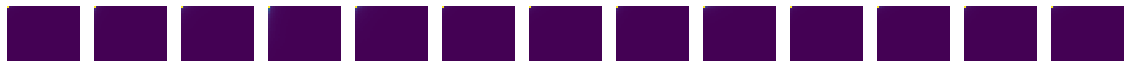

In [38]:
display(preds[10].numpy())

In [446]:
for i in range(batch_size):
    display(preds[i].numpy())
    plot_2d(x[i].squeeze(), p_joints[i], gt_joints[i])

NameError: name 'preds' is not defined